# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

Clear and accurate prediction of used car prices will significantly improve buyers’ and sellers’ ability of making right decision on buying and selling used cars. A vast variety of car makes and models and car features make it hard to assess a fair car price, particularly, for those who are not experienced in the automotive market. Even professional car dealers frequently make serious mistakes in setting fair market prices for cars in the used car market. 
An analytic approach based on the historical prices and comprehensive analysis of the most influential car features will significantly help car buyers and sellers as well as professionals in assessing used car prices and making right decisions.

### **The objective:**

The problem at hand is to predict the **prices for used cars** on the features provided to us. In the process, we need to identify the most important features affecting the price of the used cars. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data. Also, we have to build few more models (such as Decision Tree regressor and Random Forest Regressor), and make a conclusion about what model is suggested to be adopted based on the comparison of the  performance of all three models.

We have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.

### **The key questions**:

In this work we are going to answer the following key questions:

- What are the most influential features for price determination?
- How well these variables are important in predicting the price of a car.
- What is the best price predicting model for used cars?

### **The problem formulation**:

The problem addressed in this project relates to predicting prices for the used cars based on statistical and data science approaches. We will analize all available features of used cars as well as their Makes and Models, and selling locations to identify those features which significantly impact car market prices, and those features which are insignificant and could be ignored.

We will build and run several predictive models to find out which model has the best performance in the given task. These predictive models are: Linear Regression, Decision Tree Regressor, and Random Forest Regressor.

Our models will be trained and tested on the dataset on used cars for Indian Market. 

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler


# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
#pd.set_option("display.max_columns", None)

### **Let us load the data**

In [2]:
# read the data
data = pd.read_csv("used_cars.csv")

## Data Overview

In [3]:
# returns the first 5 rows
data.head()

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  New_price  Price  
0   58.16    5.0        NaN   1.75  
1  126.20    5.0        NaN  12.50  
2   88.70    5.0       8.61   4.50  
3   88.76    7.0        NaN   6.00  
4  140.80    5.0        NaN  17.74

In [4]:
# View last 5 rows
data.tail()

S.No.                                               Name   Location  \
7248   7248                  Volkswagen Vento Diesel Trendline  Hyderabad   
7249   7249                             Volkswagen Polo GT TSI     Mumbai   
7250   7250                             Nissan Micra Diesel XV    Kolkata   
7251   7251                             Volkswagen Polo GT TSI       Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...      Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
7248  2011              89411    Diesel       Manual      First    20.54   
7249  2015              59000    Petrol    Automatic      First    17.21   
7250  2012              28000    Diesel       Manual      First    23.08   
7251  2013              52262    Petrol    Automatic      Third    17.20   
7252  2014              72443    Diesel    Automatic      First    10.00   

      Engine  Power  Seats  New_price  Price  
7248  1598.0  103.6    5.0        NaN    NaN  
7249  1197.0  103.6    5.0        NaN    NaN  
7250  1461.0   63.1    5.0        NaN    NaN  
7251  1197.0  103.6    5.0        NaN    NaN  
7252  2148.0  170.0    5.0        NaN    NaN

In [5]:
# Find the dimensions of the dataframe
data.shape

(7253, 14)

Observations: Tha DataFrame has 7253 rows and 14 columns.

- Observations
- Sanity checks

In [6]:
# check the info of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [7]:
# Find the number of missing values in each column
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

In [8]:
# check duplicate entries in the data
data.duplicated().sum()

0

In [9]:
# Remove S.No. column from data
data.drop('S.No.', axis = 1, inplace = True)

In [10]:
# check the info of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [11]:
#calculate descriptive statistics for all numeric columns
pd.set_option('display.float_format', lambda x: '%.2f' % x) # round numbers in the table
data.describe().T

count     mean      std     min      25%      50%  \
Year              7253.00  2013.37     3.25 1996.00  2011.00  2014.00   
Kilometers_Driven 7253.00 58699.06 84427.72  171.00 34000.00 53416.00   
Mileage           7251.00    18.14     4.56    0.00    15.17    18.16   
Engine            7207.00  1616.57   595.29   72.00  1198.00  1493.00   
Power             7078.00   112.77    53.49   34.20    75.00    94.00   
Seats             7200.00     5.28     0.81    2.00     5.00     5.00   
New_price         1006.00    22.78    27.76    3.91     7.88    11.57   
Price             6019.00     9.48    11.19    0.44     3.50     5.64   

                       75%        max  
Year               2016.00    2019.00  
Kilometers_Driven 73000.00 6500000.00  
Mileage              21.10      33.54  
Engine             1968.00    5998.00  
Power               138.10     616.00  
Seats                 5.00      10.00  
New_price            26.04     375.00  
Price                 9.95     160.00

In [12]:
#calculate descriptive statistics for categorical variables only
data.describe(exclude = 'number').T

count unique                     top  freq
Name          7253   2041  Mahindra XUV500 W8 2WD    55
Location      7253     11                  Mumbai   949
Fuel_Type     7253      5                  Diesel  3852
Transmission  7253      2                  Manual  5204
Owner_Type    7253      4                   First  5952

In [13]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].unique())
    
    print('*'*70)

For column: Name
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']
**********************************************************************
For column: Location
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
**********************************************************************
For column: Fuel_Type
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
**********************************************************************
For column: Transmission
['Manual' 'Automatic']
**********************************************************************
For column: Owner_Type
['First' 'Second' 'Fourth & Above' 'Third']
**********************************************************************


In [14]:
data['Name'].value_counts()

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

In [15]:
data['Location'].value_counts()

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

In [16]:
data['Fuel_Type'].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

In [17]:
data['Transmission'].value_counts()

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64

In [18]:
data['Owner_Type'].value_counts()

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

In [19]:
data['Seats'].value_counts()

5.00     6048
7.00      796
8.00      170
4.00      119
6.00       38
2.00       18
10.00       8
9.00        3
Name: Seats, dtype: int64

In [20]:
data['Year'].value_counts()

2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: Year, dtype: int64

In [21]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values('Kilometers_Driven', ascending = False).head()

Name Location  Year  \
2328                        BMW X5 xDrive 30d M Sport  Chennai  2017   
340            Skoda Octavia Ambition Plus 2.0 TDI AT  Kolkata  2013   
1860                 Volkswagen Vento Diesel Highline  Chennai  2013   
358                             Hyundai i10 Magna 1.2  Chennai  2009   
2823  Volkswagen Jetta 2013-2015 2.0L TDI Highline AT  Chennai  2015   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
2328            6500000    Diesel    Automatic      First    15.97 2993.00   
340              775000    Diesel    Automatic      First    19.30 1968.00   
1860             720000    Diesel       Manual      First    20.54 1598.00   
358              620000    Petrol       Manual      First    20.36 1197.00   
2823             480000    Diesel    Automatic      First    16.96 1968.00   

      Power  Seats  New_price  Price  
2328 258.00   5.00        NaN  65.00  
340  141.00   5.00        NaN   7.50  
1860 103.60   5.00        NaN   5.90  
358   78.90   5.00        NaN   2.70  
2823 138.03   5.00        NaN  13.00

In [22]:
data.shape #to check the number of rows before we drop row 2328

(7253, 13)

In [23]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data = data.drop(data.index[2328])
data.shape

(7252, 13)

In [24]:
#check descriptive statistics for Kilometers_Driven
pd.set_option('display.float_format', lambda x: '%.2f' % x) # round numbers in the table
data['Kilometers_Driven'].describe()

count     7252.00
mean     57810.85
std      37499.54
min        171.00
25%      34000.00
50%      53404.00
75%      73000.00
max     775000.00
Name: Kilometers_Driven, dtype: float64

In [25]:
data.sort_values('Kilometers_Driven', ascending = False).head(5)

Name Location  Year  \
340            Skoda Octavia Ambition Plus 2.0 TDI AT  Kolkata  2013   
1860                 Volkswagen Vento Diesel Highline  Chennai  2013   
358                             Hyundai i10 Magna 1.2  Chennai  2009   
2823  Volkswagen Jetta 2013-2015 2.0L TDI Highline AT  Chennai  2015   
3092                             Honda City i VTEC SV  Kolkata  2015   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
340              775000    Diesel    Automatic      First    19.30 1968.00   
1860             720000    Diesel       Manual      First    20.54 1598.00   
358              620000    Petrol       Manual      First    20.36 1197.00   
2823             480000    Diesel    Automatic      First    16.96 1968.00   
3092             480000    Petrol       Manual      First    17.40 1497.00   

      Power  Seats  New_price  Price  
340  141.00   5.00        NaN   7.50  
1860 103.60   5.00        NaN   5.90  
358   78.90   5.00        NaN   2.70  
2823 138.03   5.00        NaN  13.00  
3092 117.30   5.00        NaN   5.00

In [26]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values(by=['Mileage']).head(10)

Name    Location  Year  \
2597                Hyundai Santro Xing XP        Pune  2007   
2343                     Hyundai Santro AT   Hyderabad  2006   
5270                    Honda City 1.5 GXI   Bangalore  2002   
424   Volkswagen Jetta 2007-2011 1.9 L TDI   Hyderabad  2010   
6857        Land Rover Freelander 2 TD4 SE      Mumbai  2011   
443          Hyundai Santro GLS I - Euro I  Coimbatore  2012   
5119                Hyundai Santro Xing XP     Kolkata  2008   
5022        Land Rover Freelander 2 TD4 SE   Hyderabad  2013   
5016       Land Rover Freelander 2 TD4 HSE       Delhi  2013   
2542       Hyundai Santro GLS II - Euro II   Bangalore  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
2597              70000    Petrol       Manual      First     0.00 1086.00   
2343              74483    Petrol    Automatic      First     0.00  999.00   
5270              53000    Petrol       Manual     Second     0.00     NaN   
424               42021    Diesel       Manual      First     0.00 1968.00   
6857              87000    Diesel    Automatic      First     0.00 2179.00   
443               50243    Petrol       Manual      First     0.00 1086.00   
5119              45500    Petrol       Manual     Second     0.00 1086.00   
5022              46000    Diesel    Automatic     Second     0.00 2179.00   
5016              72000    Diesel    Automatic      First     0.00 2179.00   
2542              65000    Petrol       Manual     Second     0.00     NaN   

      Power  Seats  New_price  Price  
2597    NaN   5.00        NaN   1.12  
2343    NaN   5.00        NaN   2.30  
5270    NaN    NaN        NaN   1.85  
424     NaN   5.00        NaN   5.45  
6857 115.00   5.00        NaN    NaN  
443     NaN   5.00        NaN   3.35  
5119    NaN   5.00        NaN   1.17  
5022 115.00   5.00        NaN  26.00  
5016 115.00   5.00        NaN  15.50  
2542    NaN    NaN        NaN   3.15

In [27]:
sum(data['Mileage']==0)

81

In [28]:
data.loc[data['Mileage']==0]

Name    Location  Year  \
14              Land Rover Freelander 2 TD4 SE        Pune  2012   
67    Mercedes-Benz C-Class Progressive C 220d  Coimbatore  2019   
79                      Hyundai Santro Xing XL   Hyderabad  2005   
194                         Honda City 1.5 GXI   Ahmedabad  2007   
229                           Ford Figo Diesel   Bangalore  2015   
...                                        ...         ...   ...   
6633                       Mahindra TUV 300 P4     Kolkata  2016   
6697                    Hyundai Santro Xing XL      Jaipur  2007   
6857            Land Rover Freelander 2 TD4 SE      Mumbai  2011   
6957                    Honda Jazz 2020 Petrol       Kochi  2019   
7226                    Hyundai Santro Xing GL   Ahmedabad  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
14                85000    Diesel    Automatic     Second     0.00 2179.00   
67                15369    Diesel    Automatic      First     0.00 1950.00   
79                87591    Petrol       Manual      First     0.00 1086.00   
194               60006    Petrol       Manual      First     0.00     NaN   
229               70436    Diesel       Manual      First     0.00 1498.00   
...                 ...       ...          ...        ...      ...     ...   
6633              27000    Diesel       Manual      First     0.00     NaN   
6697              85000    Petrol       Manual     Second     0.00 1086.00   
6857              87000    Diesel    Automatic      First     0.00 2179.00   
6957              11574    Petrol       Manual      First     0.00 1199.00   
7226              41000    Petrol       Manual      First     0.00 1086.00   

      Power  Seats  New_price  Price  
14   115.00   5.00        NaN  17.50  
67   194.00   5.00      49.14  35.67  
79      NaN   5.00        NaN   1.30  
194     NaN    NaN        NaN   2.95  
229   99.00    NaN        NaN   3.60  
...     ...    ...        ...    ...  
6633    NaN    NaN        NaN    NaN  
6697    NaN   5.00        NaN    NaN  
6857 115.00   5.00        NaN    NaN  
6957  88.70    NaN        NaN    NaN  
7226  62.00   5.00        NaN    NaN  

[81 rows x 13 columns]

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [29]:
# Creating numerical columns
num_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_price', 'Price']

In [30]:
data[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               7252 non-null   int64  
 1   Kilometers_Driven  7252 non-null   int64  
 2   Mileage            7250 non-null   float64
 3   Engine             7206 non-null   float64
 4   Power              7077 non-null   float64
 5   Seats              7199 non-null   float64
 6   New_price          1006 non-null   float64
 7   Price              6018 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 509.9 KB


                                             Histplot Year


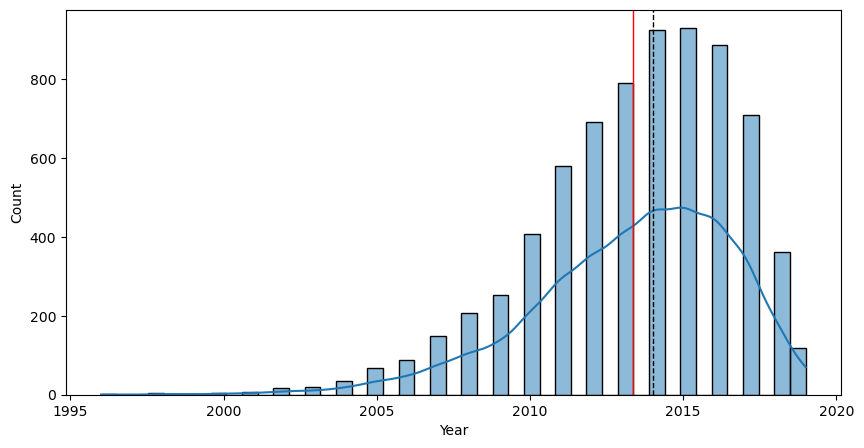

                                             Histplot Kilometers_Driven


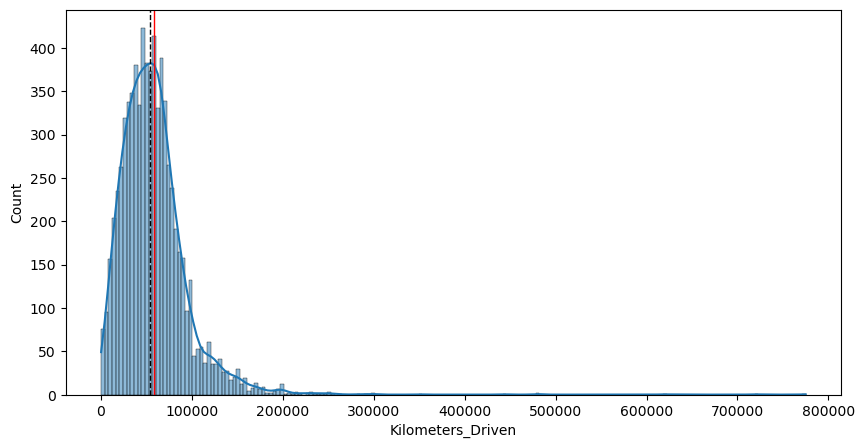

                                             Histplot Mileage


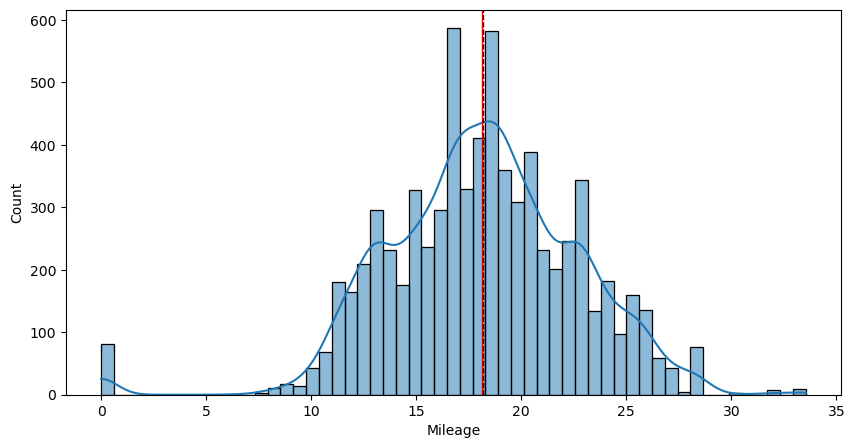

                                             Histplot Engine


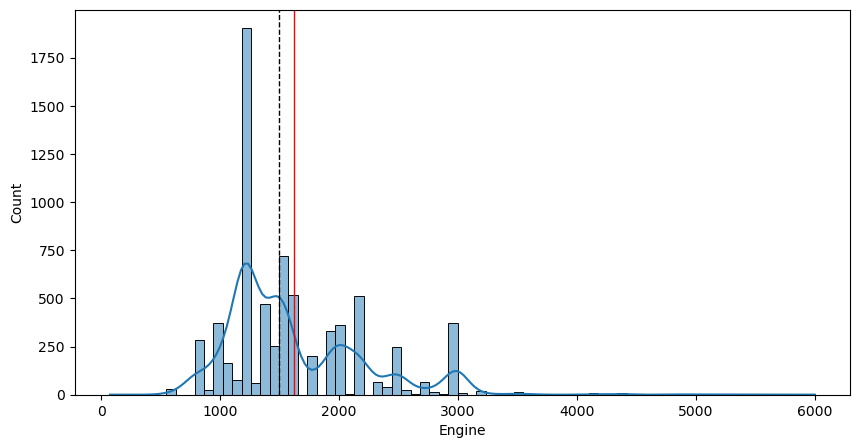

                                             Histplot Power


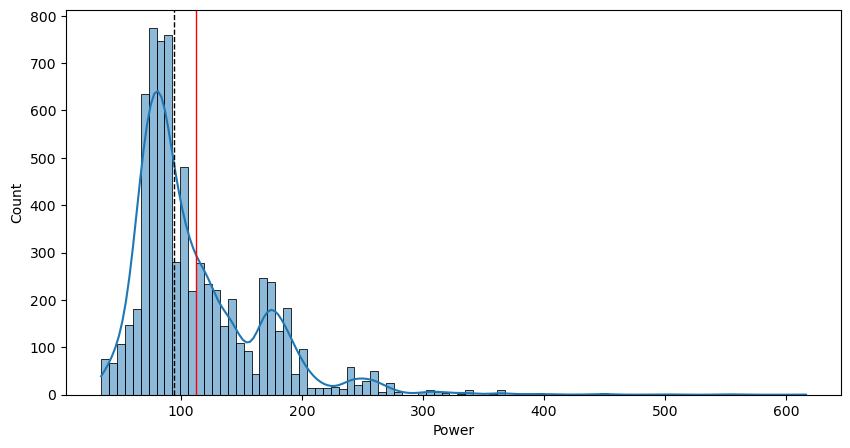

                                             Histplot Seats


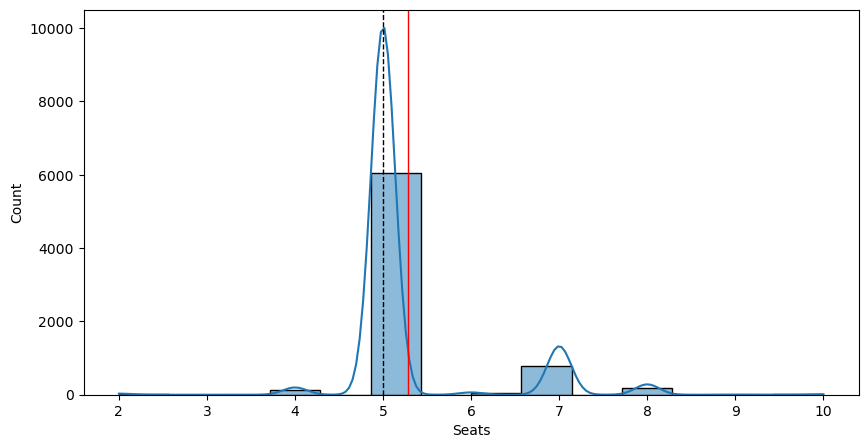

                                             Histplot New_price


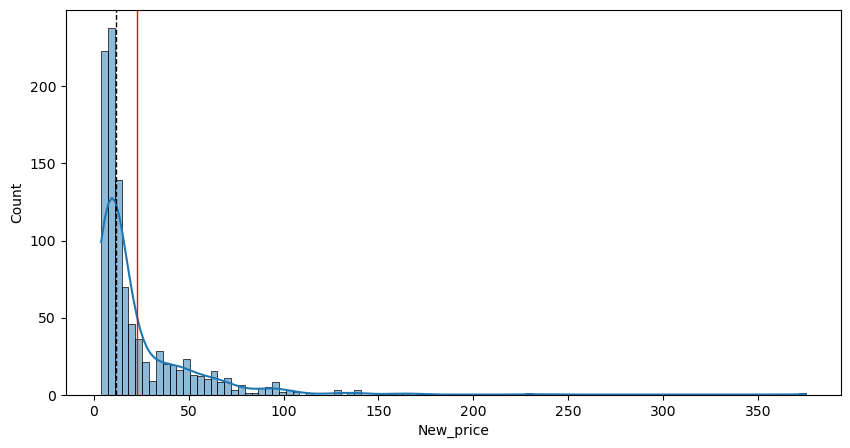

                                             Histplot Price


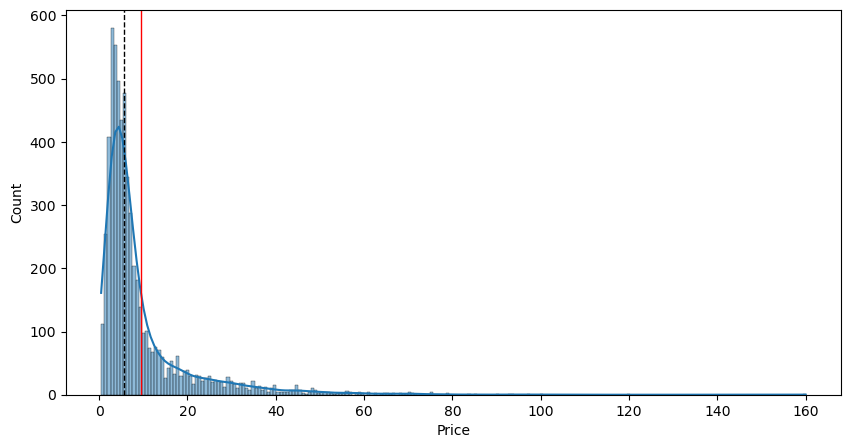

In [31]:
# Plotting all numerical columns to look at their distributions

for i in data[num_cols].columns:
    
    plt.figure(figsize = (10, 5))
    sns.histplot(data = data[num_cols], x = i, kde = True)
    plt.axvline(data[i].mean(), color='r', linewidth=1) # add red vertical line for mean
    plt.axvline(data[i].median(), color='black', linewidth=1, linestyle = '--') # add black dashed vertical line for median
    plt.title(print("                                             Histplot", i))
    plt.show()

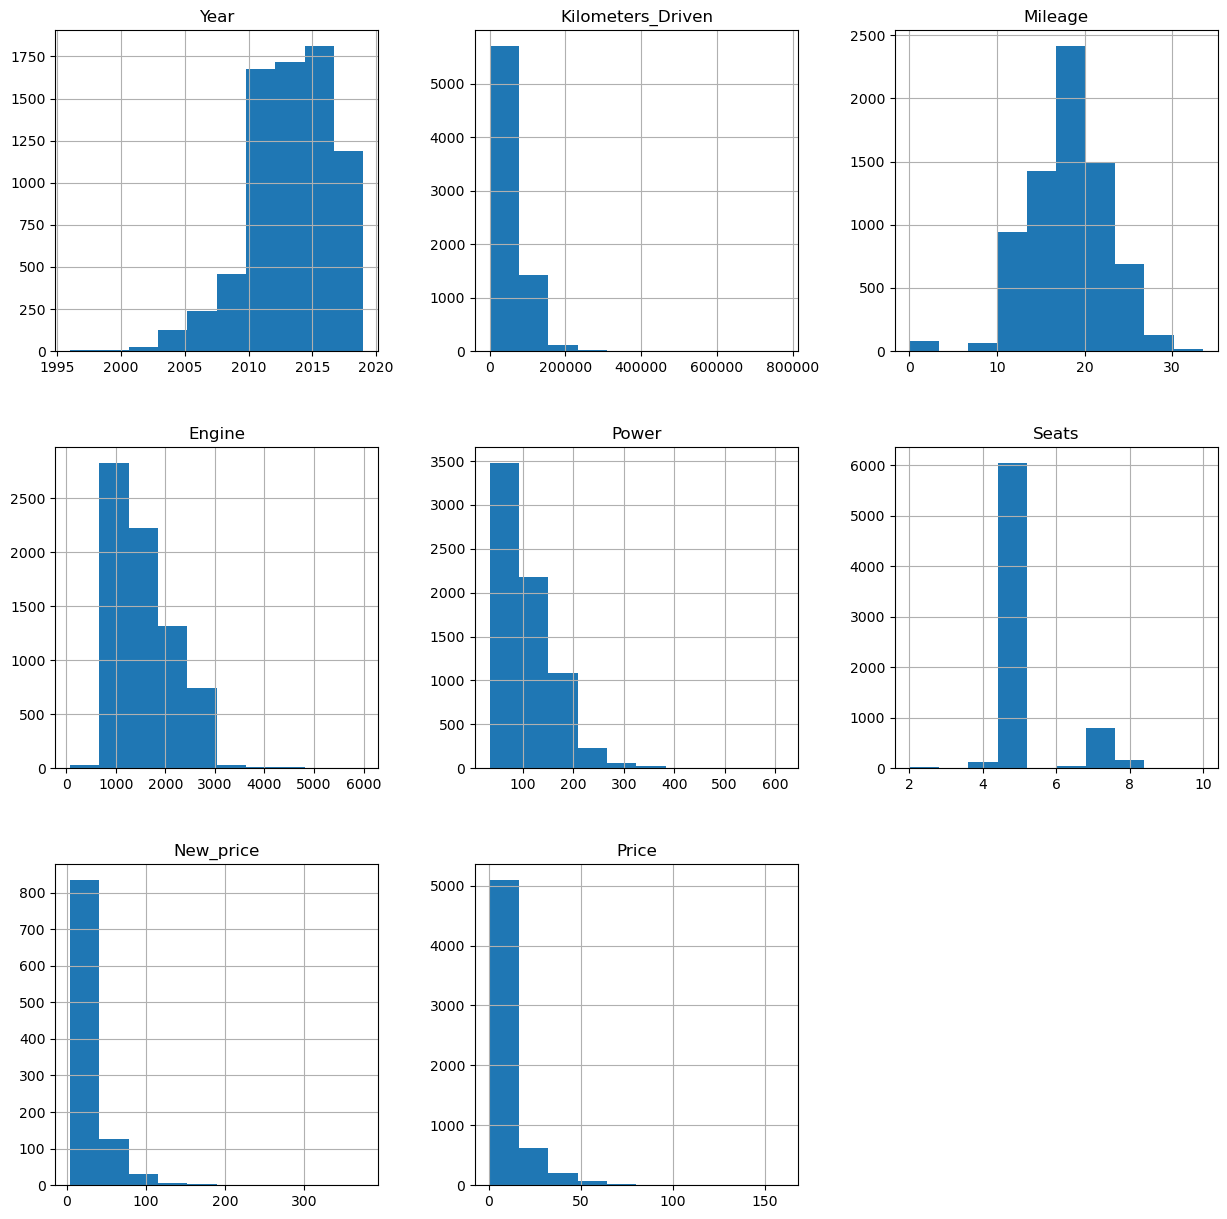

In [32]:
# Creating histograms
data[num_cols].hist(figsize = (15, 15))

plt.show()

                                      Histplot and Boxplot Year


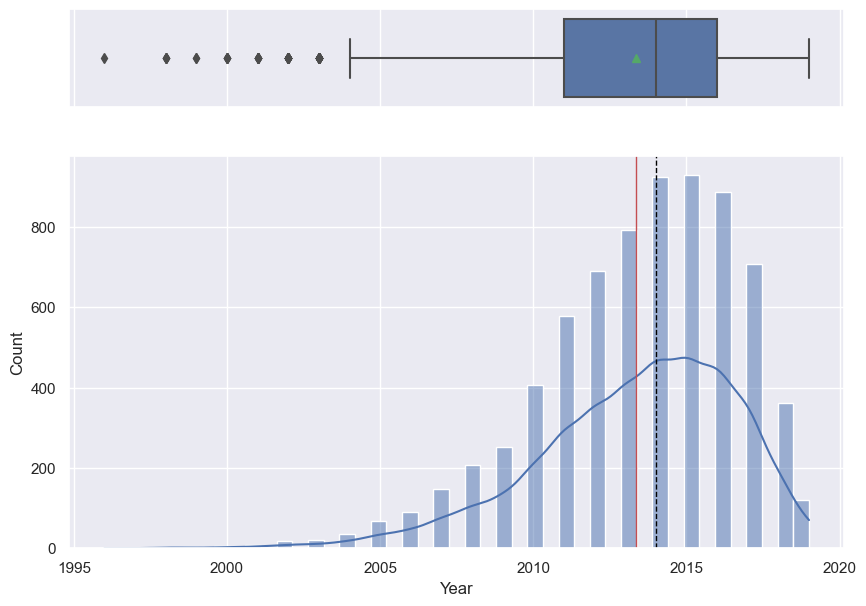

                                      Histplot and Boxplot Kilometers_Driven


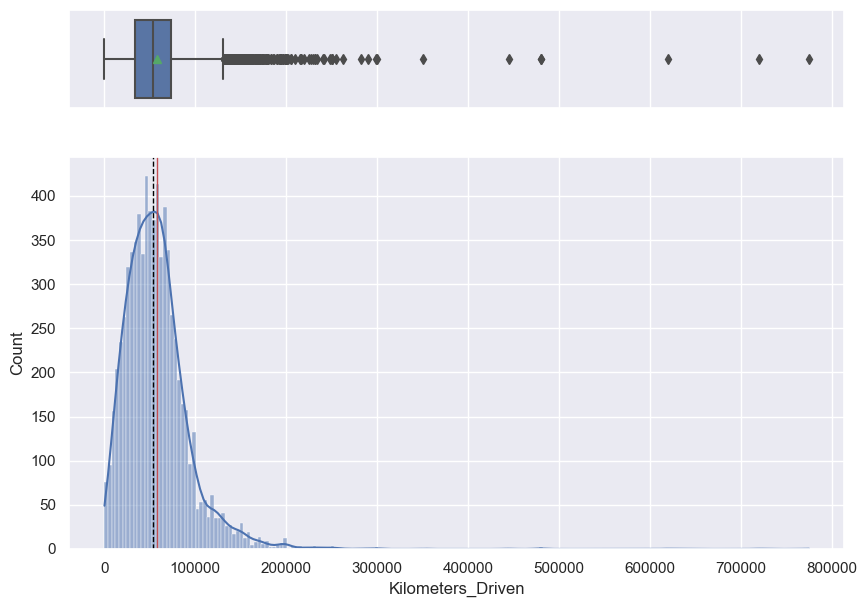

                                      Histplot and Boxplot Mileage


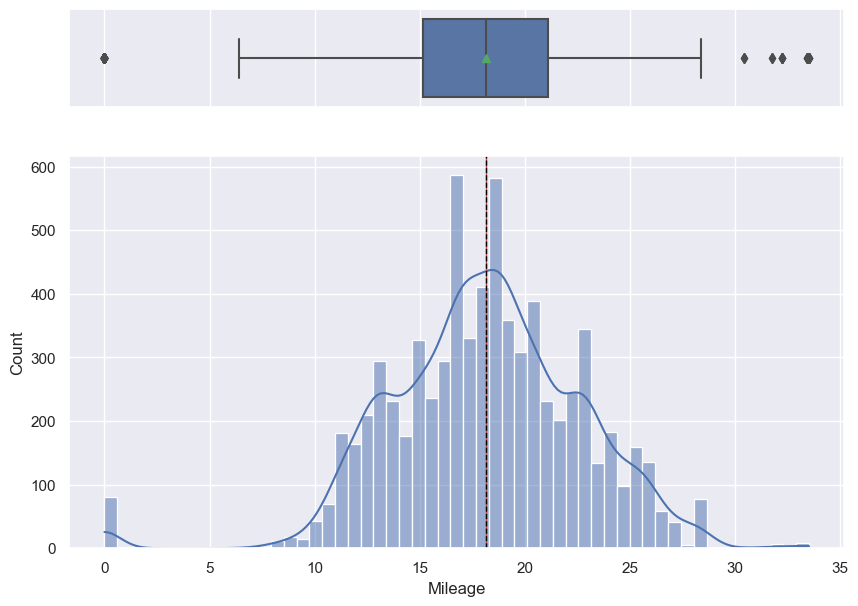

                                      Histplot and Boxplot Engine


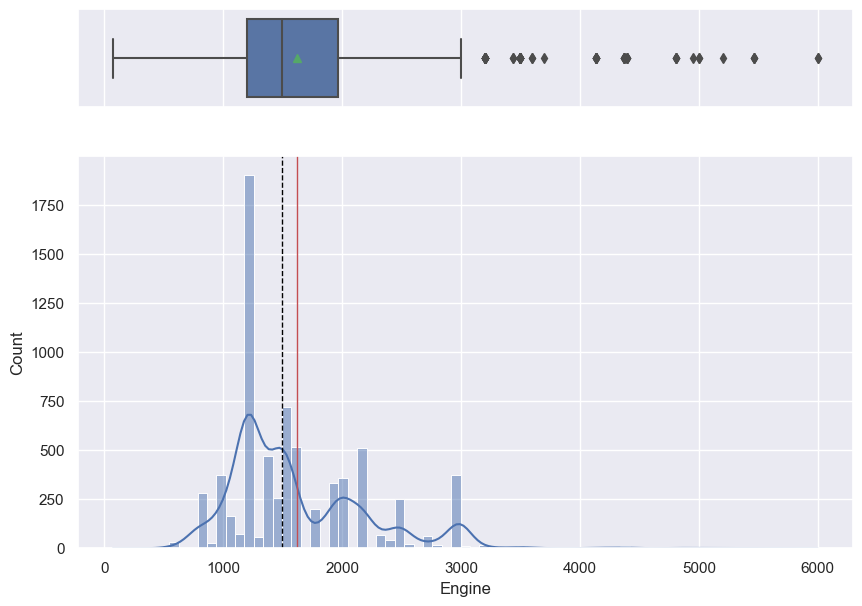

                                      Histplot and Boxplot Power


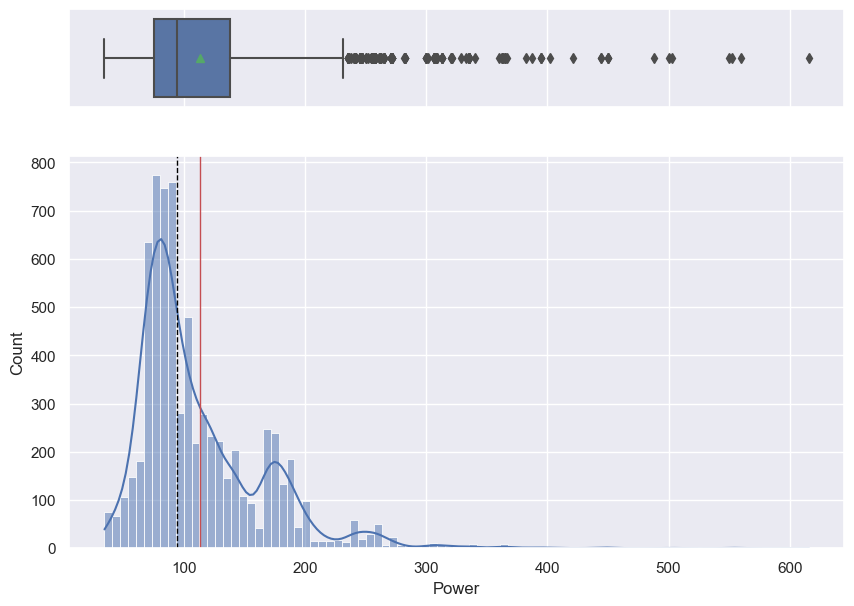

                                      Histplot and Boxplot Seats


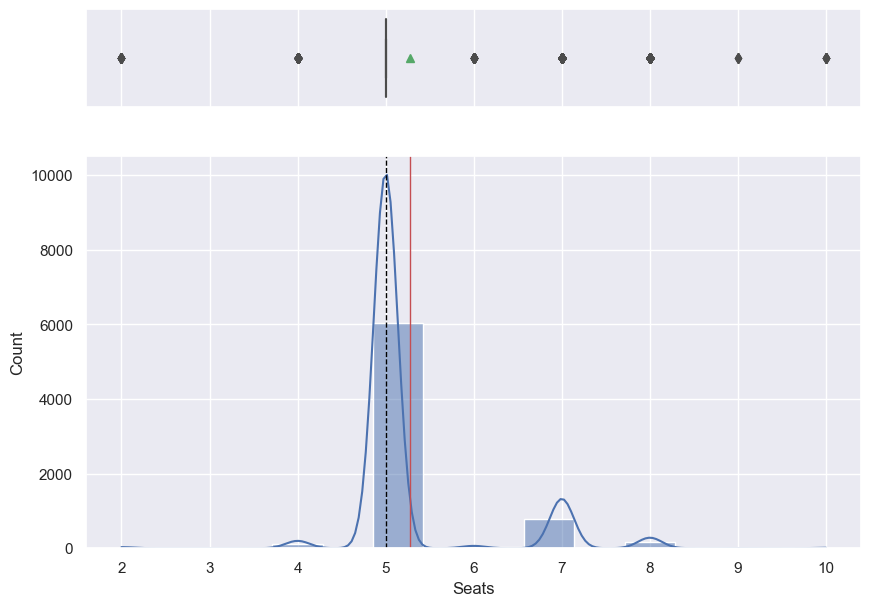

                                      Histplot and Boxplot New_price


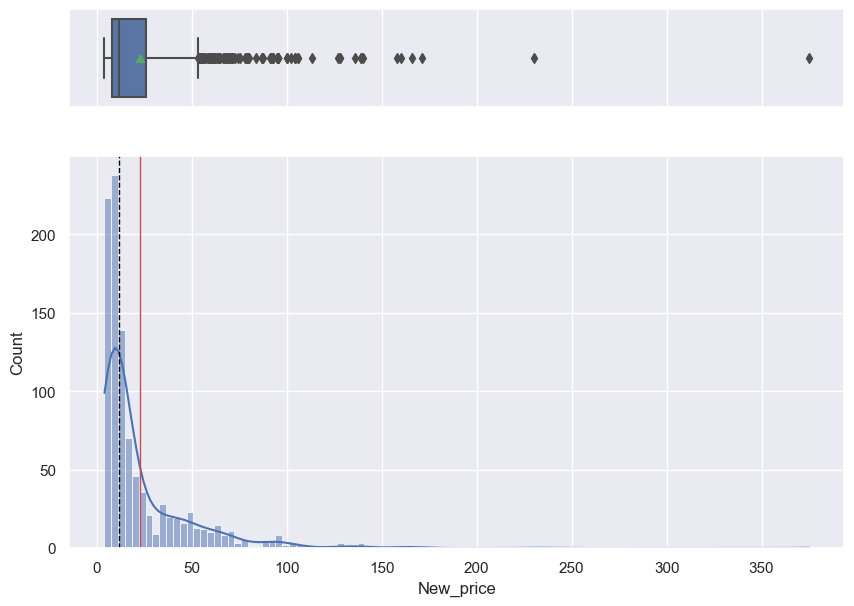

                                      Histplot and Boxplot Price


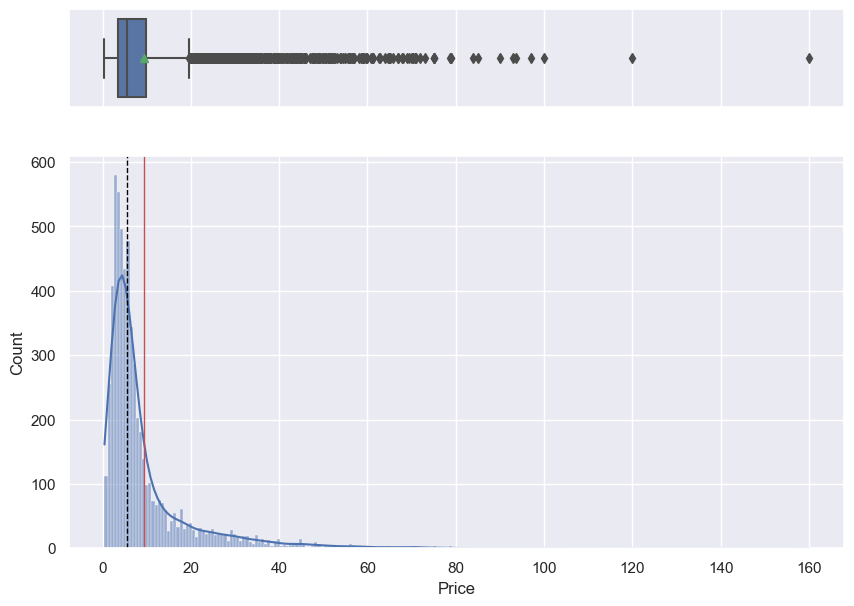

In [33]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background 
sns.set(style="darkgrid")

for i in data[num_cols].columns:
    # creating a figure composed of two matplotlib. Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)}, figsize = (10, 7))
    
    # assigning a graph to each ax
    sns.boxplot(data[i], showmeans = True, ax=ax_box)
    sns.histplot(data=data, x=i, ax=ax_hist, kde = True)
    plt.axvline(data[i].mean(), color='r', linewidth=1) # add red vertical line for mean
    plt.axvline(data[i].median(), color='black', linewidth=1, linestyle = '--') # add blacke dashed vertical line for median
    plt.title(print("                                      Histplot and Boxplot", i))
 
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.show()

In [34]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background 
sns.set(style="darkgrid")

def hist_boxplot(param, bins = None):

    # creating a figure composed of two matplotlib. Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (15, 10))
    
    # assigning a graph to each ax
    sns.boxplot(param, showmeans = True, ax=ax_box)
    sns.histplot(param, ax=ax_hist, kde = True)
    plt.axvline(param.mean(), color='r', linewidth=1) # add red vertical line for mean
    plt.axvline(param.median(), color='black', linewidth=1, linestyle = '--') # add black dashed vertical line for median
    plt.title(print("                                                  Boxplot and Histplot"))
 
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.show()

                                                  Boxplot and Histplot


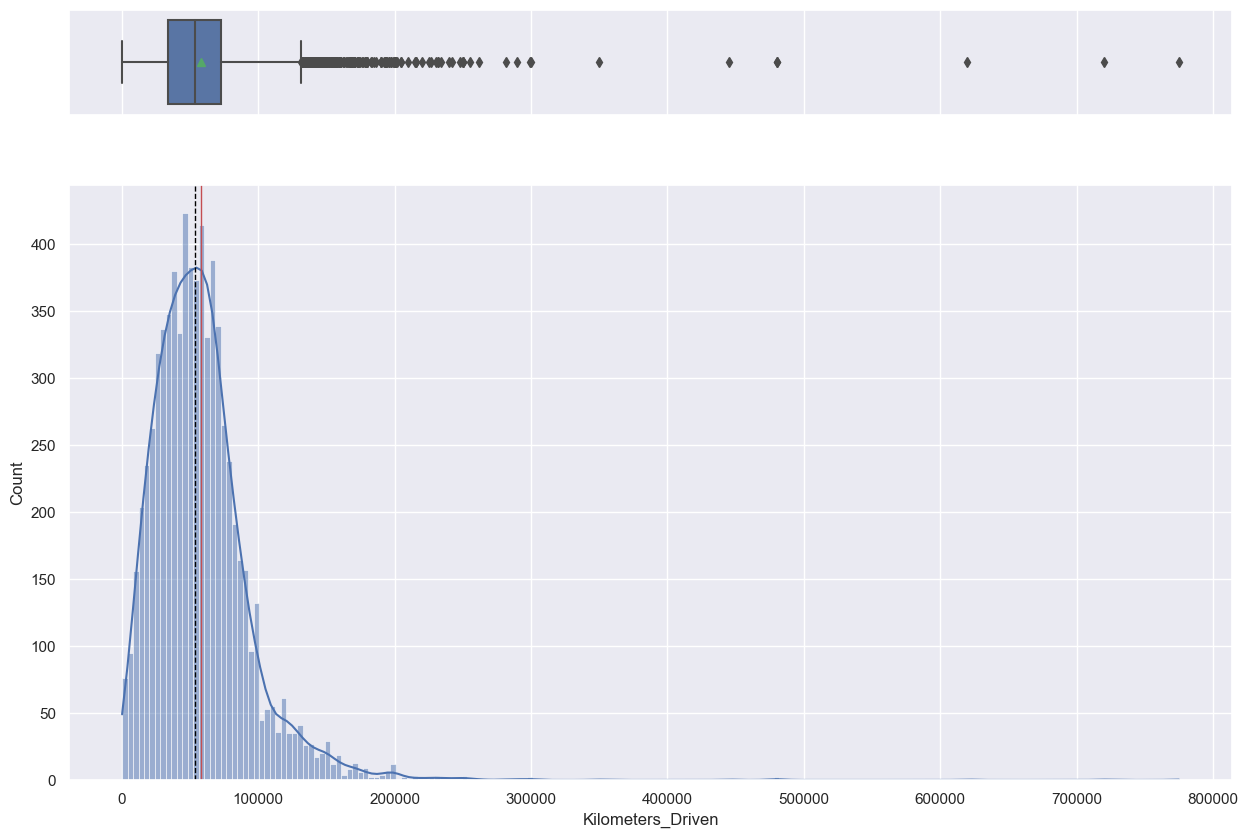

In [35]:
# Plot histogram and box-plot for 'Kilometers_Driven'
hist_boxplot(data['Kilometers_Driven'])

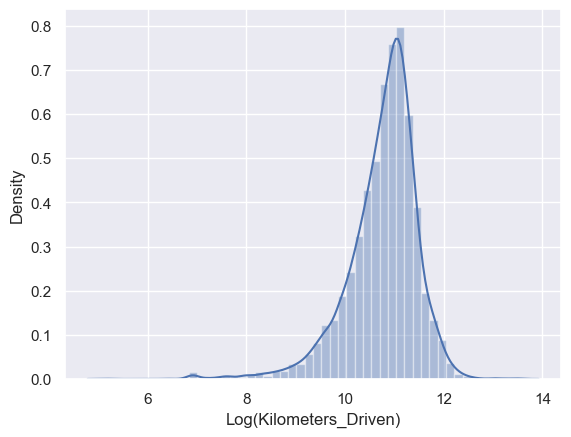

In [36]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

In [37]:
# We can add a transformed kilometers_driven feature in data
data["Kilometers_Driven_log"] = np.log(data["Kilometers_Driven"])

                                                  Boxplot and Histplot


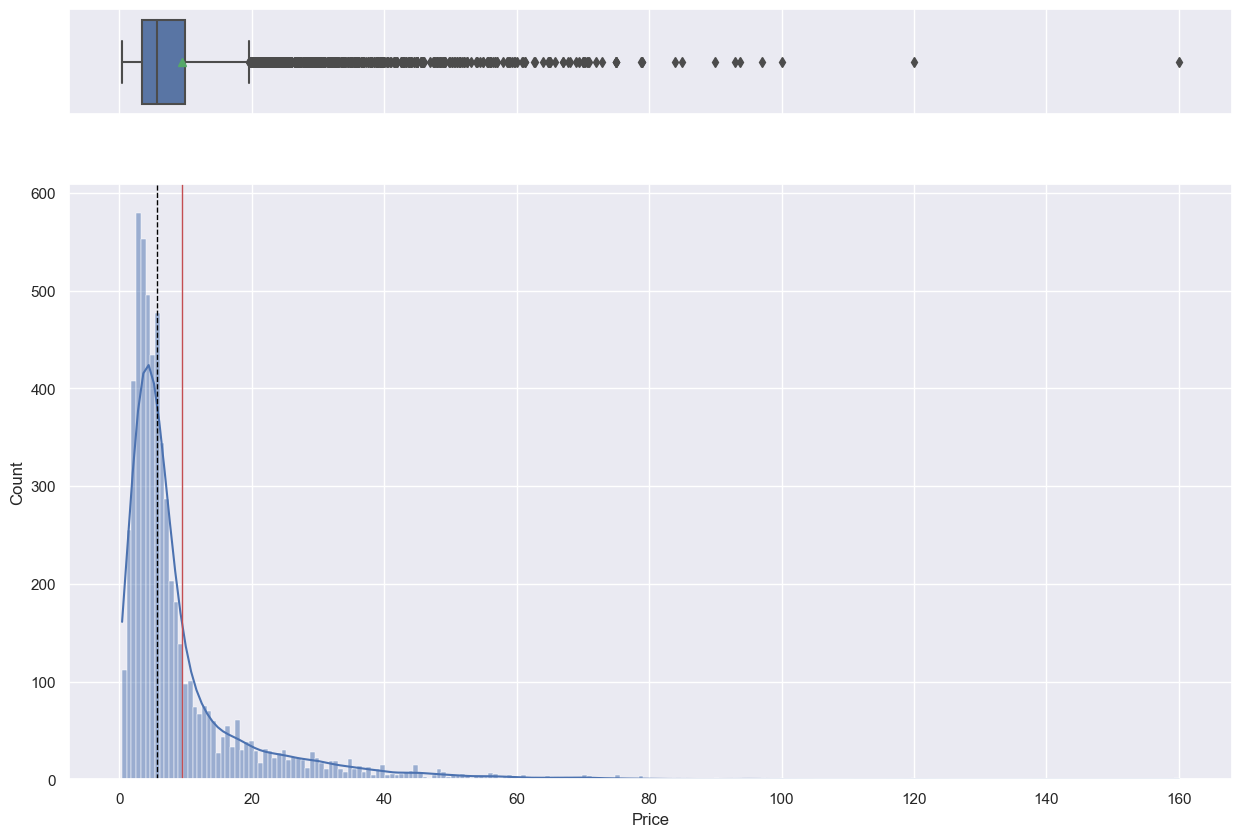

In [38]:
# Plot histogram and box-plot for 'Price'
hist_boxplot(data['Price'])

**The distribution of Price is skewed. We would want to apply log transformation to normalize the distribution. Before we proceed, we have to manage the missing values in 'Price'.**

In [39]:
data['Price'].isnull().sum()

1234

In [40]:
# Drop rows that has NaN values in column Price
data.dropna(subset=['Price'], inplace = True)
data['Price'].isnull().sum()

0

In [41]:
data.shape

(6018, 14)

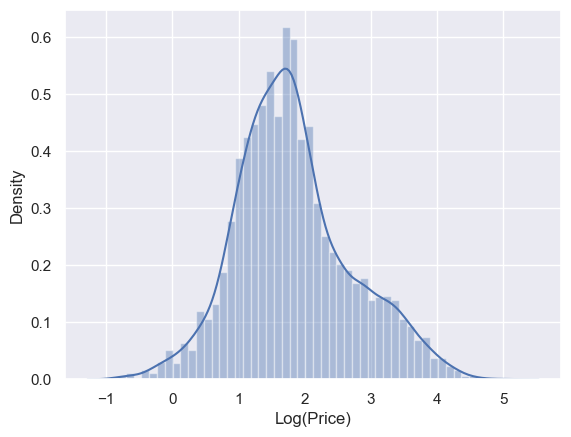

In [42]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)");

In [43]:
# We can add a transformed price feature in data
data["Price_log"] = np.log(data["Price"])

                                                  Boxplot and Histplot


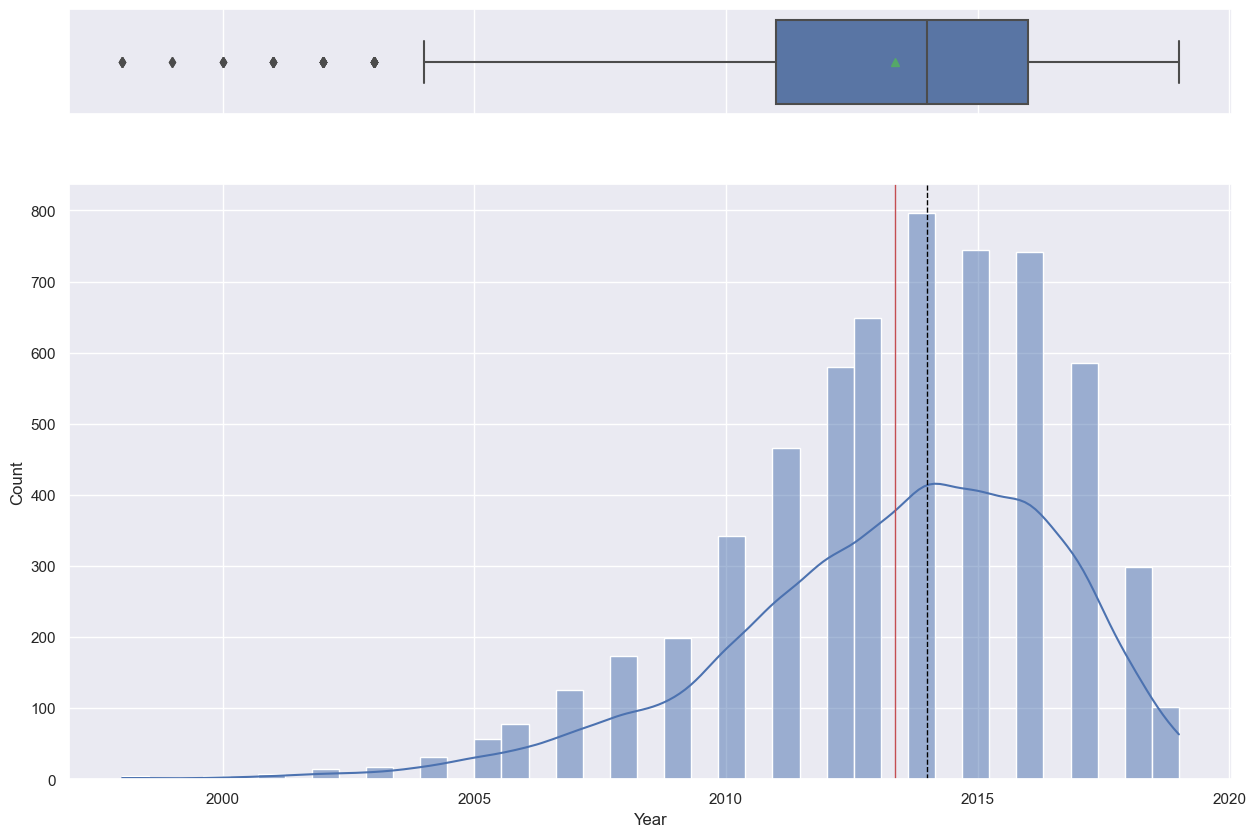

In [44]:
# Plot histogram and box-plot for 'Year'
hist_boxplot(data['Year'])

                                                  Boxplot and Histplot


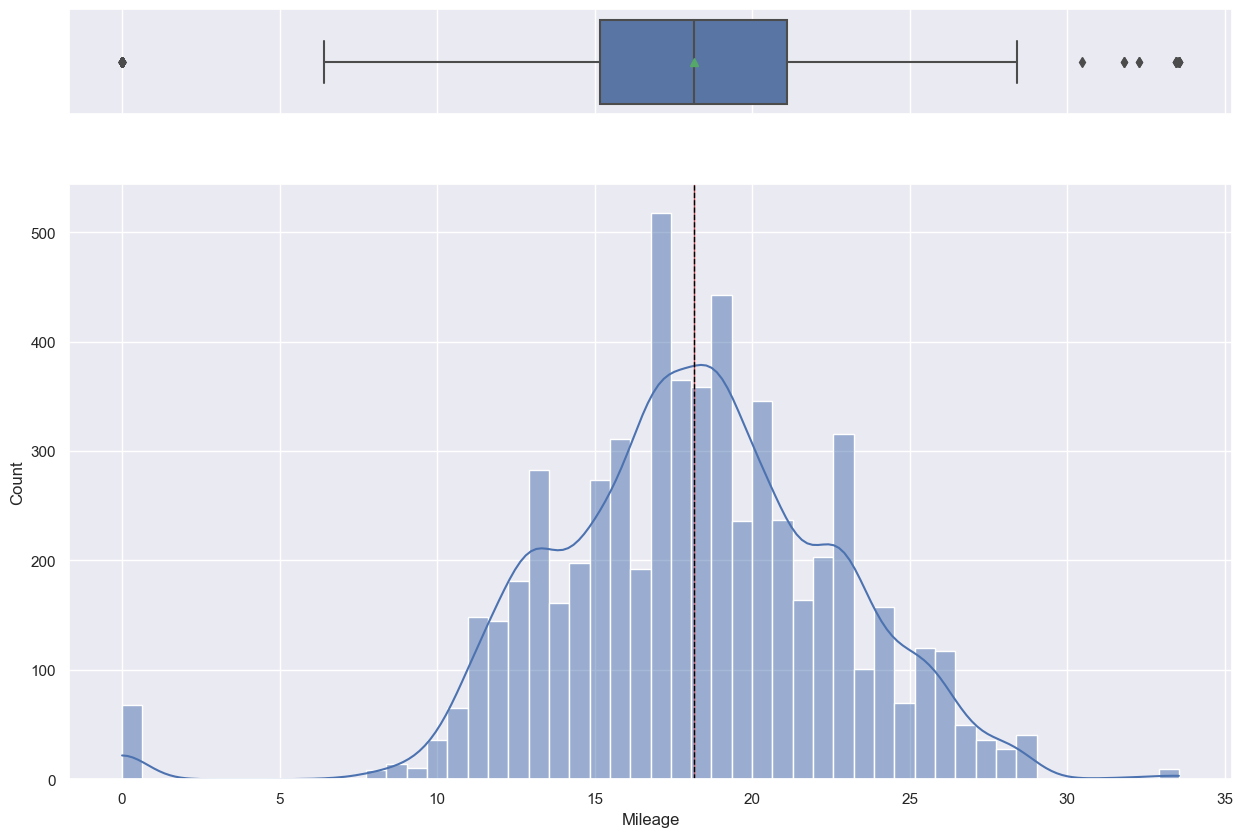

In [45]:
# Plot histogram and box-plot for 'Mileage'
hist_boxplot(data['Mileage'])

                                                  Boxplot and Histplot


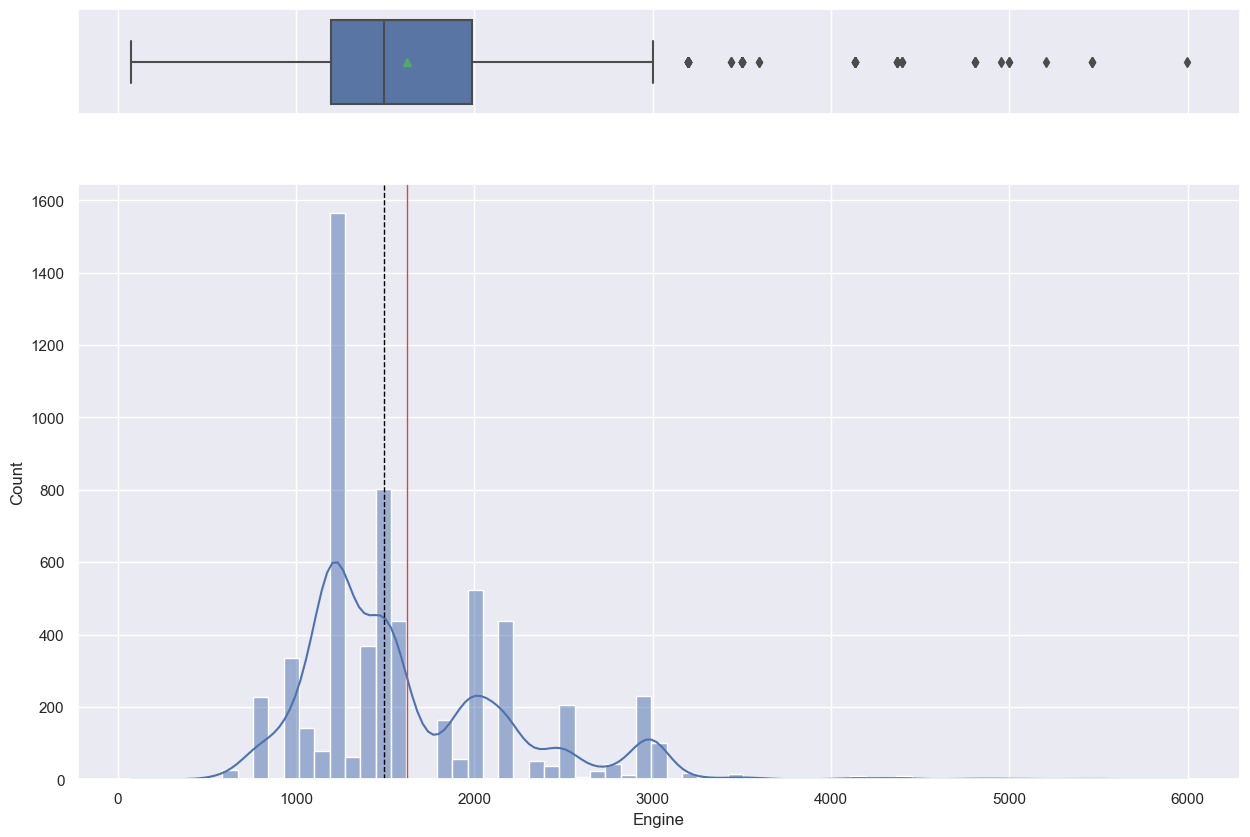

In [46]:
# Plot histogram and box-plot for 'Engine'
hist_boxplot(data['Engine'])

                                                  Boxplot and Histplot


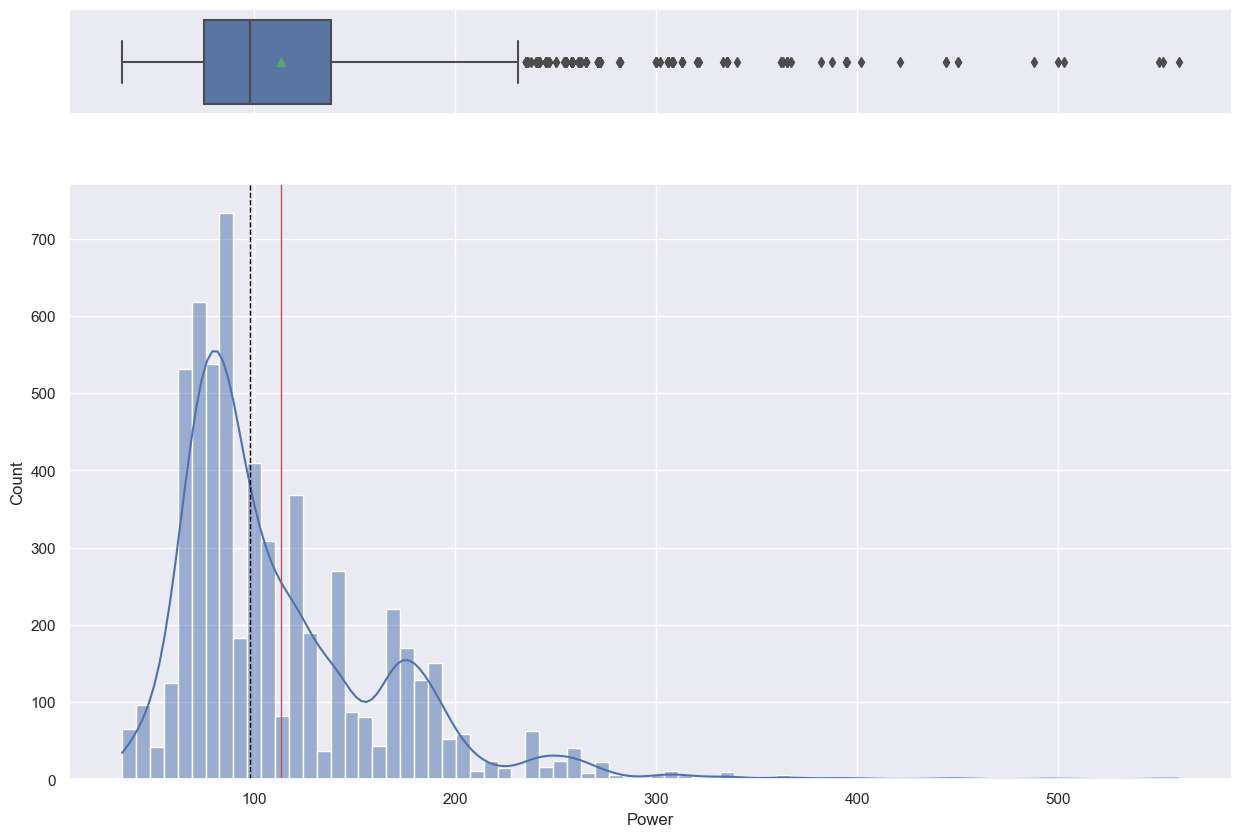

In [47]:
# Plot histogram and box-plot for 'Power'
hist_boxplot(data['Power'])

                                                  Boxplot and Histplot


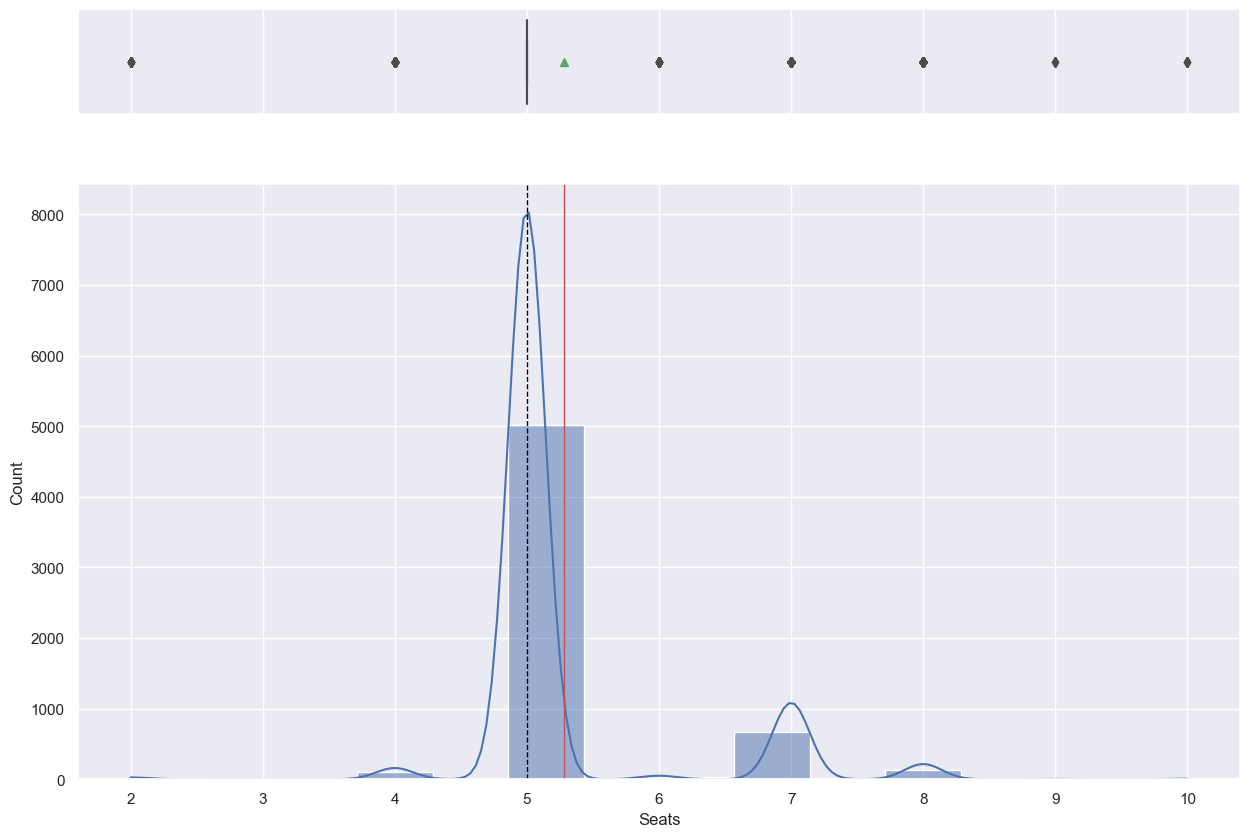

In [48]:
# Plot histogram and box-plot for 'Seats'
hist_boxplot(data['Seats'])

## **2. Univariate analysis - Categorical Data**

In [49]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    cat_plot = sns.countplot(data[z], palette = 'Paired', order = data[z].value_counts().index)
    
    for label in cat_plot.containers:
        cat_plot.bar_label(label) # add corresponding labels on the top of each bar


    for p in cat_plot.patches:
        
        percentage = '{:.2f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width()/ 2 -0.25 # Width of the bar
        
        y = p.get_y() + p.get_height()/ 2    # Height of the bar
        
        cat_plot.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

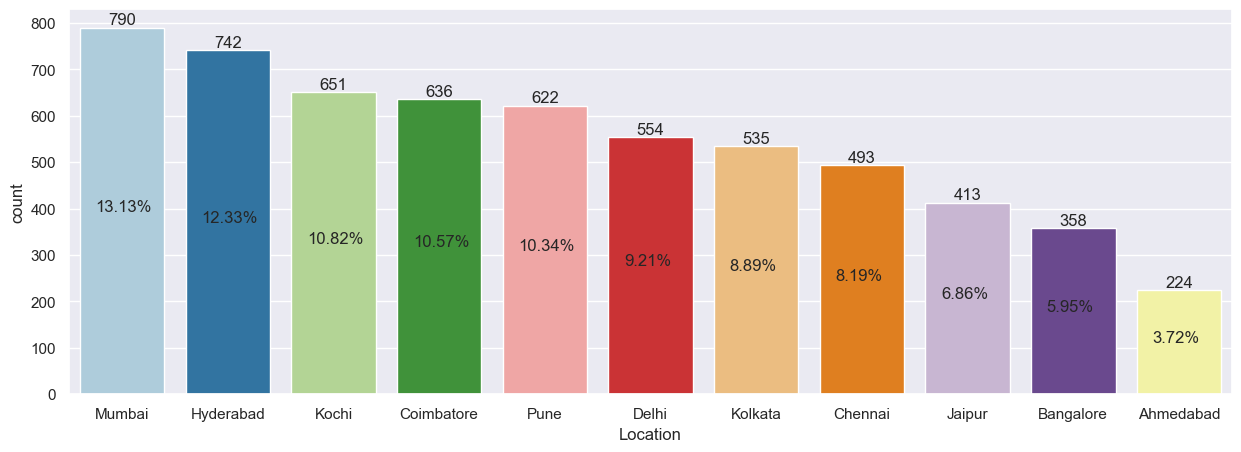

In [50]:
# Bar Plot for 'Location'
perc_on_bar('Location')

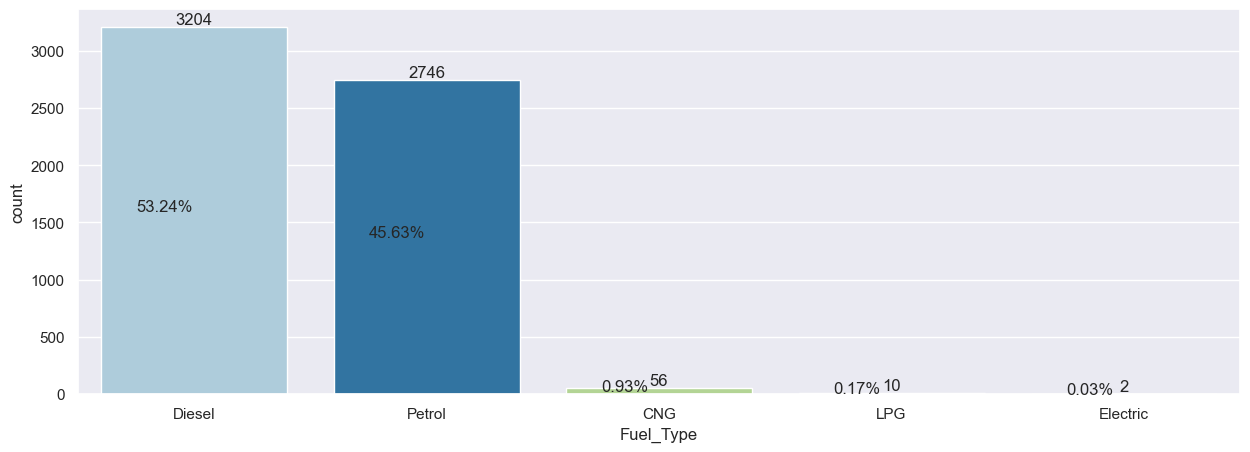

In [51]:
# Bar Plot for 'Fuel_Type'
perc_on_bar('Fuel_Type')

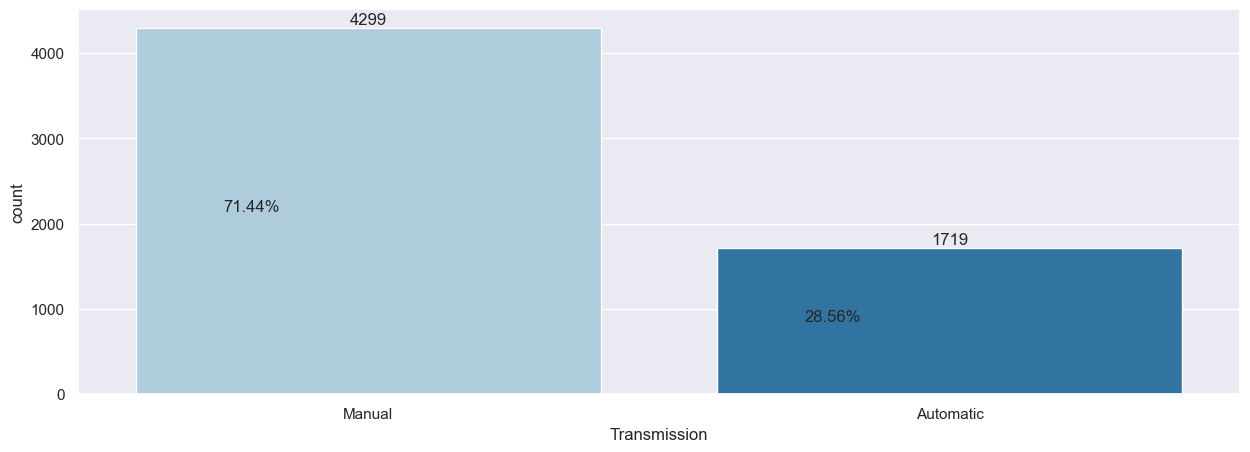

In [52]:
# Bar Plot for 'Transmission'
perc_on_bar('Transmission')

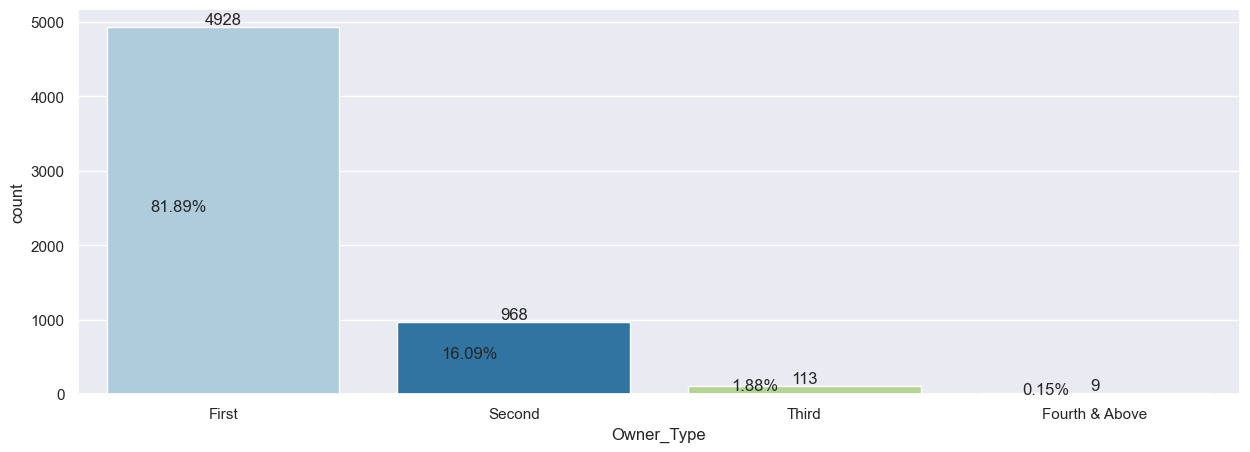

In [53]:
# Bar Plot for 'Owner_Type'
perc_on_bar('Owner_Type')

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

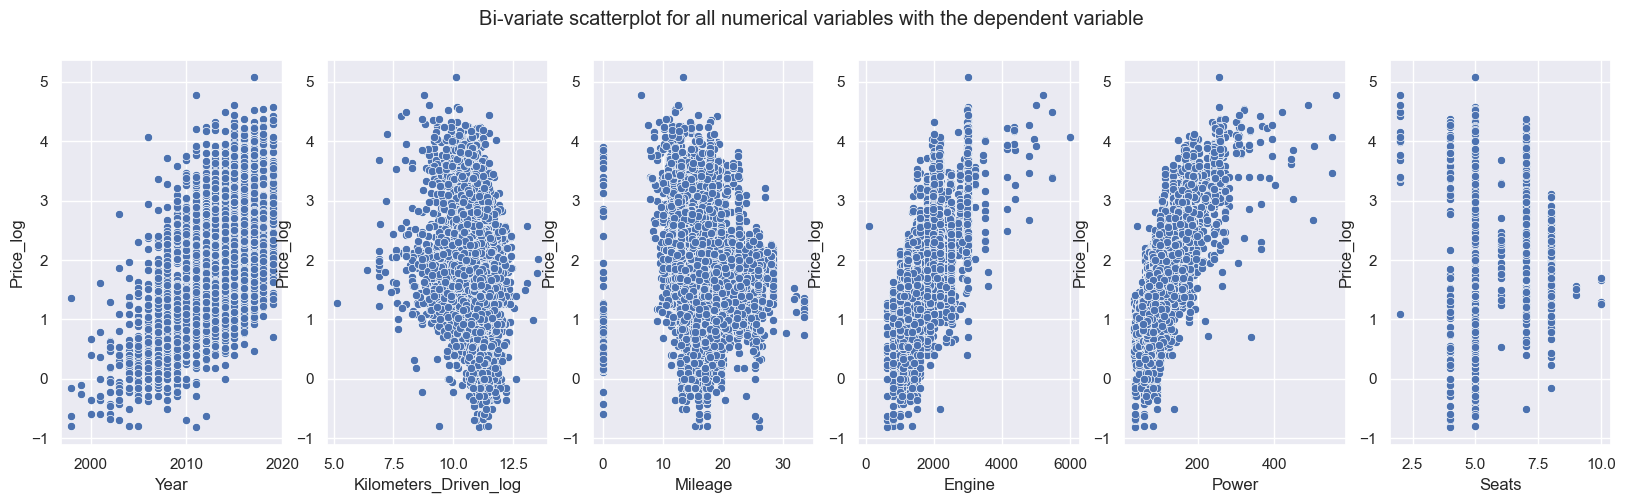

In [54]:
fig, axes = plt.subplots(1, 6, figsize = (20, 5))

hue = None
  
fig.suptitle('Bi-variate scatterplot for all numerical variables with the dependent variable')
  
sns.scatterplot(x = 'Year', y = 'Price_log', data = data, ax = axes[0], hue = hue);

sns.scatterplot(x = 'Kilometers_Driven_log', y = 'Price_log', data = data, ax = axes[1], hue = hue);

sns.scatterplot(x = 'Mileage', y = 'Price_log', data = data, ax = axes[2], hue = hue);

sns.scatterplot(x = 'Engine', y = 'Price_log', data = data, ax = axes[3], hue = hue);

sns.scatterplot(x = 'Power', y = 'Price_log', data = data, ax = axes[4], hue = hue);

sns.scatterplot(x = 'Seats', y = 'Price_log', data = data, ax = axes[5], hue = hue);

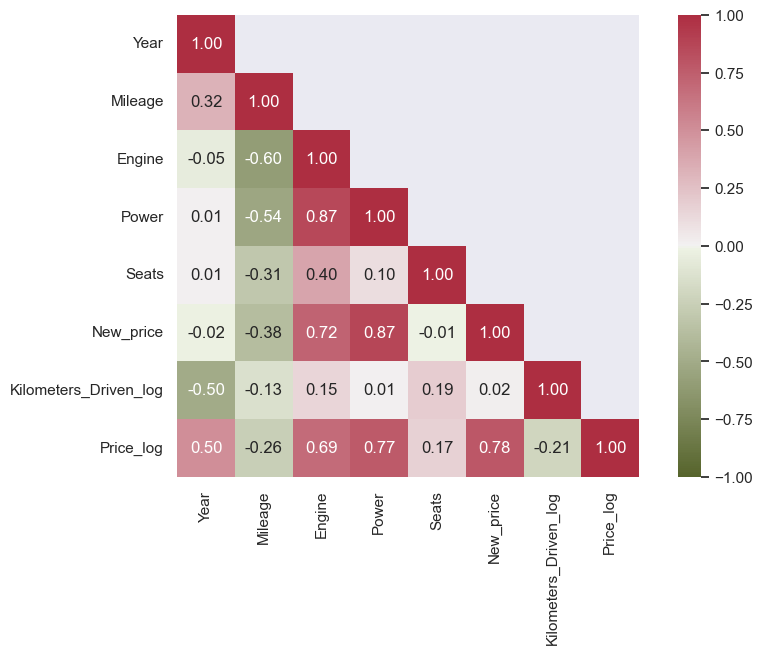

In [55]:
corr= data.drop(['Kilometers_Driven', 'Price'],axis = 1).corr()

# Getting the Upper Triangle of the co-relation matrix
mask = np.triu(corr)

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, False)

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, vmin = -1, vmax = 1, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show();

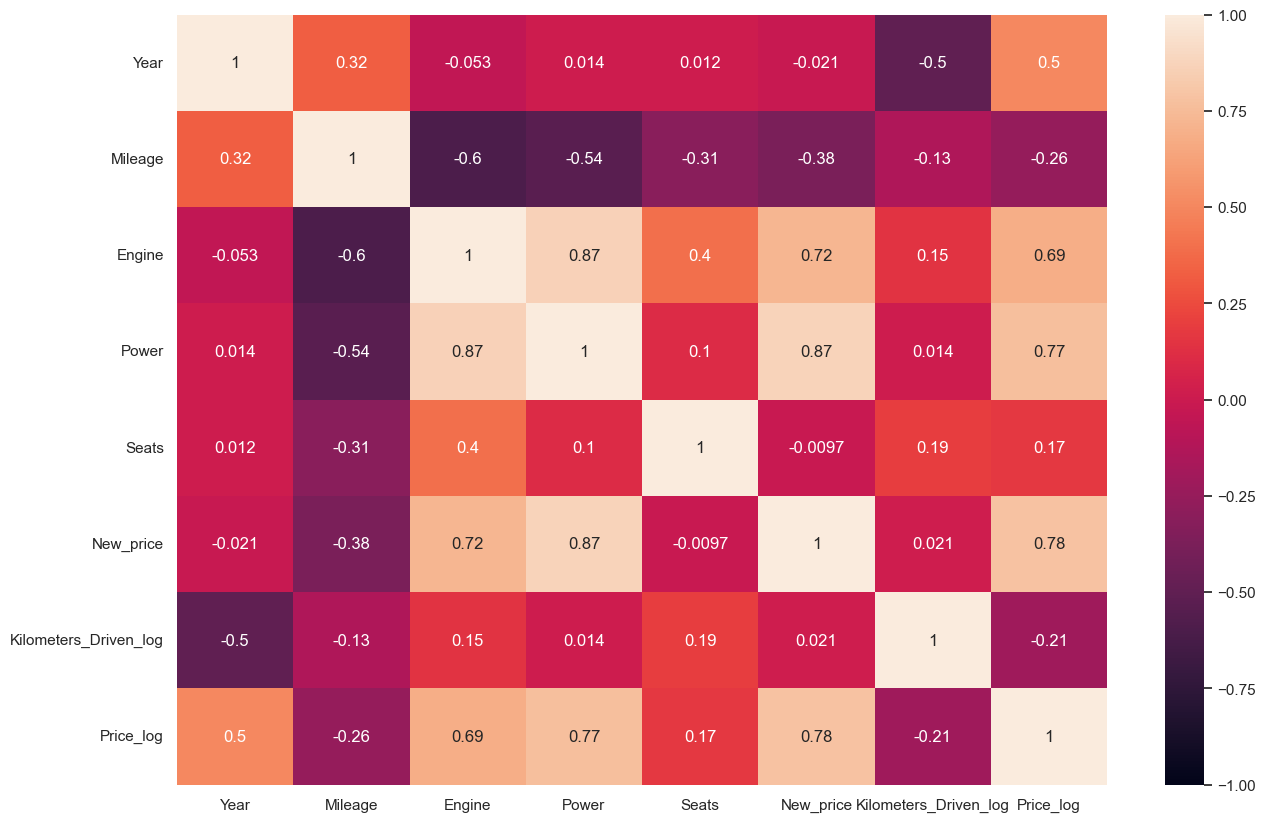

In [56]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (15, 10))

sns.heatmap(data.drop(['Kilometers_Driven', 'Price'],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

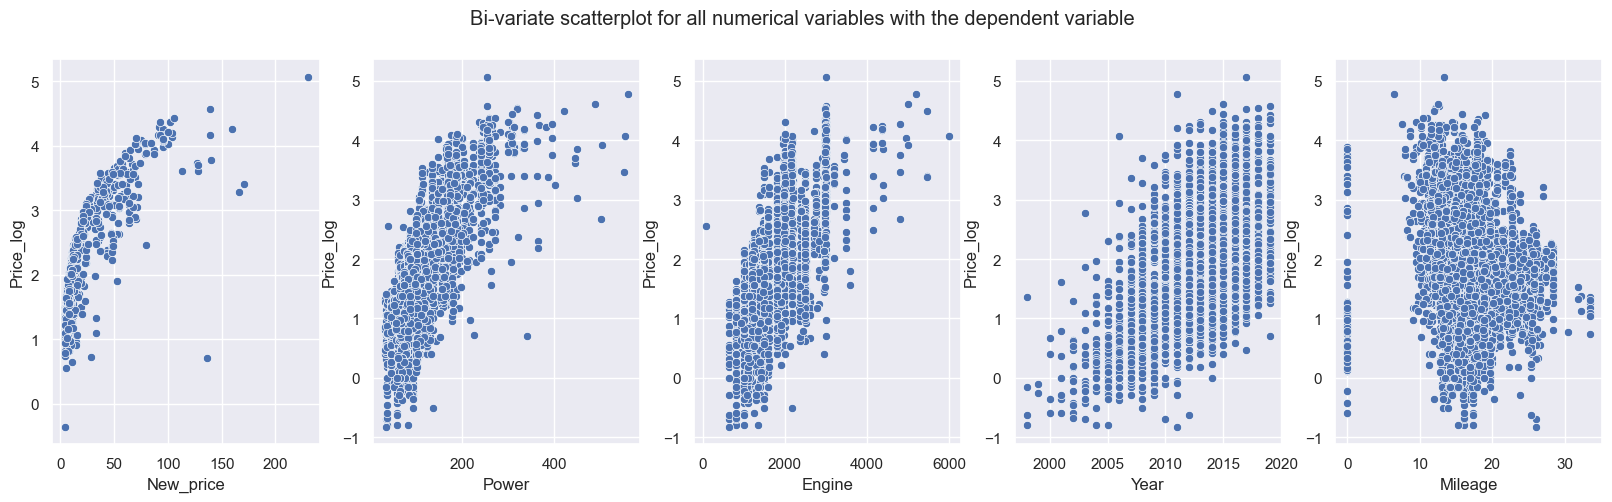

In [57]:
#Let's make scatterplots for the most significant correlations of the dependant variable and features.
fig, axes = plt.subplots(1, 5, figsize = (20, 5))


hue = None
  
fig.suptitle('Bi-variate scatterplot for all numerical variables with the dependent variable')
  
sns.scatterplot(x = 'New_price', y = 'Price_log', data = data, ax = axes[0], hue = hue);

sns.scatterplot(x = 'Power', y = 'Price_log', data = data, ax = axes[1], hue = hue);

sns.scatterplot(x = 'Engine', y = 'Price_log', data = data, ax = axes[2], hue = hue);

sns.scatterplot(x = 'Year', y = 'Price_log', data = data, ax = axes[3], hue = hue);

sns.scatterplot(x = 'Mileage', y = 'Price_log', data = data, ax = axes[4], hue = hue);

In [58]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (20, 10)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (20, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

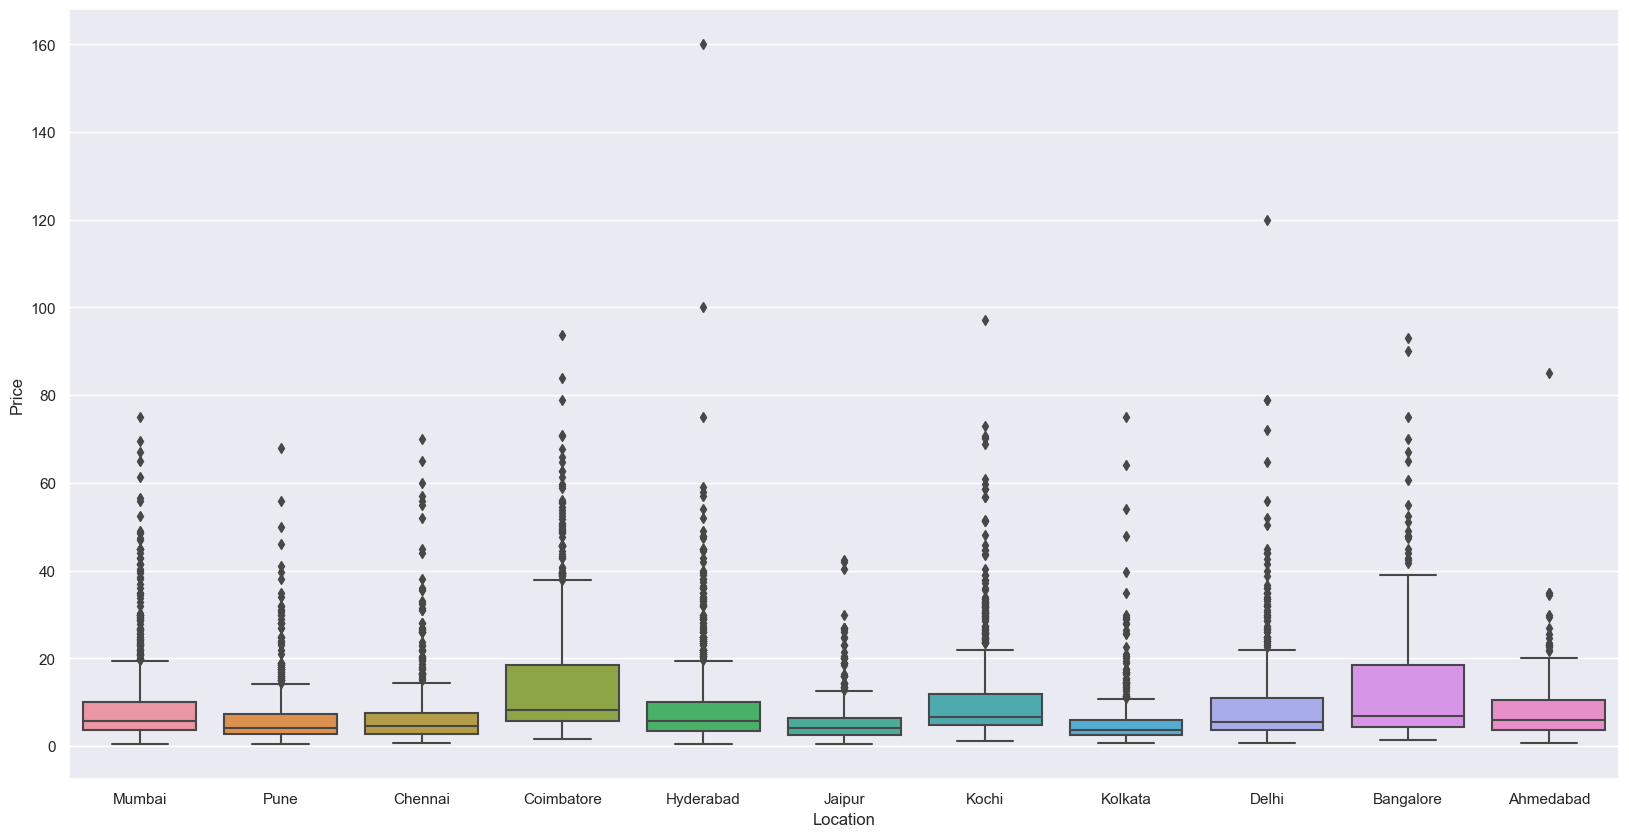

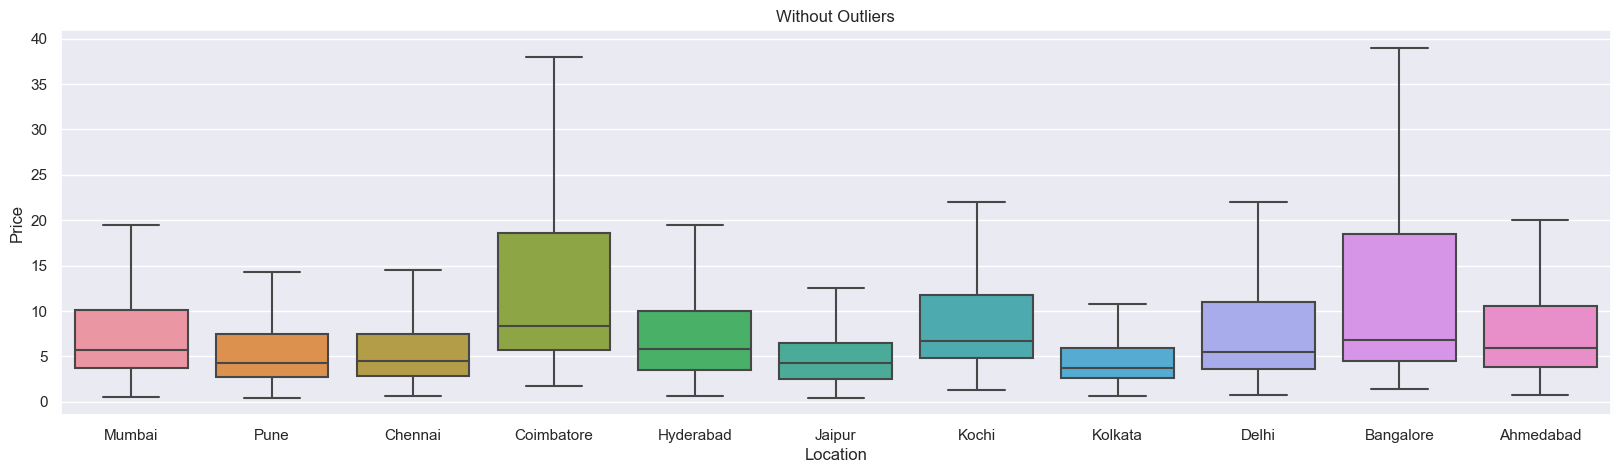

In [59]:
boxplot(data['Location'])

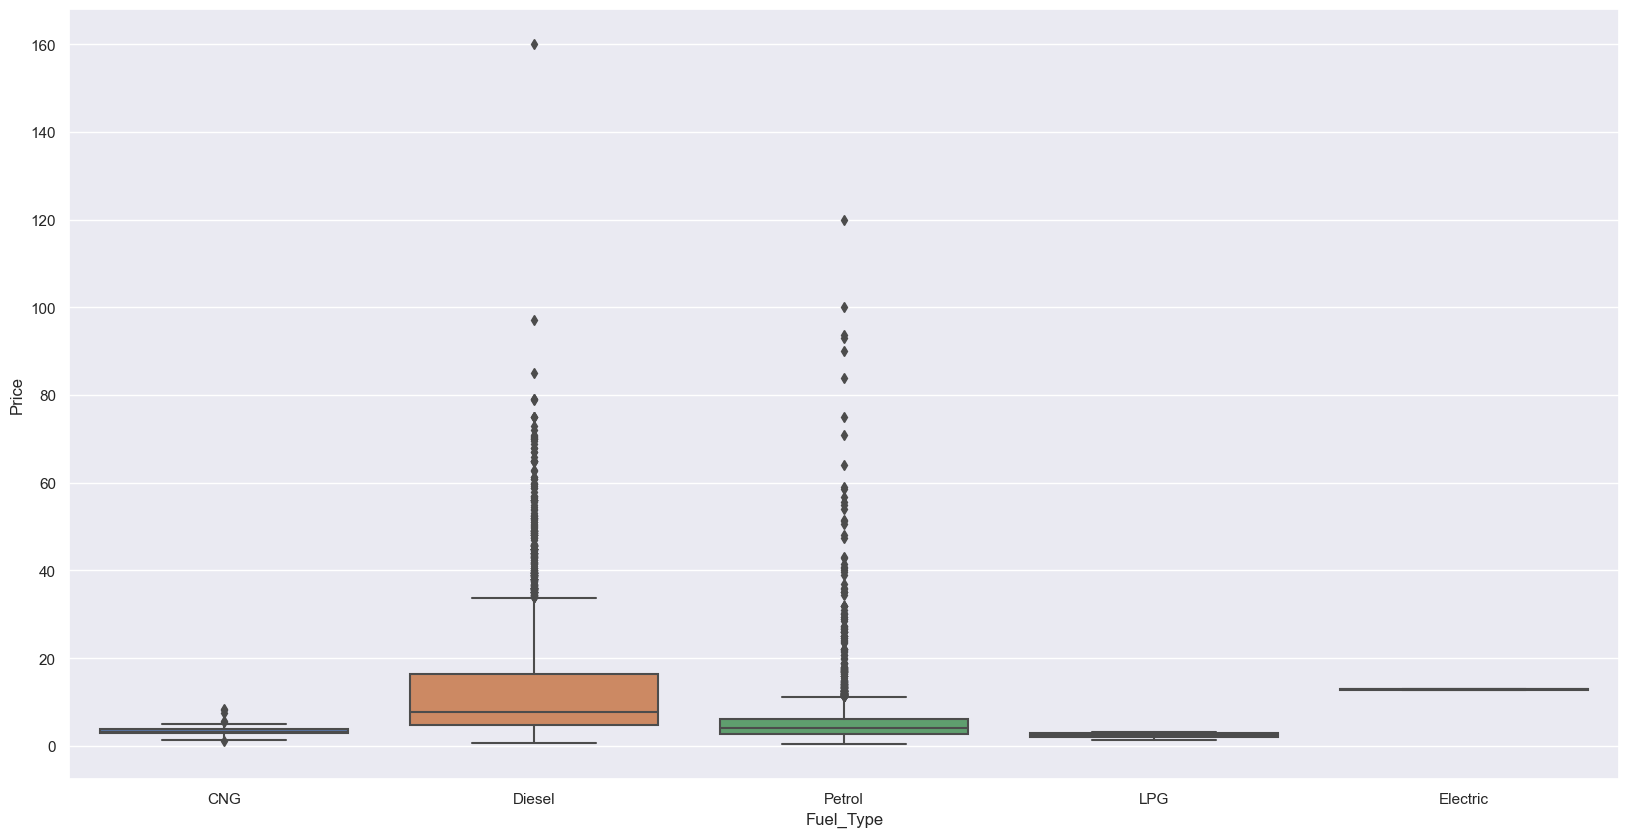

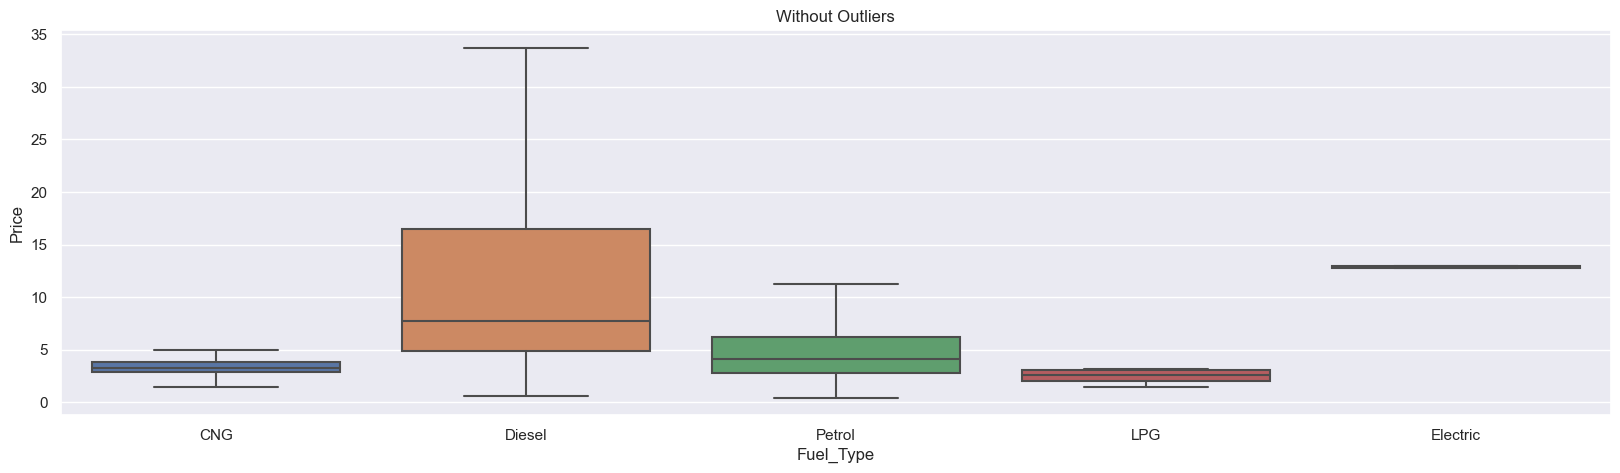

In [60]:
boxplot(data['Fuel_Type'])

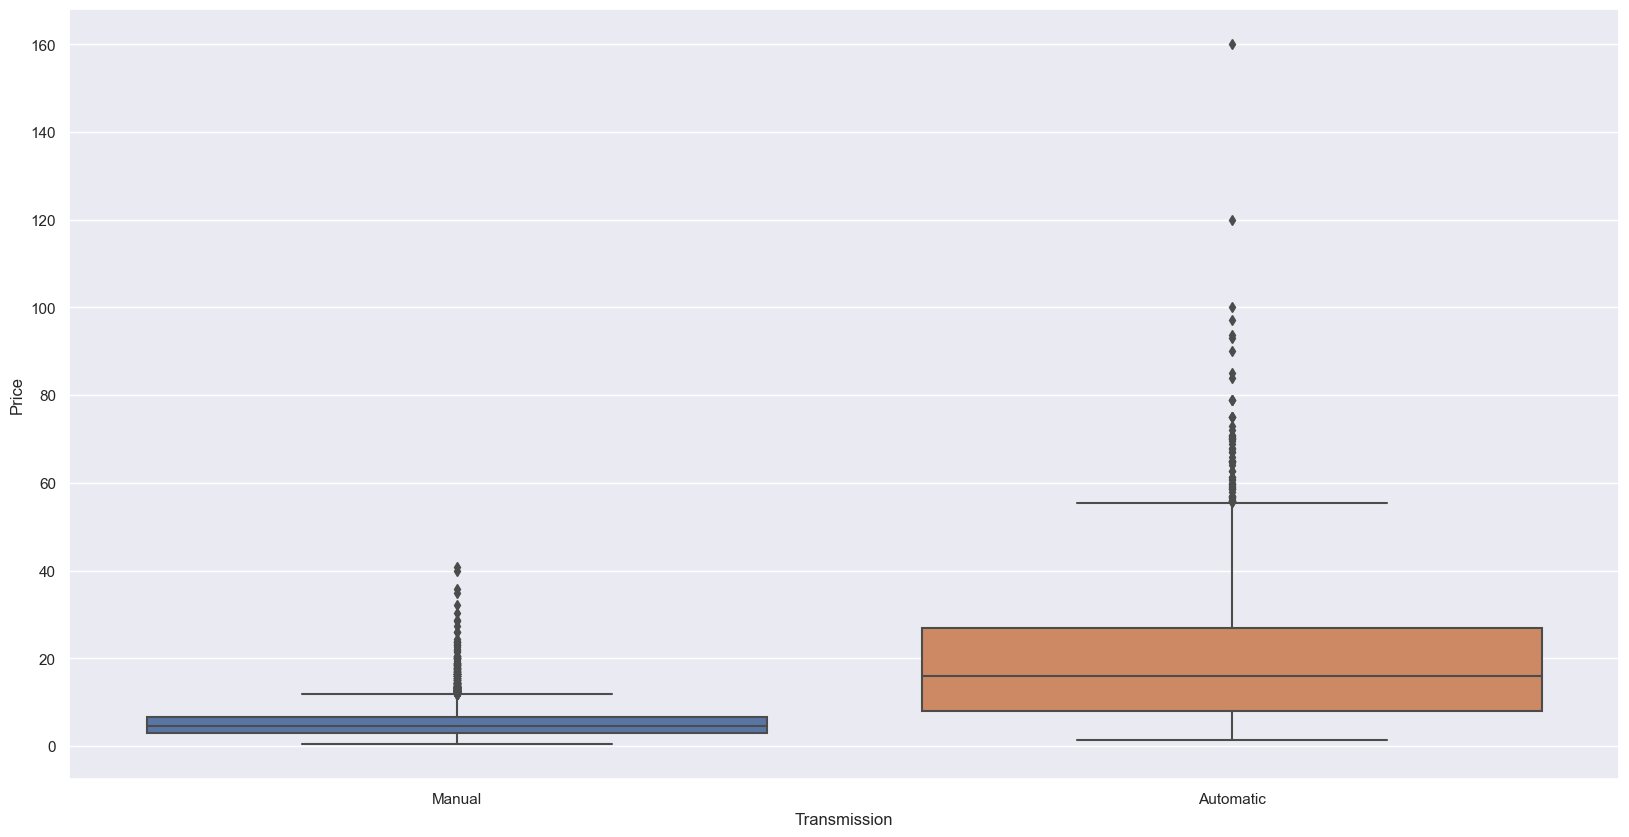

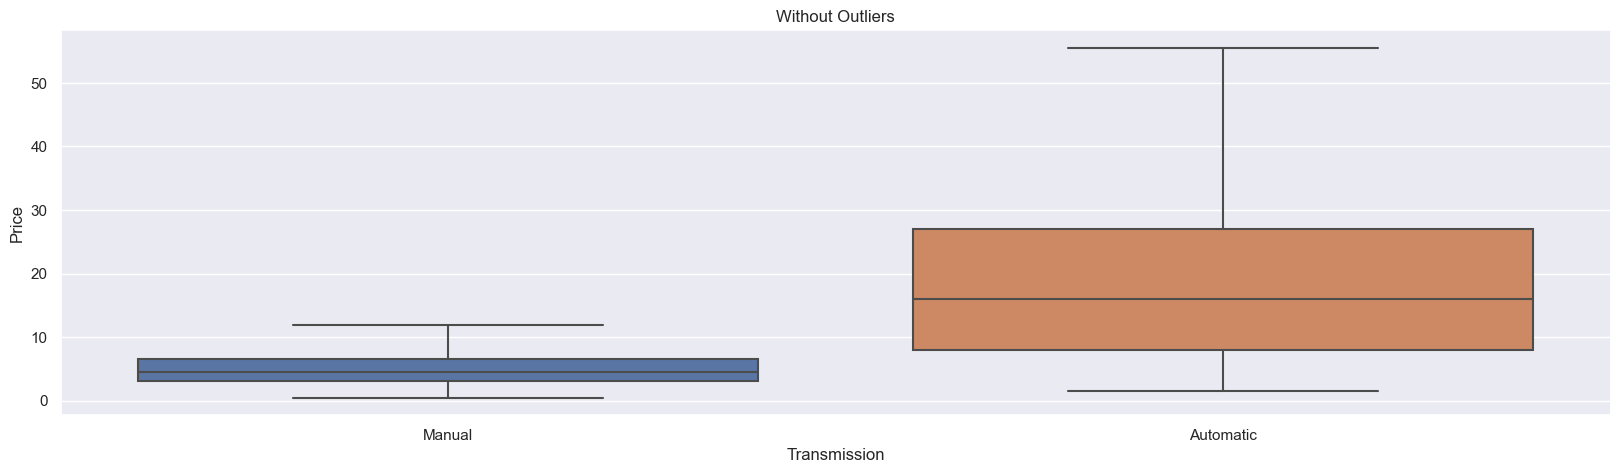

In [61]:
boxplot(data['Transmission'])

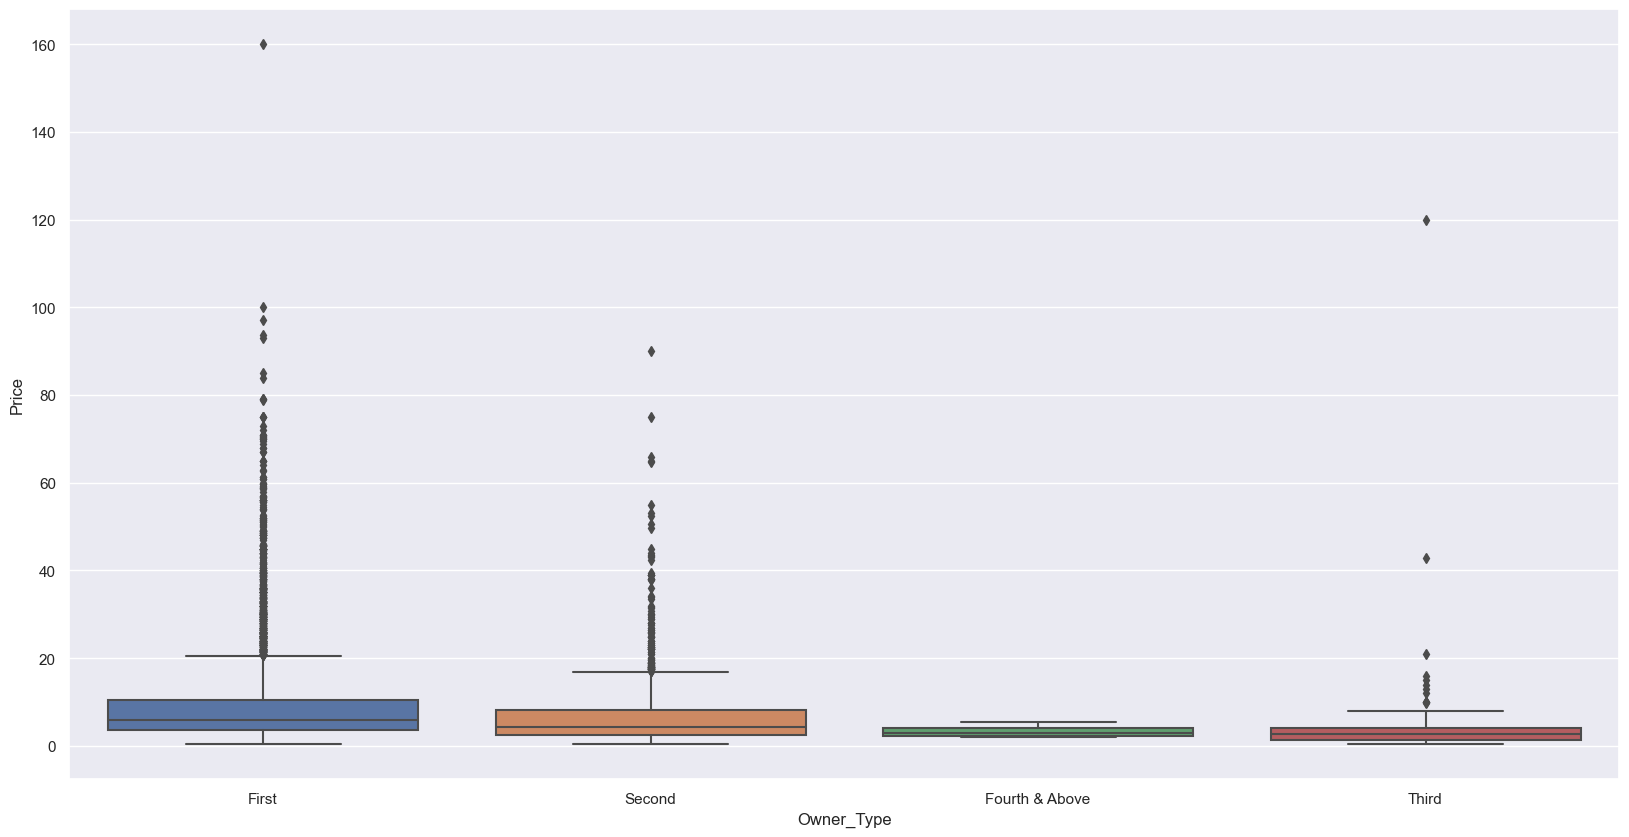

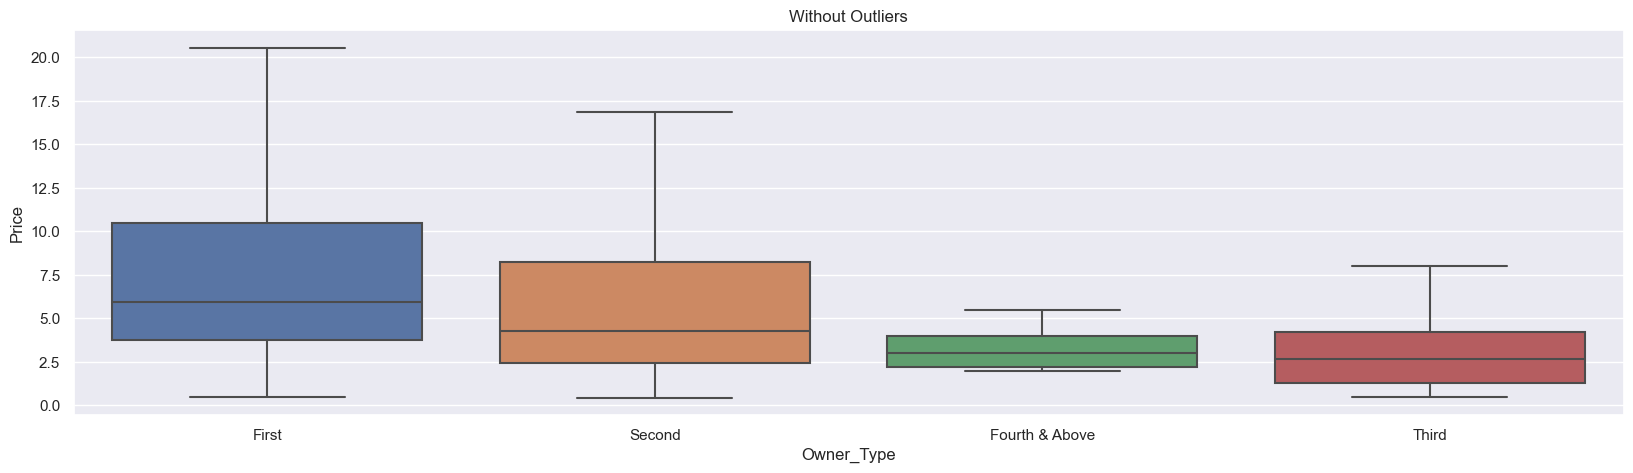

In [62]:
boxplot(data['Owner_Type'])

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [63]:
data.shape

(6018, 15)

In [64]:
data["Name"].value_counts()

Mahindra XUV500 W8 2WD                 49
Maruti Swift VDI                       45
Honda City 1.5 S MT                    34
Maruti Swift Dzire VDI                 34
Maruti Swift VDI BSIV                  31
                                       ..
Mahindra Scorpio S10 AT 4WD             1
Hyundai i20 1.2 Era                     1
Toyota Camry W4 (AT)                    1
BMW 5 Series 2013-2017 520d M Sport     1
Mahindra Xylo D4 BSIV                   1
Name: Name, Length: 1876, dtype: int64

In [65]:
# Extract Brand Names
data["Make"] = data["Name"].apply(lambda x: x.split(" ")[0])

In [66]:
data['Make'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               266
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Make, dtype: int64

In [67]:
# Extract Model Names
#data["Model"] = data["Name"].apply(lambda x: x.split(" ")[1])

In [68]:
#data['Model'].value_counts()

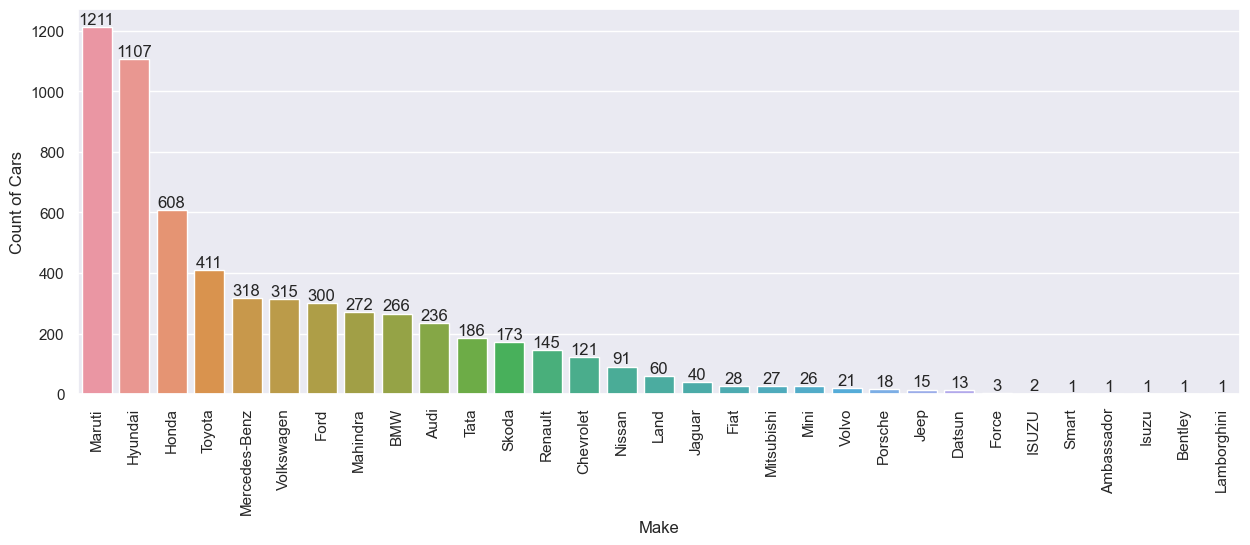

<Figure size 640x480 with 0 Axes>

In [69]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(data['Make'], order=data['Make'].value_counts().index,)
for label in plt1.containers:
    plt1.bar_label(label) # add corresponding labels on the top of each bar

plt1.set(xlabel = 'Make', ylabel= 'Count of Cars')
plt.xticks(rotation = 90)
plt.show()
plt.tight_layout()

### **Missing value treatment**

In [70]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     36
Power                     143
Seats                      42
New_price                5194
Price                       0
Kilometers_Driven_log       0
Price_log                   0
Make                        0
dtype: int64

In [71]:
#Let's check how many rows have Mileage = '0' after we dropped 1234 rows with missing values of Price.
sum(data['Mileage']==0)

68

**We have 68 instead of 81 values equal to zero in column Mileage.**

In [72]:
data[data['Mileage'].isnull()]

Name Location  Year  Kilometers_Driven Fuel_Type  \
4446       Mahindra E Verito D4  Chennai  2016              50000  Electric   
4904  Toyota Prius 2009-2016 Z4   Mumbai  2011              44000  Electric   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  New_price  Price  \
4446    Automatic      First      NaN   72.00  41.00   5.00      13.58  13.00   
4904    Automatic      First      NaN 1798.00  73.00   5.00        NaN  12.75   

      Kilometers_Driven_log  Price_log      Make  
4446                  10.82       2.56  Mahindra  
4904                  10.69       2.55    Toyota

**There are two missing values in Mileage. Also, there were 68 'zeroes' observed**

Let's try to replace zeroes with NaN, and then impute missing values.

In [73]:
data['Mileage'].replace(to_replace = 0, value = pd.NA, inplace=True)

In [74]:
sum(data['Mileage']==0)

0

**We have no more 'zero' values in Mileage.**

In [75]:
data[data['Mileage'].isnull()]

Name    Location  Year  \
14              Land Rover Freelander 2 TD4 SE        Pune  2012   
67    Mercedes-Benz C-Class Progressive C 220d  Coimbatore  2019   
79                      Hyundai Santro Xing XL   Hyderabad  2005   
194                         Honda City 1.5 GXI   Ahmedabad  2007   
229                           Ford Figo Diesel   Bangalore  2015   
...                                        ...         ...   ...   
5647                    Toyota Qualis Fleet A3      Mumbai  2001   
5875  Mercedes-Benz C-Class Progressive C 220d   Ahmedabad  2019   
5943                   Mahindra Jeep MM 540 DP     Chennai  2002   
5972                    Hyundai Santro Xing GL      Mumbai  2008   
6011                   Skoda Superb 3.6 V6 FSI   Hyderabad  2009   

      Kilometers_Driven Fuel_Type Transmission      Owner_Type Mileage  \
14                85000    Diesel    Automatic          Second    <NA>   
67                15369    Diesel    Automatic           First    <NA>   
79                87591    Petrol       Manual           First    <NA>   
194               60006    Petrol       Manual           First    <NA>   
229               70436    Diesel       Manual           First    <NA>   
...                 ...       ...          ...             ...     ...   
5647             227000    Diesel       Manual  Fourth & Above    <NA>   
5875               4000    Diesel    Automatic           First    <NA>   
5943              75000    Diesel       Manual           First    <NA>   
5972              65000    Petrol       Manual          Second    <NA>   
6011              53000    Petrol    Automatic           First    <NA>   

      Engine  Power  Seats  New_price  Price  Kilometers_Driven_log  \
14   2179.00 115.00   5.00        NaN  17.50                  11.35   
67   1950.00 194.00   5.00      49.14  35.67                   9.64   
79   1086.00    NaN   5.00        NaN   1.30                  11.38   
194      NaN    NaN    NaN        NaN   2.95                  11.00   
229  1498.00  99.00    NaN        NaN   3.60                  11.16   
...      ...    ...    ...        ...    ...                    ...   
5647 2446.00    NaN   8.00        NaN   2.20                  12.33   
5875 1950.00 194.00   5.00      49.14  35.00                   8.29   
5943 2112.00    NaN   6.00        NaN   1.70                  11.23   
5972 1086.00  62.00   5.00        NaN   1.39                  11.08   
6011 3597.00 262.60   5.00        NaN   4.75                  10.88   

      Price_log           Make  
14         2.86           Land  
67         3.57  Mercedes-Benz  
79         0.26        Hyundai  
194        1.08          Honda  
229        1.28           Ford  
...         ...            ...  
5647       0.79         Toyota  
5875       3.56  Mercedes-Benz  
5943       0.53       Mahindra  
5972       0.33        Hyundai  
6011       1.56          Skoda  

[70 rows x 16 columns]

In [76]:
# calculate the mean mileage for each Model
#mean_mileage = data.groupby('Model')['Mileage'].transform('mean')  
# replace the missing values with the mean mileage
#data['Mileage'] = data['Mileage'].fillna(mean_mileage)

In [77]:
data['Mileage'].isnull().sum()

70

In [78]:
# calculate the mean mileage for each Make
mean_mileage_1 = data.groupby('Make')['Mileage'].transform('mean')  
# replace the missing values with the mean mileage 
data['Mileage'] = data['Mileage'].fillna(mean_mileage_1)

In [79]:
data['Mileage'].isnull().sum()

1

In [80]:
data[data['Mileage'].isnull()]

Name Location  Year  Kilometers_Driven Fuel_Type  \
915  Smart Fortwo CDI AT     Pune  2008             103000    Diesel   

    Transmission Owner_Type  Mileage  Engine  Power  Seats  New_price  Price  \
915    Automatic     Second      NaN  799.00    NaN   2.00        NaN   3.00   

     Kilometers_Driven_log  Price_log   Make  
915                  11.54       1.10  Smart

In [81]:
mileage_col = data['Mileage']
mileage_col.replace(np.nan, value = mileage_col.mean(), inplace=True)

In [82]:
data['Mileage'].isnull().sum()

0

In [83]:
data.shape

(6018, 16)

In [84]:
# calculate the mean capacity for each Model
#mean_seats = data.groupby('Model')['Seats'].transform('mean')  
# replace the missing values with the mean capacity 
#data['Seats'] = data['Seats'].fillna(mean_seats)

In [85]:
data['Seats'].isnull().sum()

42

In [86]:
data[data['Seats'].isnull()]

Name    Location  Year  \
194                             Honda City 1.5 GXI   Ahmedabad  2007   
208                           Maruti Swift 1.3 VXi     Kolkata  2010   
229                               Ford Figo Diesel   Bangalore  2015   
733                           Maruti Swift 1.3 VXi     Chennai  2006   
749                   Land Rover Range Rover 3.0 D      Mumbai  2008   
1294                             Honda City 1.3 DX       Delhi  2009   
1327                          Maruti Swift 1.3 ZXI   Hyderabad  2015   
1385                            Honda City 1.5 GXI        Pune  2004   
1460  Land Rover Range Rover Sport 2005 2012 Sport  Coimbatore  2008   
1917                            Honda City 1.5 EXI      Jaipur  2005   
2074                          Maruti Swift 1.3 LXI        Pune  2011   
2096                     Hyundai Santro LP zipPlus  Coimbatore  2004   
2264                           Toyota Etios Liva V        Pune  2012   
2325                      Maruti Swift 1.3 VXI ABS        Pune  2015   
2335                          Maruti Swift 1.3 VXi      Mumbai  2007   
2369                             Maruti Estilo LXI     Chennai  2008   
2530                       BMW 5 Series 520d Sedan       Kochi  2014   
2542               Hyundai Santro GLS II - Euro II   Bangalore  2011   
2623                       BMW 5 Series 520d Sedan        Pune  2012   
2668                          Maruti Swift 1.3 VXi     Kolkata  2014   
2737                             Maruti Wagon R Vx      Jaipur  2001   
2780               Hyundai Santro GLS II - Euro II        Pune  2009   
2842               Hyundai Santro GLS II - Euro II   Bangalore  2012   
3272                       BMW 5 Series 520d Sedan      Mumbai  2008   
3404                          Maruti Swift 1.3 VXi      Jaipur  2006   
3520                       BMW 5 Series 520d Sedan       Delhi  2012   
3522               Hyundai Santro GLS II - Euro II       Kochi  2012   
3800                   Ford Endeavour Hurricane LE      Mumbai  2012   
3810                   Honda CR-V AT With Sun Roof     Kolkata  2013   
3882                             Maruti Estilo LXI     Kolkata  2010   
4011                        Fiat Punto 1.3 Emotion        Pune  2011   
4152                  Land Rover Range Rover 3.0 D      Mumbai  2003   
4229                        Hyundai Santro Xing XG   Bangalore  2005   
4577                       BMW 5 Series 520d Sedan       Delhi  2012   
4604                     Honda Jazz Select Edition        Pune  2011   
4697                        Fiat Punto 1.2 Dynamic       Kochi  2017   
4712                        Hyundai Santro Xing XG        Pune  2003   
4952                        Fiat Punto 1.4 Emotion     Kolkata  2010   
5015                          Maruti Swift 1.3 VXi       Delhi  2006   
5185                          Maruti Swift 1.3 LXI       Delhi  2012   
5270                            Honda City 1.5 GXI   Bangalore  2002   
5893                             Maruti Estilo LXI     Chennai  2008   

      Kilometers_Driven Fuel_Type Transmission      Owner_Type  Mileage  \
194               60006    Petrol       Manual           First    18.49   
208               42001    Petrol       Manual           First    16.10   
229               70436    Diesel       Manual           First    18.53   
733               97800    Petrol       Manual           Third    16.10   
749               55001    Diesel    Automatic          Second    12.89   
1294              55005    Petrol       Manual           First    12.80   
1327              50295    Petrol       Manual           First    16.10   
1385             115000    Petrol       Manual          Second    18.49   
1460              69078    Petrol       Manual           First    12.89   
1917              88000    Petrol       Manual          Second    13.00   
2074              24255    Petrol       Manual           First    16.10   
2096              52146    Petrol       Manual   

In [87]:
# calculate the mean capacity for each Make
mean_seats = data.groupby('Make')['Seats'].transform('mean')  
# replace the missing values with the mean capacity 
data['Seats'] = data['Seats'].fillna(mean_seats)

In [88]:
data['Seats'].isnull().sum()

0

In [89]:
# calculate the mean Engine for each Make
mean_engine = data.groupby('Make')['Engine'].transform('mean')  
# replace the missing values with the mean Engine
data['Engine'] = data['Engine'].fillna(mean_engine)

In [90]:
data['Engine'].isnull().sum()

0

In [91]:
# calculate the mean Power for each Model
#mean_power = data.groupby('Model')['Power'].transform('mean')  
# replace the missing values with the mean Power
#data['Power'] = data['Power'].fillna(mean_power)

In [92]:
data['Power'].isnull().sum()

143

In [93]:
data[data['Power'].isnull()]

Name   Location  Year  \
76                Ford Fiesta 1.4 SXi TDCi     Jaipur  2008   
79                  Hyundai Santro Xing XL  Hyderabad  2005   
89                  Hyundai Santro Xing XO  Hyderabad  2007   
120   Hyundai Santro Xing XL eRLX Euro III     Mumbai  2005   
143    Hyundai Santro Xing XO eRLX Euro II      Kochi  2008   
...                                    ...        ...   ...   
5873   Hyundai Santro Xing XO eRLX Euro II       Pune  2006   
5893                     Maruti Estilo LXI    Chennai  2008   
5925           Skoda Laura Classic 1.8 TSI       Pune  2010   
5943               Mahindra Jeep MM 540 DP    Chennai  2002   
5985                       Toyota Etios GD      Delhi  2013   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
76               111111    Diesel       Manual      First    17.80 1399.00   
79                87591    Petrol       Manual      First    19.29 1086.00   
89                73745    Petrol       Manual      First    17.00 1086.00   
120              102000    Petrol       Manual     Second    17.00 1086.00   
143               80759    Petrol       Manual      Third    17.00 1086.00   
...                 ...       ...          ...        ...      ...     ...   
5873              47200    Petrol       Manual     Second    17.00 1086.00   
5893              51000    Petrol       Manual     Second    19.50 1061.00   
5925              85000    Petrol       Manual      First    17.50 1798.00   
5943              75000    Diesel       Manual      First    15.16 2112.00   
5985              70000    Diesel       Manual      First    23.59 1364.00   

      Power  Seats  New_price  Price  Kilometers_Driven_log  Price_log  \
76      NaN   5.00        NaN   2.00                  11.62       0.69   
79      NaN   5.00        NaN   1.30                  11.38       0.26   
89      NaN   5.00        NaN   2.10                  11.21       0.74   
120     NaN   5.00        NaN   0.85                  11.53      -0.16   
143     NaN   5.00        NaN   1.67                  11.30       0.51   
...     ...    ...        ...    ...                    ...        ...   
5873    NaN   5.00        NaN   1.20                  10.76       0.18   
5893    NaN   5.15        NaN   1.75                  10.84       0.56   
5925    NaN   5.00        NaN   2.85                  11.35       1.05   
5943    NaN   6.00        NaN   1.70                  11.23       0.53   
5985    NaN   5.00        NaN   3.88                  11.16       1.36   

          Make  
76        Ford  
79     Hyundai  
89     Hyundai  
120    Hyundai  
143    Hyundai  
...        ...  
5873   Hyundai  
5893    Maruti  
5925     Skoda  
5943  Mahindra  
5985    Toyota  

[143 rows x 16 columns]

In [94]:
# calculate the mean Power for each Make
mean_power_1 = data.groupby('Make')['Power'].transform('mean')  
# replace the missing values with the mean Power
data['Power'] = data['Power'].fillna(mean_power_1)

In [95]:
data['Power'].isnull().sum()

1

In [96]:
data[data['Power'].isnull()]

Name Location  Year  Kilometers_Driven Fuel_Type  \
915  Smart Fortwo CDI AT     Pune  2008             103000    Diesel   

    Transmission Owner_Type  Mileage  Engine  Power  Seats  New_price  Price  \
915    Automatic     Second    18.33  799.00    NaN   2.00        NaN   3.00   

     Kilometers_Driven_log  Price_log   Make  
915                  11.54       1.10  Smart

In [97]:
# calculate the mean Power for each Engine
mean_power_2 = data.groupby('Engine')['Power'].transform('mean')  
# replace the missing values with the mean Power
data['Power'] = data['Power'].fillna(mean_power_2)

In [98]:
data['Power'].isnull().sum()

0

In [99]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                5194
Price                       0
Kilometers_Driven_log       0
Price_log                   0
Make                        0
dtype: int64

In [100]:
# calculate the mean New_price for each Model
#mean_newprice = data.groupby('Model')['New_price'].transform('mean')  
# replace the missing values with the mean New_price
#data['New_price'] = data['New_price'].fillna(mean_newprice)

In [101]:
data['New_price'].isnull().sum()

5194

In [102]:
# calculate the mean New_Price for each Make
mean_newprice_1 = data.groupby('Make')['New_price'].transform('mean')  
# replace the missing values with the mean power
data['New_price'] = data['New_price'].fillna(mean_newprice_1)

In [103]:
data['New_price'].isnull().sum()

130

In [104]:
data_newprice_nan = data[data['New_price'].isnull()]
data_newprice_nan.head()

Name Location  Year  Kilometers_Driven  \
145           Chevrolet Beat LT Option     Pune  2014              38800   
179           Chevrolet Beat Diesel LT   Jaipur  2012              88000   
183  Chevrolet Optra Magnum 1.6 LS BS3   Jaipur  2007             118500   
231                  Chevrolet Beat LT    Kochi  2016              60813   
240           Chevrolet Beat Diesel LT   Mumbai  2013              74000   

    Fuel_Type Transmission Owner_Type  Mileage  Engine  Power  Seats  \
145    Petrol       Manual      First    18.60 1199.00  76.80   5.00   
179    Diesel       Manual      First    25.44  936.00  57.60   5.00   
183    Petrol       Manual      First    12.90 1598.00 102.50   5.00   
231    Petrol       Manual     Second    18.60 1199.00  76.80   5.00   
240    Diesel       Manual      First    25.44  936.00  57.60   5.00   

     New_price  Price  Kilometers_Driven_log  Price_log       Make  
145        NaN   2.85                  10.57       1.05  Chevrolet  
179        NaN   1.50                  11.39       0.41  Chevrolet  
183        NaN   1.25                  11.68       0.22  Chevrolet  
231        NaN   3.32                  11.02       1.20  Chevrolet  
240        NaN   2.65                  11.21       0.97  Chevrolet

**Few Makes have no New_price filled: Chevrolet , Smart, Hindustan, Isuzu, Lamborghini, Ambassador, and Force** Should we drop these rows?

In [105]:
# Drop rows that have NaN values in column New_price
data.dropna(subset=['New_price'], inplace = True)
data['New_price'].isnull().sum()

0

In [106]:
data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
Kilometers_Driven_log    0
Price_log                0
Make                     0
dtype: int64

In [107]:
data.shape

(5888, 16)

In [108]:
data.describe().T

count     mean      std     min      25%      50%  \
Year                  5888.00  2013.40     3.27 1998.00  2012.00  2014.00   
Kilometers_Driven     5888.00 57575.34 37997.89  171.00 33781.25 53000.00   
Mileage               5888.00    18.33     4.17    7.50    15.30    18.25   
Engine                5888.00  1624.15   598.31   72.00  1198.00  1495.00   
Power                 5888.00   113.33    53.27   34.20    75.94    96.76   
Seats                 5888.00     5.28     0.80    2.00     5.00     5.00   
New_price             5888.00    22.12    23.73    3.91     9.22    11.62   
Price                 5888.00     9.58    11.13    0.44     3.50     5.75   
Kilometers_Driven_log 5888.00    10.76     0.72    5.14    10.43    10.88   
Price_log             5888.00     1.84     0.87   -0.82     1.25     1.75   

                           75%       max  
Year                   2016.00   2019.00  
Kilometers_Driven     72683.25 775000.00  
Mileage                  21.10     33.54  
Engine                 1984.00   5461.00  
Power                   138.10    550.00  
Seats                     5.00     10.00  
New_price                23.87    230.00  
Price                    10.10    160.00  
Kilometers_Driven_log    11.19     13.56  
Price_log                 2.31      5.08

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

In the EDA and Data Preprocessing stage we:
- identified and eliminated outliers in Kilometers driven
- apllied log transformation for Kilometers Driven and Price, as their distributions were right skewed
- analized correlation between dependent and independent variables. Price is correlated with Year, Power, Engine, Mileage, Kilometers Driven.
- identified null values in few columns
- replaced null values, so the dataset has no more null values.

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Separating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

In [109]:
# We are removing the outcome variable from the feature set
# Also removing the variable e have created a new variable Kilometers_Driven (as we have created a new variable Kilometers_Driven_log), and removing New_price, as it has too many missing values
X = data.drop(['Name','Price','Price_log','Kilometers_Driven', 'New_price'], axis = 1)

# And then we are extracting the outcome variable separately
Y = data["Price_log"]
Y_1 = data[["Price_log", "Price"]]

In [110]:
Y.shape

(5888,)

In [111]:
X.describe().T

count    mean    std     min     25%     50%     75%  \
Year                  5888.00 2013.40   3.27 1998.00 2012.00 2014.00 2016.00   
Mileage               5888.00   18.33   4.17    7.50   15.30   18.25   21.10   
Engine                5888.00 1624.15 598.31   72.00 1198.00 1495.00 1984.00   
Power                 5888.00  113.33  53.27   34.20   75.94   96.76  138.10   
Seats                 5888.00    5.28   0.80    2.00    5.00    5.00    5.00   
Kilometers_Driven_log 5888.00   10.76   0.72    5.14   10.43   10.88   11.19   

                          max  
Year                  2019.00  
Mileage                 33.54  
Engine                5461.00  
Power                  550.00  
Seats                   10.00  
Kilometers_Driven_log   13.56

In [112]:
for col in X.columns:
    print(col)

Location
Year
Fuel_Type
Transmission
Owner_Type
Mileage
Engine
Power
Seats
Kilometers_Driven_log
Make


In [113]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5888 entries, 0 to 6017
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               5888 non-null   object 
 1   Year                   5888 non-null   int64  
 2   Fuel_Type              5888 non-null   object 
 3   Transmission           5888 non-null   object 
 4   Owner_Type             5888 non-null   object 
 5   Mileage                5888 non-null   float64
 6   Engine                 5888 non-null   float64
 7   Power                  5888 non-null   float64
 8   Seats                  5888 non-null   float64
 9   Kilometers_Driven_log  5888 non-null   float64
 10  Make                   5888 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 552.0+ KB


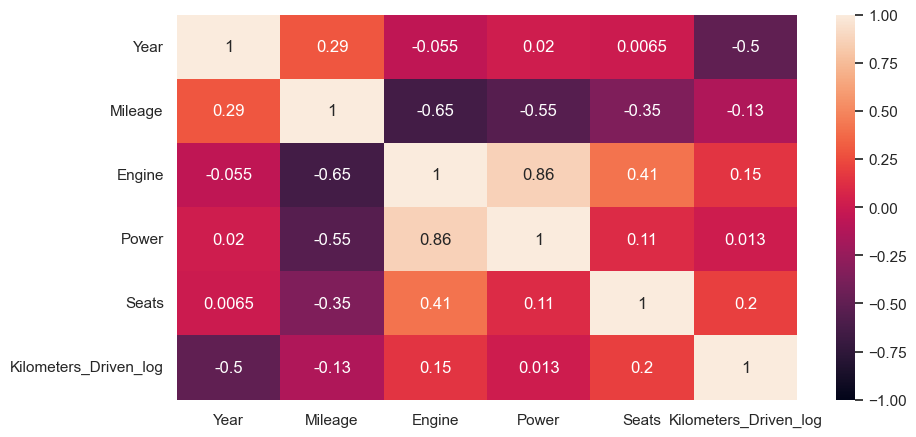

In [114]:
plt.figure(figsize = (10, 5))

sns.heatmap(X.corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

In [115]:
# Creating dummy variables for the categorical variables
print('Shape of data before encoding ', X.shape)
X = pd.get_dummies(X, drop_first = True)
print('Shape of data after encoding ', X.shape)
X.head()

Shape of data before encoding  (5888, 11)
Shape of data after encoding  (5888, 47)


Year  Mileage  Engine  Power  Seats  Kilometers_Driven_log  \
0  2010    26.60  998.00  58.16   5.00                  11.18   
1  2015    19.67 1582.00 126.20   5.00                  10.62   
2  2011    18.20 1199.00  88.70   5.00                  10.74   
3  2012    20.77 1248.00  88.76   7.00                  11.37   
4  2013    15.20 1968.00 140.80   5.00                  10.61   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  \
0                   0                 0                    0               0   
1                   0                 0                    0               0   
2                   0                 1                    0               0   
3                   0                 1                    0               0   
4                   0                 0                    1               0   

   ...  Make_Mini  Make_Mitsubishi  Make_Nissan  Make_Porsche  Make_Renault  \
0  ...          0                0            0             0             0   
1  ...          0                0            0             0             0   
2  ...          0                0            0             0             0   
3  ...          0                0            0             0             0   
4  ...          0                0            0             0             0   

   Make_Skoda  Make_Tata  Make_Toyota  Make_Volkswagen  Make_Volvo  
0           0          0            0                0           0  
1           0          0            0                0           0  
2           0          0            0                0           0  
3           0          0            0                0           0  
4           0          0            0                0           0  

[5 rows x 47 columns]

For Regression Problems, we are using the following algorithms:<br>

**1) Linear Regression** <br>
**2) Decision Trees** <br>
**3) Random Forest** <br>

In [116]:
# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
X_scaled = scaler.fit_transform(X)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns = X.columns)

X_scaled.head()

Year  Mileage  Engine  Power  Seats  Kilometers_Driven_log  \
0  0.57     0.73    0.17   0.05   0.38                   0.72   
1  0.81     0.47    0.28   0.18   0.38                   0.65   
2  0.62     0.41    0.21   0.11   0.38                   0.66   
3  0.67     0.51    0.22   0.11   0.62                   0.74   
4  0.71     0.30    0.35   0.21   0.38                   0.65   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  Location_Delhi  \
0                0.00              0.00                 0.00            0.00   
1                0.00              0.00                 0.00            0.00   
2                0.00              1.00                 0.00            0.00   
3                0.00              1.00                 0.00            0.00   
4                0.00              0.00                 1.00            0.00   

   ...  Make_Mini  Make_Mitsubishi  Make_Nissan  Make_Porsche  Make_Renault  \
0  ...       0.00             0.00         0.00          0.00          0.00   
1  ...       0.00             0.00         0.00          0.00          0.00   
2  ...       0.00             0.00         0.00          0.00          0.00   
3  ...       0.00             0.00         0.00          0.00          0.00   
4  ...       0.00             0.00         0.00          0.00          0.00   

   Make_Skoda  Make_Tata  Make_Toyota  Make_Volkswagen  Make_Volvo  
0        0.00       0.00         0.00             0.00        0.00  
1        0.00       0.00         0.00             0.00        0.00  
2        0.00       0.00         0.00             0.00        0.00  
3        0.00       0.00         0.00             0.00        0.00  
4        0.00       0.00         0.00             0.00        0.00  

[5 rows x 47 columns]

In [117]:
X_scaled.shape

(5888, 47)

In [118]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.30, random_state = 1)

In [119]:
# Sanity check for the sampled data
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4121, 47)
(4121,)
(1767, 47)
(1767,)


In [120]:
# Adding the intercept term
X_train_lr = sm.add_constant(X_train)
# Add constant to test data
X_test_lr = sm.add_constant(X_test)

# Calling the OLS algorithm on the train features and the target variable and Fitting the Model
ols_model_0 = sm.OLS(Y_train, X_train_lr).fit()

print(ols_model_0.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1055.
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:30:58   Log-Likelihood:                 27.124
No. Observations:                4121   AIC:                             41.75
Df Residuals:                    4073   BIC:                             345.3
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [121]:
#Check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    return vif

print(checking_vif(X_train_lr))

                      feature    VIF
0                       const 507.69
1                        Year   2.15
2                     Mileage   3.84
3                      Engine  10.80
4                       Power   9.77
5                       Seats   2.55
6       Kilometers_Driven_log   1.80
7          Location_Bangalore   2.45
8            Location_Chennai   2.89
9         Location_Coimbatore   3.43
10             Location_Delhi   3.05
11         Location_Hyderabad   3.69
12            Location_Jaipur   2.60
13             Location_Kochi   3.48
14           Location_Kolkata   3.03
15            Location_Mumbai   3.91
16              Location_Pune   3.31
17           Fuel_Type_Diesel  28.17
18         Fuel_Type_Electric   1.06
19              Fuel_Type_LPG   1.14
20           Fuel_Type_Petrol  29.44
21        Transmission_Manual   2.38
22  Owner_Type_Fourth & Above   1.02
23          Owner_Type_Second   1.19
24           Owner_Type_Third   1.10
25                   Make_BMW   2.09
2

In [122]:
vif_1 = checking_vif(X_train_lr)
vif_1.sort_values('VIF')

feature    VIF
31                 Make_Isuzu   1.02
22  Owner_Type_Fourth & Above   1.02
18         Fuel_Type_Electric   1.06
47                 Make_Volvo   1.08
24           Owner_Type_Third   1.10
26                Make_Datsun   1.11
38                  Make_Mini   1.11
33                  Make_Jeep   1.12
19              Fuel_Type_LPG   1.14
32                Make_Jaguar   1.18
23          Owner_Type_Second   1.19
27                  Make_Fiat   1.21
39            Make_Mitsubishi   1.22
34                  Make_Land   1.23
41               Make_Porsche   1.24
40                Make_Nissan   1.66
6       Kilometers_Driven_log   1.80
43                 Make_Skoda   1.81
42               Make_Renault   1.93
25                   Make_BMW   2.09
1                        Year   2.15
37         Make_Mercedes-Benz   2.24
21        Transmission_Manual   2.38
44                  Make_Tata   2.38
7          Location_Bangalore   2.45
5                       Seats   2.55
12            Location_Jaipur   2.60
8            Location_Chennai   2.89
46            Make_Volkswagen   2.91
28                  Make_Ford   2.98
14           Location_Kolkata   3.03
10             Location_Delhi   3.05
35              Make_Mahindra   3.09
16              Location_Pune   3.31
9         Location_Coimbatore   3.43
13             Location_Kochi   3.48
11         Location_Hyderabad   3.69
45                Make_Toyota   3.81
2                     Mileage   3.84
15            Location_Mumbai   3.91
29                 Make_Honda   4.62
30               Make_Hyundai   7.16
36                Make_Maruti   8.53
4                       Power   9.77
3                      Engine  10.80
17           Fuel_Type_Diesel  28.17
20           Fuel_Type_Petrol  29.44
0                       const 507.69

In [123]:
vif_1.isnull().sum()

feature    0
VIF        0
dtype: int64

Fuel_Type_Petrol has a highest VIF score. Therefore, we are dropping Fuel_Type_Petrol and rechecking VIF scores.

In [124]:
# Create the model after dropping NaN Models
X_train_1 = X_train_lr.drop(columns = {'Fuel_Type_Petrol'})
X_test_0 = X_test_lr.drop(columns = {'Fuel_Type_Petrol'})
# Check for updated VIF
vif_2 = checking_vif(X_train_1)
vif_2.sort_values('VIF')

feature    VIF
19              Fuel_Type_LPG   1.01
30                 Make_Isuzu   1.02
21  Owner_Type_Fourth & Above   1.02
18         Fuel_Type_Electric   1.02
46                 Make_Volvo   1.08
23           Owner_Type_Third   1.10
25                Make_Datsun   1.11
37                  Make_Mini   1.11
32                  Make_Jeep   1.12
31                Make_Jaguar   1.18
22          Owner_Type_Second   1.19
26                  Make_Fiat   1.21
38            Make_Mitsubishi   1.22
33                  Make_Land   1.23
40               Make_Porsche   1.24
39                Make_Nissan   1.65
6       Kilometers_Driven_log   1.78
42                 Make_Skoda   1.81
41               Make_Renault   1.92
24                   Make_BMW   2.08
1                        Year   2.15
36         Make_Mercedes-Benz   2.24
43                  Make_Tata   2.38
20        Transmission_Manual   2.38
7          Location_Bangalore   2.45
5                       Seats   2.54
12            Location_Jaipur   2.60
17           Fuel_Type_Diesel   2.68
8            Location_Chennai   2.89
45            Make_Volkswagen   2.90
27                  Make_Ford   2.97
14           Location_Kolkata   3.03
10             Location_Delhi   3.05
34              Make_Mahindra   3.09
16              Location_Pune   3.31
9         Location_Coimbatore   3.43
13             Location_Kochi   3.48
2                     Mileage   3.62
11         Location_Hyderabad   3.69
44                Make_Toyota   3.80
15            Location_Mumbai   3.90
28                 Make_Honda   4.58
29               Make_Hyundai   7.12
35                Make_Maruti   8.52
4                       Power   9.76
3                      Engine  10.67
0                       const 329.96

In [125]:
# Create the model after dropping Seats
#X_train_2 = X_train_1.drop(columns = 'Engine')
#X_test_0 = X_test_0.drop(columns = 'Engine')
# Check for updated VIF
#vif_3 = checking_vif(X_train_2)
#vif_3.sort_values('VIF')

All the VIF Scores are now less than 10 indicating no multicollinearity, so we will proceed with building the model.

In [126]:
# Calling the OLS algorithm on the train features and the target variable
ols_model_1 = sm.OLS(Y_train, X_train_1).fit()

print(ols_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1077.
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:31:00   Log-Likelihood:                 24.971
No. Observations:                4121   AIC:                             44.06
Df Residuals:                    4074   BIC:                             341.3
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observations:**
We can see that the R-squared for the model is 0.924.

Not all variables are statistically significant to predict the outcome variable. To check which variables are statistically significant or have predictive power to predict the target variable, we need to check the **p-value** against all the independent variables. **'Fuel_Type_LPG', 'Make_Jaguar', 'Make_Mercedes-Benz', 'Owner_Type_Fourth & Above', 'Location_Chennai', 'Make_BMW', 'Location_Kochi', 'Location_Pune'** variables have high p-values, so they are not statistically significant, and we will eliminate them.

Interpreting the Regression Results:

**Adj. R-squared:** It reflects the fit of the model.

Adjusted R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.

In our case, the value for Adjusted R-squared is 0.703.

**coeff:** It represents the change in the output Y due to a change of one unit in the independent variable (everything else held constant).

**std err:** It reflects the level of accuracy of the coefficients.

The lower it is, the more accurate the coefficients are.

**P >|t|:** It is the p-value.

Pr(>|t|) : For each independent feature, there is a null hypothesis and alternate hypothesis.

Ho : Independent feature is not significant.

Ha : Independent feature is significant.

The p-value of less than 0.05 is considered to be statistically significant with a confidence level of 95%.

**Confidence Interval:** It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

In [127]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(ols_model_1.params, columns = ['coef'])

olsmod['pval'] = ols_model_1.pvalues

In [128]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']>= 0.05

olsmod[pval_filter]

coef  pval
Fuel_Type_LPG              0.01  0.95
Make_Jaguar               -0.02  0.72
Make_Mercedes-Benz         0.01  0.57
Owner_Type_Fourth & Above  0.06  0.54
Location_Chennai           0.02  0.38
Make_BMW                  -0.04  0.13
Location_Kochi            -0.04  0.10
Location_Pune             -0.04  0.09

In [129]:
list_to_drop = olsmod[pval_filter].index
list_to_drop

Index(['Fuel_Type_LPG', 'Make_Jaguar', 'Make_Mercedes-Benz',
       'Owner_Type_Fourth & Above', 'Location_Chennai', 'Make_BMW',
       'Location_Kochi', 'Location_Pune'],
      dtype='object')

In [130]:
X_train_2 = X_train_1.drop(columns = list_to_drop, axis = 1)
X_test_1 = X_test_0.drop(columns = list_to_drop, axis = 1)


# Calling the OLS algorithm on the train features and the target variable
ols_model_2 = sm.OLS(Y_train, X_train_2).fit()

print(ols_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1299.
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:31:00   Log-Likelihood:                 14.942
No. Observations:                4121   AIC:                             48.12
Df Residuals:                    4082   BIC:                             294.7
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [131]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod_1 = pd.DataFrame(ols_model_2.params, columns = ['coef'])

olsmod_1['pval'] = ols_model_2.pvalues

In [132]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod_1 = olsmod_1.sort_values(by = "pval", ascending = False)

pval_filter = olsmod_1['pval']>= 0.05

olsmod_1[pval_filter]

Empty DataFrame
Columns: [coef, pval]
Index: []

In [133]:
#X_train_4 = X_train_3.drop(["Location_Jaipur", "Make_Isuzu"], axis = 1)
#X_test = X_test.drop(["Location_Jaipur", "Make_Isuzu"], axis = 1)


# Calling the OLS algorithm on the train features and the target variable
#ols_model_3 = sm.OLS(Y_train, X_train_4).fit()

#print(ols_model_3.summary())

In [134]:
#X_train_5 = X_train_4.drop(["Location_Mumbai"], axis = 1)
#X_test = X_test.drop(["Location_Mumbai"], axis = 1)
# Calling the OLS algorithm on the train features and the target variable
#ols_model_4 = sm.OLS(Y_train, X_train_5).fit()

#print(ols_model_4.summary())

**Observations:**
- Both, the R-squared and adj. R-squared values did not change, as we have removed few variables from the model.
- Now, all the p values are lesser than 0.05 implying all the current variables are significant for the model.
- Lets' check the assumptions of the linear regression model.

In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied:
1. Mean of residuals should be 0
2. No heteroscedasticity
3. Linearity of variables
4. Normality of error terms

**Mean of residuals should be zero.**

In [135]:
residuals = ols_model_2.resid
print(residuals)

4696   -0.14
4984    0.10
874     0.07
3590   -0.26
5802   -0.18
        ... 
926     0.50
5303   -0.09
4068    0.25
239    -0.16
5268    0.17
Length: 4121, dtype: float64


In [136]:
residuals.mean()

3.197275279065254e-14

- The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

### **Tests for Normality**

**What is the test?**

* Error terms/Residuals should be normally distributed.

* If the error terms are non-normally distributed, confidence intervals may become too wide or narrow. Once the confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on the minimization of least squares.

**What does non-normality indicate?**

* It suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check the normality?**

* We can plot the histogram of residuals and check the distribution visually.

* It can be checked via QQ Plot. Residuals following normal distribution will make a straight line plot otherwise not.

* Another test to check for normality: The Shapiro-Wilk test.

**What if the residuals are not-normal?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

<AxesSubplot:ylabel='Count'>

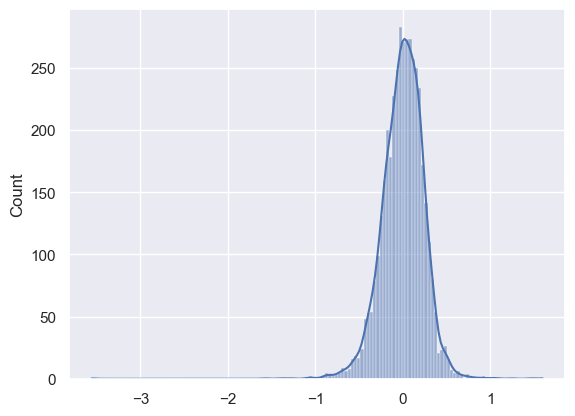

In [137]:
# Plot histogram of residuals
sns.histplot(residuals, kde = True)

We can see that the error terms are normally distributed. The assumption of normality is satisfied.

In [138]:
from scipy.stats import shapiro
shapiro(residuals)

ShapiroResult(statistic=0.9458773732185364, pvalue=1.8056266569358026e-36)

As can be seen, the p-value is significant and the residuals are not normally distributed according to the Shapiro-Wilk test.

We can also use a QQ-plot as well.

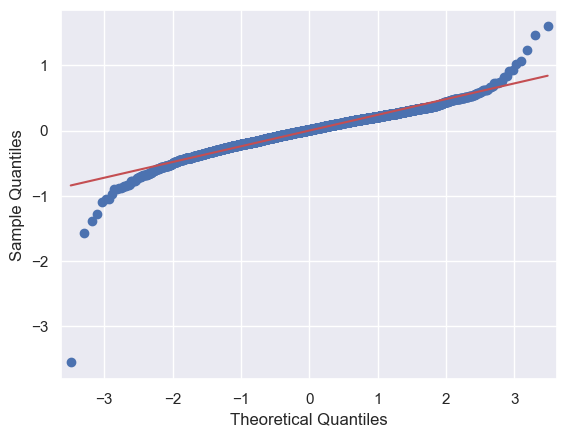

In [139]:
sm.qqplot(residuals, line = 's');

We see large departures from the normal distribution at the both tails of the distribution.

### **Linearity of Variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test this assumption, we'll plot the residuals and the fitted values and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

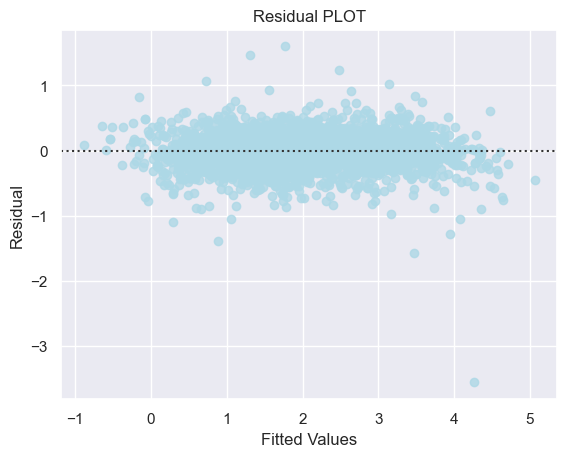

In [140]:
# Predicted values
fitted = ols_model_2.fittedvalues

sns.residplot(x = fitted, y = residuals, color = "lightblue")

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations:**

- We can see that there is no pattern in fitted values and residuals, i.e., the residuals are randomly distributed.
- The linearity assumption is satisfied.

#### **Test for Homoscedasticity**

* **Homoscedasticity -** If the variance of the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedasticity -** If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form an arrow shape or any other non symmetrical shape.

- We will use Goldfeld–Quandt test to check homoscedasticity.

    - Null hypothesis : Residuals are homoscedastic

    - Alternate hypothesis : Residuals are heteroscedastic

In [141]:
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(Y_train, X_train_2)

lzip(name, test)

[('F statistic', 1.087074746168932), ('p-value', 0.03026598958586885)]

In [142]:
print(ols_model_2.rsquared)

0.9236251243851165


In [143]:
print(ols_model_2.mse_resid)

0.058682133259633194


In [144]:
print(np.sqrt(ols_model_2.mse_resid))

0.24224395402080356


In [145]:
X_train_2.shape

(4121, 39)

In [146]:
X_test_1.shape

(1767, 39)

In [147]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_perf(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = Y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = Y_test

    pd.set_option('display.float_format', lambda x: '%.3f' % x) # round numbers in the table
    
    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ]
            },
        )
    )

In [148]:
# Checking model performance
model_perf(ols_model_2, X_train_2, X_test_1)

    Data  RMSE   MAE  MAPE
0  Train 0.241 0.179   inf
1   Test 0.228 0.176   inf


This time output shows Inf in MAPE error measure. The reason behind it we have zeros in observed values of Price_Log. When the dependent variable can take zero as one of the outputs, we cannot use MAPE as error measure. In this case other error measures should be used.

In [149]:
# Fitting linear model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train_2, Y_train, cv = 10)

cv_Score12 = cross_val_score(linearregression, X_train_2, Y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std()*2))

print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std()*2))

RSquared: 0.920 (+/- 0.028)
Mean Squared Error: 0.061 (+/- 0.024)


In [150]:
coef = ols_model_2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

Feature  Coefs
0                   const  0.250
1                    Year  2.527
2                 Mileage -0.523
3                  Engine  0.753
4                   Power  2.630
5                   Seats  0.289
6   Kilometers_Driven_log -0.569
7      Location_Bangalore  0.160
8     Location_Coimbatore  0.101
9          Location_Delhi -0.061
10     Location_Hyderabad  0.123
11        Location_Jaipur -0.036
12       Location_Kolkata -0.226
13        Location_Mumbai -0.042
14       Fuel_Type_Diesel  0.310
15     Fuel_Type_Electric  1.246
16    Transmission_Manual -0.132
17      Owner_Type_Second -0.070
18       Owner_Type_Third -0.173
19            Make_Datsun -1.025
20              Make_Fiat -0.794
21              Make_Ford -0.637
22             Make_Honda -0.488
23           Make_Hyundai -0.554
24             Make_Isuzu -0.635
25              Make_Jeep -0.356
26              Make_Land  0.316
27          Make_Mahindra -0.703
28            Make_Maruti -0.542
29              Make_Mini  0.423
30        Make_Mitsubishi -0.351
31            Make_Nissan -0.589
32           Make_Porsche -0.179
33           Make_Renault -0.588
34             Make_Skoda -0.485
35              Make_Tata -1.034
36            Make_Toyota -0.348
37        Make_Volkswagen -0.565
38             Make_Volvo -0.198

In [151]:
# These test predictions will be on a log scale
Y_pred = ols_model_2.predict(X_test_1) 

# We are converting the log scale predictions to its original scale
Y_pred_transformed = np.exp(Y_pred)

Y_pred_transformed

3391    3.412
4134    9.423
374    19.073
290     4.897
5426    1.275
        ...  
791     4.129
1647    4.459
3414    3.382
4169    3.524
1571    2.403
Length: 1767, dtype: float64

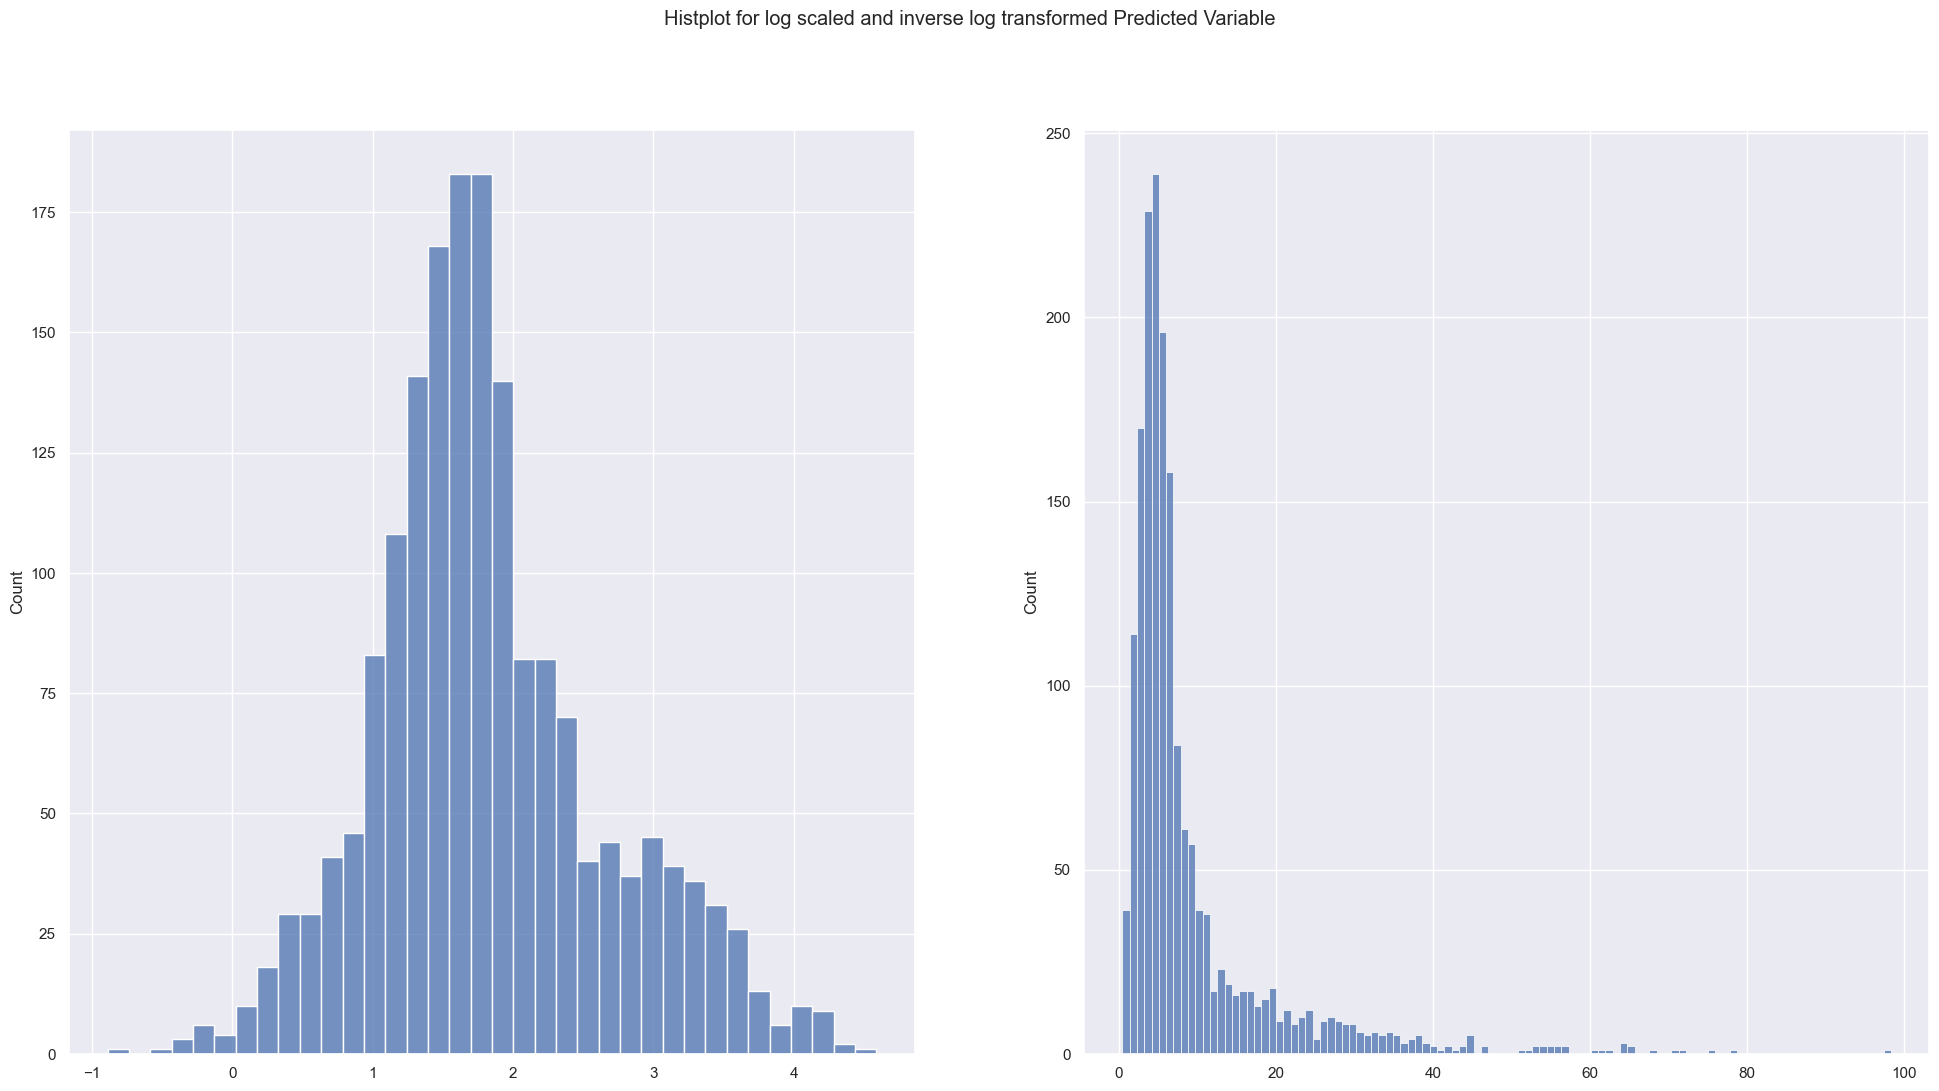

In [152]:
fig, ax = plt.subplots(1, 2, figsize = (24, 12))

fig.suptitle('Histplot for log scaled and inverse log transformed Predicted Variable')

sns.histplot(Y_pred, ax = ax[0]);

sns.histplot(Y_pred_transformed, ax = ax[1]);

Text(0.5, 1.0, 'Prices vs Predicted Prices')

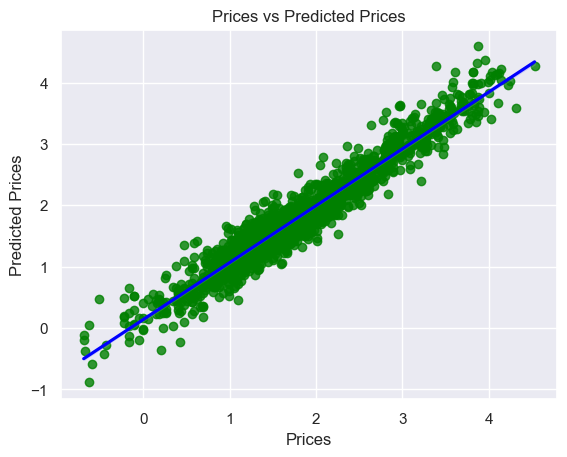

In [153]:
# create scatterplot of predicted vs real prices from test set with regression line 
sns.regplot(Y_test, Y_pred, scatter_kws={"color": "green"}, line_kws={"color": "blue"}) 

plt.xlabel("Prices")

plt.ylabel("Predicted Prices")

plt.title("Prices vs Predicted Prices")

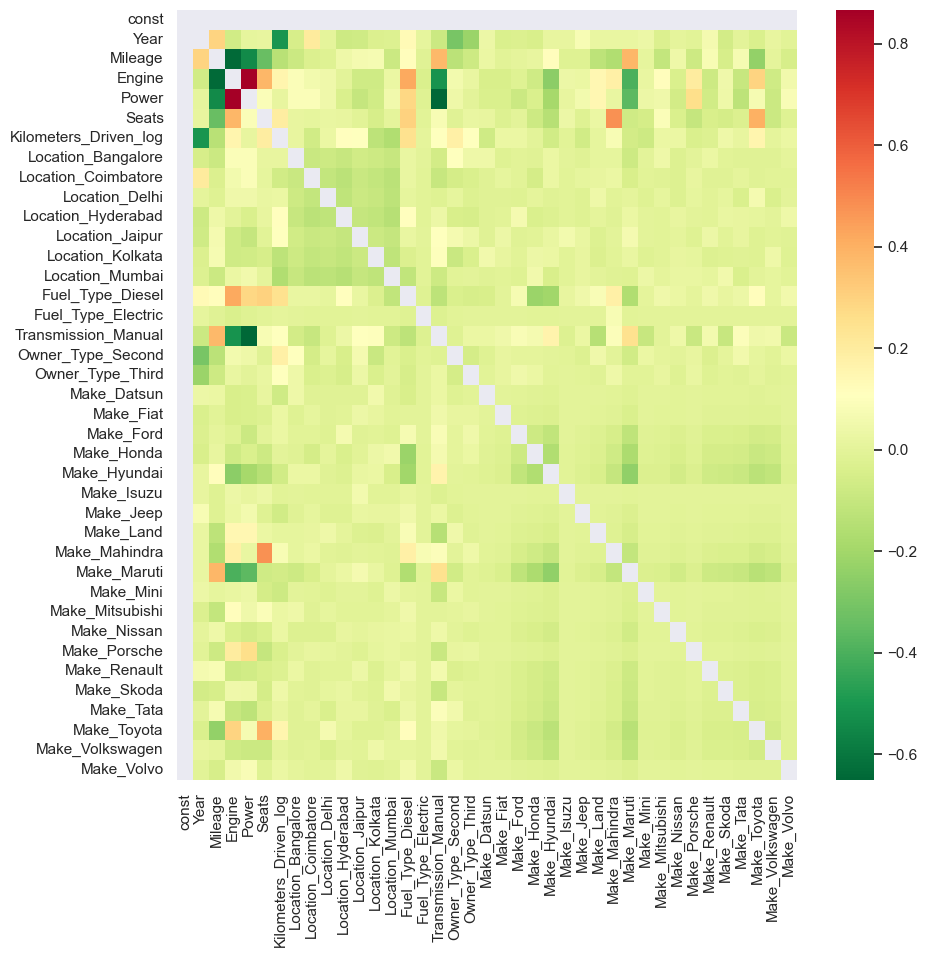

In [154]:
import seaborn
c = X_train_2.corr()
plt.figure(figsize=(10,10))
seaborn.heatmap(c, cmap='RdYlGn_r', mask = (np.abs(c) >= 0.9))
plt.show()

In [155]:
a = X_train_2.corr().abs()
b = a.unstack()
ao = b.sort_values(kind="quicksort")

corr_filter_1 = np.abs(ao) >= 0.6
ao[corr_filter_1].head(15)

Mileage              Engine                0.641
Engine               Mileage               0.641
Transmission_Manual  Power                 0.651
Power                Transmission_Manual   0.651
                     Engine                0.866
Engine               Power                 0.866
Year                 Year                  1.000
Make_Toyota          Make_Toyota           1.000
Transmission_Manual  Transmission_Manual   1.000
Fuel_Type_Electric   Fuel_Type_Electric    1.000
Fuel_Type_Diesel     Fuel_Type_Diesel      1.000
Location_Mumbai      Location_Mumbai       1.000
Location_Kolkata     Location_Kolkata      1.000
Location_Jaipur      Location_Jaipur       1.000
Location_Hyderabad   Location_Hyderabad    1.000
dtype: float64

### **Decision Tree** 



In [156]:
X.shape

(5888, 47)

In [157]:
Y_2 = Y_1.drop(['Price_log'], axis = 1)

In [158]:
Y_2.shape

(5888, 1)

In [159]:
# splitting the data in 70:30 ratio of train to test data
#X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X, Y_2, test_size = 0.30, random_state = 1)

In [160]:
X_train.shape

(4121, 47)

In [161]:
X_test.shape

(1767, 47)

In [162]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,Y_train)
tr_regressor.score(X_train,Y_train)
#tr_regressor.score(X_test,Y_test)
#pred_tr = tr_regressor.predict(X_test)
#decision_score=tr_regressor.score(X_test,Y_test)
#expl_tr = explained_variance_score(pred_tr,Y_test)

0.999993175146016

We got almost 100% score on training data.

In [163]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,Y_train)
tr_regressor.score(X_test,Y_test)
#pred_tr = tr_regressor.predict(X_test)
#decision_score=tr_regressor.score(X_test,Y_test)
#expl_tr = explained_variance_score(pred_tr,Y_test)

0.8777173479357665

On test data we got 87.7% score because we did not provide any tuning parameters while intializing the tree as a result of which algorithm split the training data till the leaf node. Due to which depth of tree increased and our model did the overfitting.

That's why we are getting high score on our training data and less score on test data.

So to solve this problem we would use hyper parameter tuning.

We can use GridSearch or RandomizedSearch for hyper parameters tuning.



In [164]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,Y_train)
tr_regressor.score(X_test,Y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,Y_test)
expl_tr = explained_variance_score(pred_tr,Y_test)

In [165]:
dt_features = pd.DataFrame(tr_regressor.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)

In [166]:
dt_features.shape

(47, 1)

In [167]:
dt_features.head(20)

Imp
Power                 0.641
Year                  0.228
Engine                0.025
Kilometers_Driven_log 0.019
Mileage               0.012
Make_Mahindra         0.010
Make_Mercedes-Benz    0.006
Make_Tata             0.006
Location_Kolkata      0.005
Make_Honda            0.004
Location_Kochi        0.004
Location_Hyderabad    0.003
Seats                 0.003
Location_Coimbatore   0.003
Make_Skoda            0.003
Make_Land             0.003
Transmission_Manual   0.002
Make_Toyota           0.002
Make_Mini             0.002
Make_Hyundai          0.002

In [168]:
print(pd.DataFrame(tr_regressor.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                     0.641
Year                      0.228
Engine                    0.025
Kilometers_Driven_log     0.019
Mileage                   0.012
Make_Mahindra             0.010
Make_Mercedes-Benz        0.006
Make_Tata                 0.006
Location_Kolkata          0.005
Make_Honda                0.004
Location_Kochi            0.004
Location_Hyderabad        0.003
Seats                     0.003
Location_Coimbatore       0.003
Make_Skoda                0.003
Make_Land                 0.003
Transmission_Manual       0.002
Make_Toyota               0.002
Make_Mini                 0.002
Make_Hyundai              0.002
Owner_Type_Second         0.002
Location_Bangalore        0.002
Location_Delhi            0.002
Fuel_Type_Diesel          0.001
Owner_Type_Third          0.001
Make_Maruti               0.001
Location_Mumbai           0.001
Location_Chennai          0.001
Location_Pune             0.001
Location_Jaipur           0.001
Make_Vol

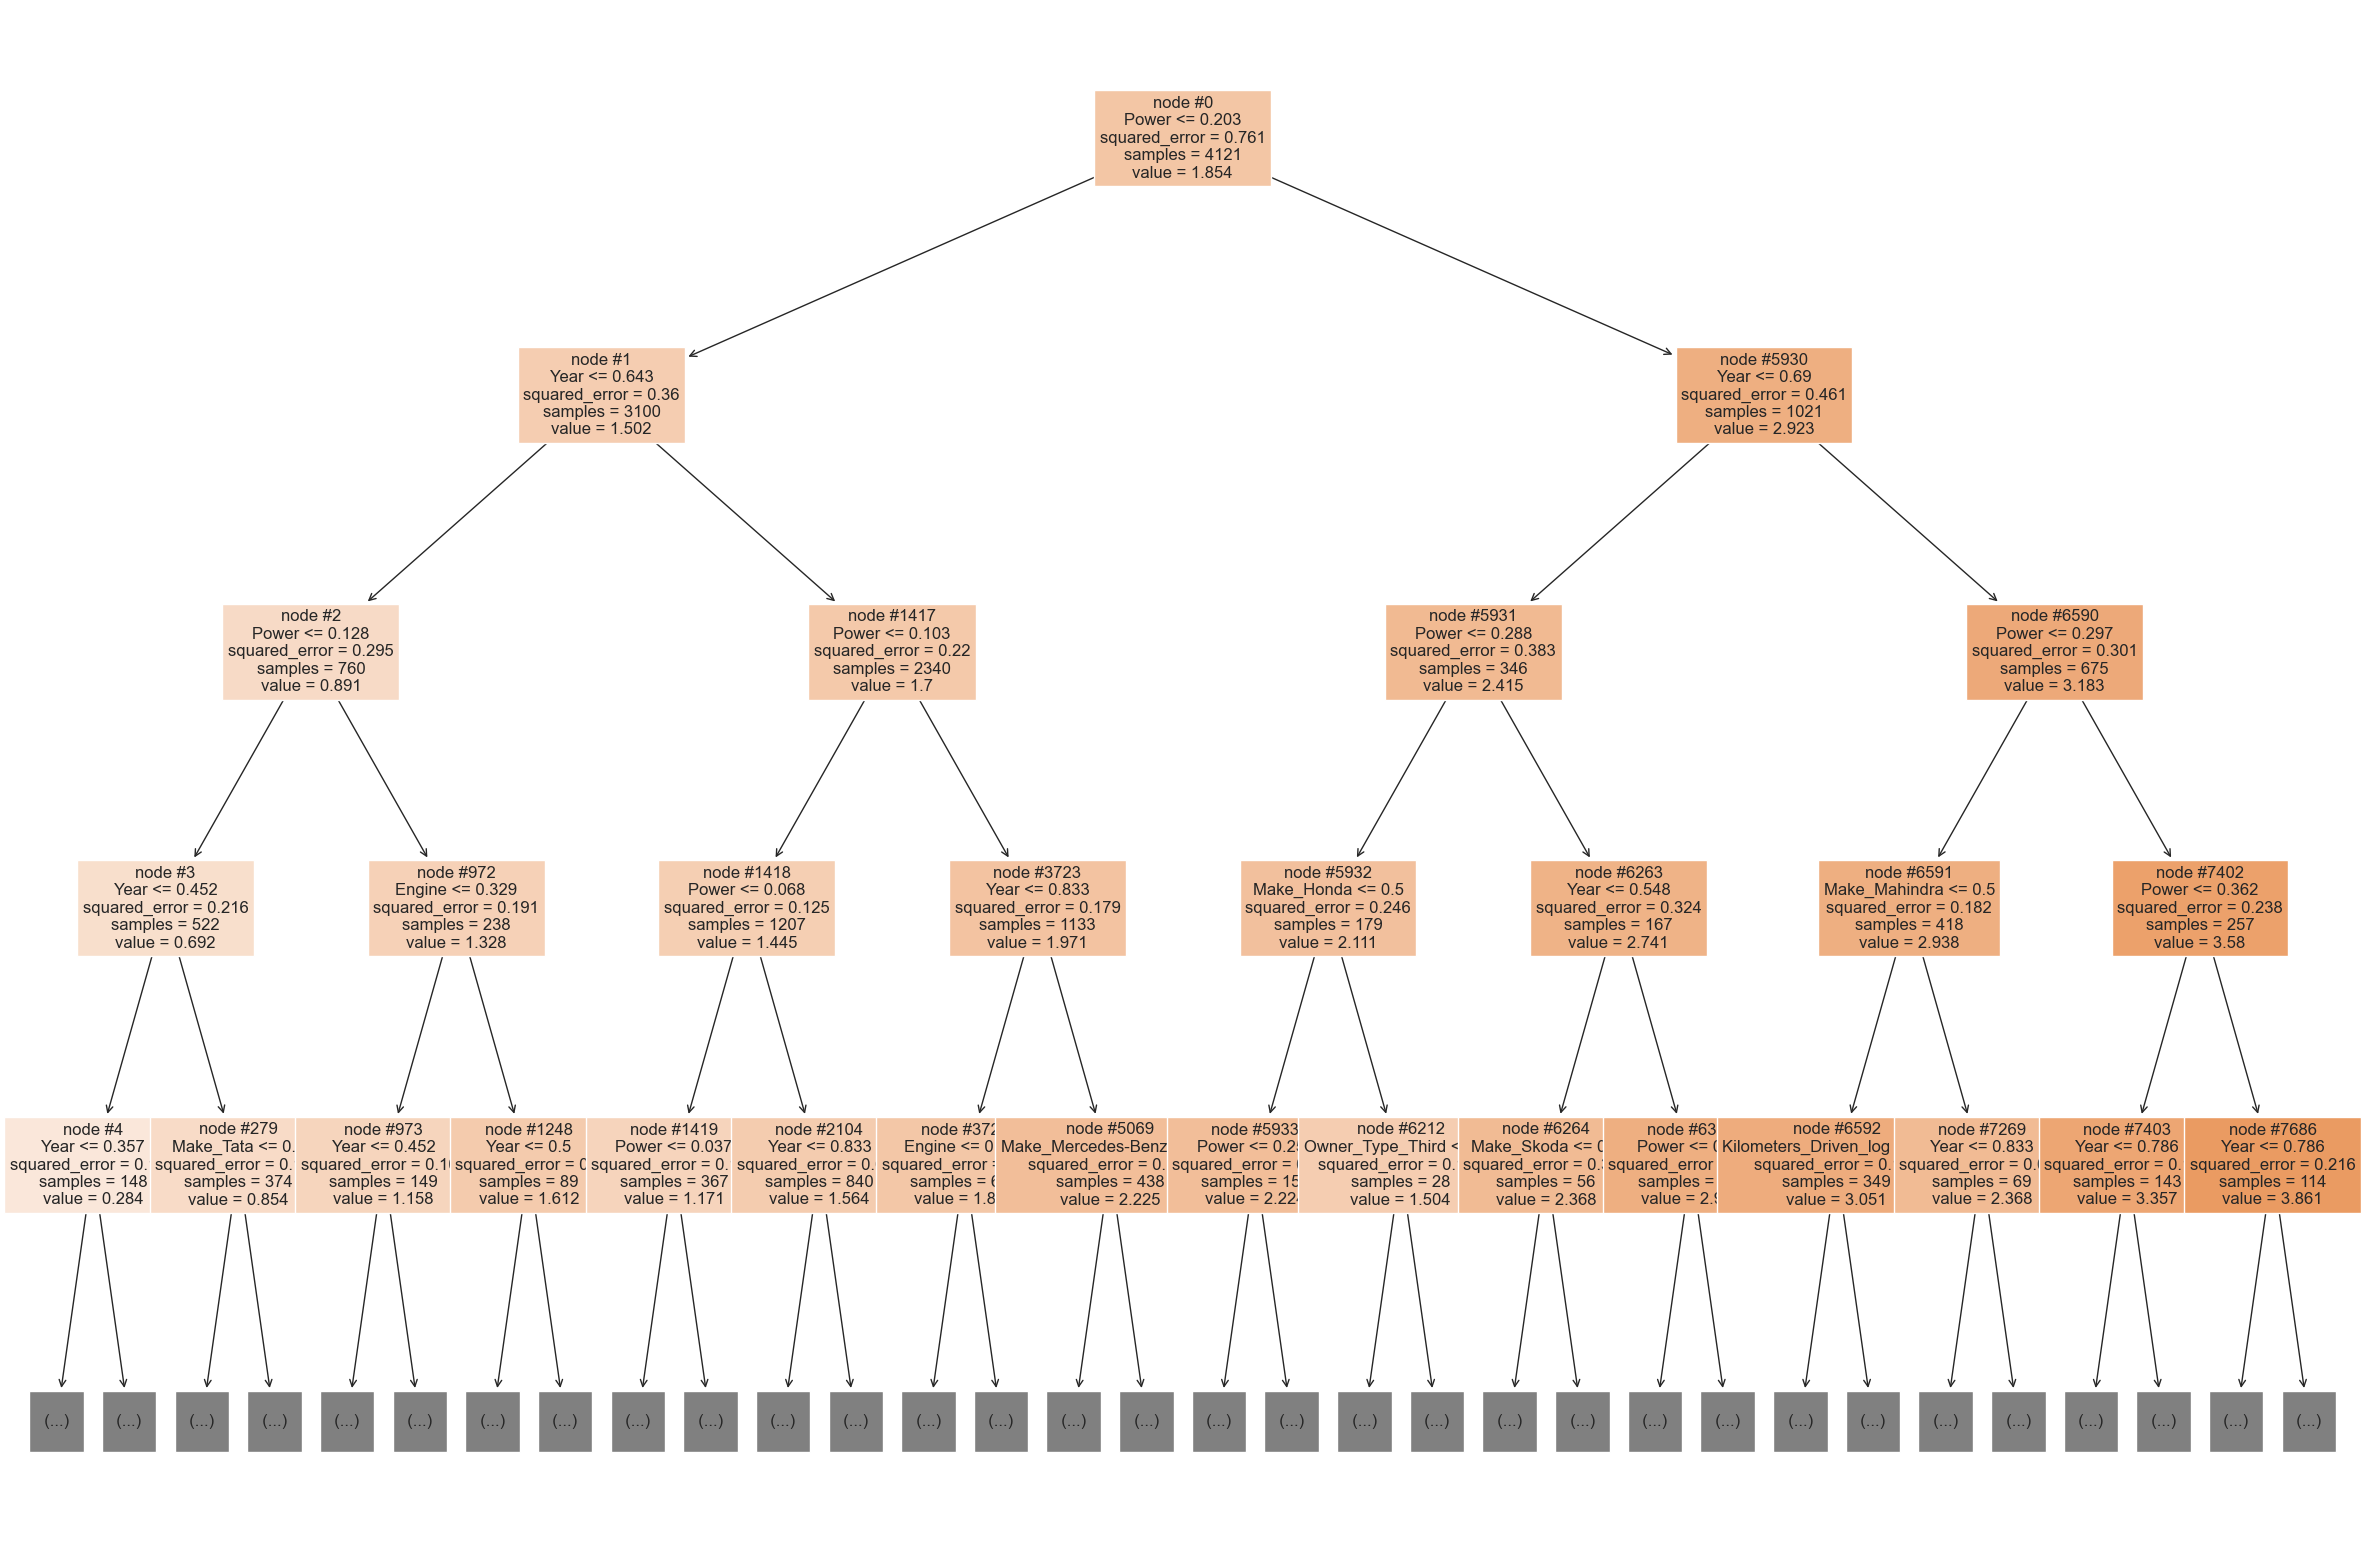

In [169]:
from sklearn import tree
features = list(X_train.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(tr_regressor, max_depth=4,feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

In [170]:
from sklearn.tree import export_text

r = export_text(tr_regressor, feature_names=(list(X_train.columns)))
print(r)

|--- Power <= 0.20
|   |--- Year <= 0.64
|   |   |--- Power <= 0.13
|   |   |   |--- Year <= 0.45
|   |   |   |   |--- Year <= 0.36
|   |   |   |   |   |--- Engine <= 0.31
|   |   |   |   |   |   |--- Year <= 0.26
|   |   |   |   |   |   |   |--- Location_Jaipur <= 0.50
|   |   |   |   |   |   |   |   |--- Mileage <= 0.22
|   |   |   |   |   |   |   |   |   |--- Kilometers_Driven_log <= 0.79
|   |   |   |   |   |   |   |   |   |   |--- Engine <= 0.25
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- Engine >  0.25
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.37]
|   |   |   |   |   |   |   |   |   |--- Kilometers_Driven_log >  0.79
|   |   |   |   |   |   |   |   |   |   |--- value: [-0.11]
|   |   |   |   |   |   |   |   |--- Mileage >  0.22
|   |   |   |   |   |   |   |   |   |--- Kilometers_Driven_log <= 0.70
|   |   |   |   |   |   |   |   |   |   |--- value: [-0.60]
|   |   |   |   |   |   |   | 

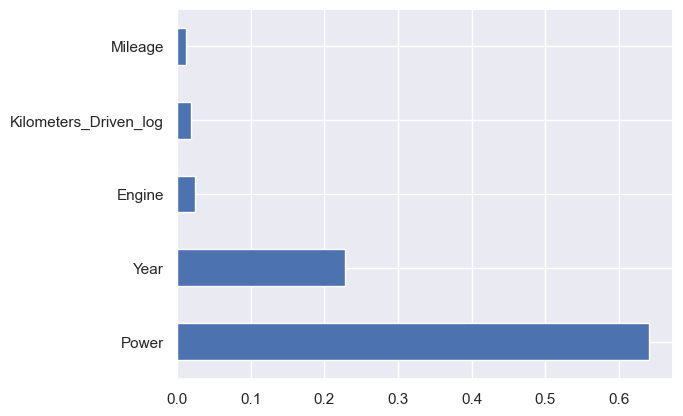

In [171]:
feat_importances = pd.Series(tr_regressor.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

<AxesSubplot:xlabel='Price_log', ylabel='Density'>

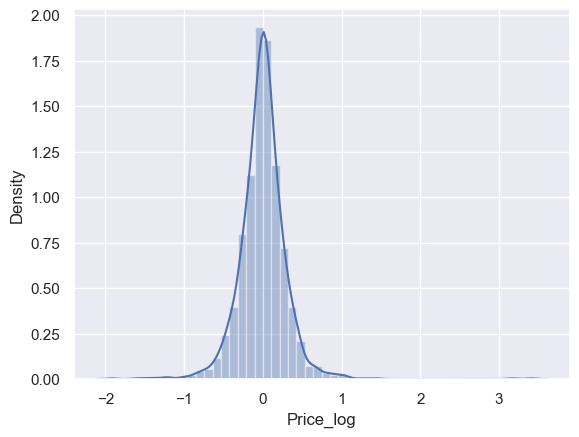

In [172]:
# checking difference between labled y and predicted y
sns.distplot(Y_test-pred_tr)

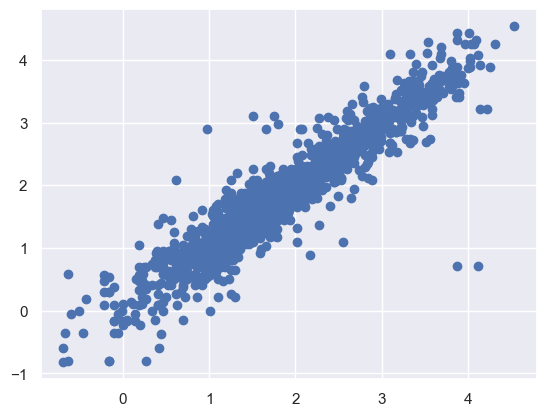

In [173]:
#checking predicted y and labeled y using a scatter plot.
plt.scatter(Y_test,pred_tr)

**Observations:**
- **The Power, Year, Engine, Kilometers_Drive, and Mileage are the most important features** **followed by Makes and Locations.**
- **The rest of the variables have very small impact in this model.**


Now, let's build another model - **a random forest classifier.**

### **Random Forest** 

In [174]:
rf_regressor = RandomForestRegressor(n_estimators=28, random_state=0)
rf_regressor.fit(X_train,Y_train)
rf_regressor.score(X_test,Y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,Y_test)
expl_rf = explained_variance_score(rf_pred,Y_test)

In [175]:
rf_features = pd.DataFrame(rf_regressor.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)

In [176]:
rf_features.shape

(47, 1)

In [177]:
rf_features.head(20)

Imp
Power                 0.648
Year                  0.231
Engine                0.023
Kilometers_Driven_log 0.019
Mileage               0.014
Make_Mahindra         0.007
Location_Kolkata      0.005
Make_Tata             0.005
Make_Mercedes-Benz    0.005
Transmission_Manual   0.004
Location_Hyderabad    0.003
Make_Honda            0.003
Make_Skoda            0.003
Seats                 0.002
Location_Coimbatore   0.002
Make_Mini             0.002
Make_Toyota           0.002
Make_Land             0.002
Owner_Type_Second     0.002
Fuel_Type_Diesel      0.002

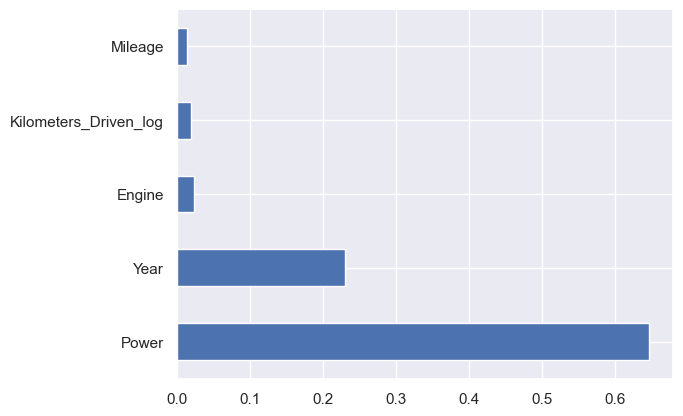

In [178]:
RF_feat_importances = pd.Series(rf_regressor.feature_importances_, index=X_train.columns)
RF_feat_importances.nlargest(5).plot(kind='barh')
plt.show()

<AxesSubplot:xlabel='Price_log', ylabel='Density'>

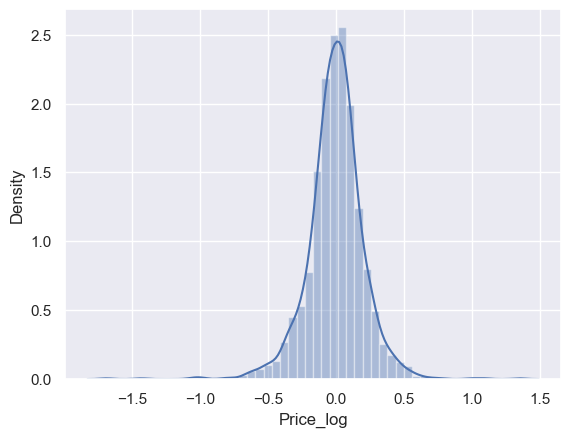

In [179]:
# checking difference between labled y and predicted y
sns.distplot(Y_test-rf_pred)

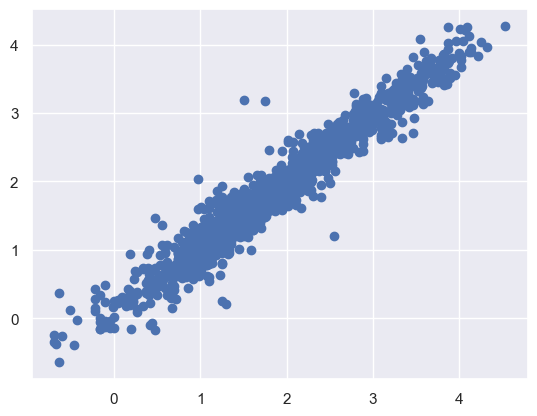

In [180]:
#checking predicted y and labeled y using a scatter plot.
plt.scatter(Y_test,rf_pred)

**Observations:**
- **Similarily to the Random Tree Regression, the Power, Year, Engine, Kilometers_Driven, and Mileage are the most important features** **followed by few Makes and Locations.**
- **The rest of the variables have very small impact in this model.**


In [181]:
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,Y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,Y_test)*100))

Decision tree  Regression Model Score is  88
Random Forest Regression Model Score is  94


In [182]:
#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Decision Tree','Random forest Regression'],
                            'Score':[decision_score,rf_score],
                            'Explained Variance Score':[expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending=False)

Model  Score  Explained Variance Score
1  Random forest Regression  0.942                     0.938
0             Decision Tree  0.878                     0.879

### **Hyperparameter Tuning: Decision Tree**

Let's intialize hyperparmeters random range using Gridsearch to find the best parameters for our decision tree model.

In [183]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [5,7,9,11,12],
            "min_samples_leaf":[1,3,5],
            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
            "max_features":["auto","log2","sqrt",None],
            "max_leaf_nodes":[None,10,20,30,40] }

In [184]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [185]:
#tuning_model=GridSearchCV(tr_regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [186]:
tr_regressor.criterion

'squared_error'

In [187]:
import sklearn

In [188]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [189]:
tuning_model_dt=GridSearchCV(tr_regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3,  n_jobs=-1)

In [190]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print(thour,":",tmin,':',round(tsec,2))

In [191]:
#%%capture
from datetime import datetime

start_time=timer(None)

tuning_model_dt.fit(X_train,Y_train)

#timer(start_time)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.292 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.419 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.617 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.441 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.750 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_le

[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.445 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.441 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.613 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.617 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.626 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.750 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.357 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.268 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.414 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.353 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.379 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END 

[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.441 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.613 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.256 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.357 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.292 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.617 total time=   0.0s
[CV 3/3] END

[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_featur

[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.209 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.205 total time=   0.0s
[CV 3/3] END max_depth=5, max_feat

[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.510 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.396 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.652 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.633 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.613 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.762 total time=   0.0s
[CV 3/3] END max_depth=5

[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.717 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.613 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.762 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.774 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.750 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.762 total time=   0.0s
[CV 3/3] END max_depth

[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.459 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.410 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.638 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.685 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.613 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.762 total time=   0.0s
[CV 3/3] E

[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.396 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.652 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_featur

[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.750 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.762 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.774 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.750 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.762 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.774 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, ma

[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.353 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.379 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.613 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.617 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.626 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.449 total time=   0.0s
[CV 2/3] E

[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=N

[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.292 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.256 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.261 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.762 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.774 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END 

[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=7, max_features=a

[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=7, ma

[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.531 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.613 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.582 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.626 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.396 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.652 total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=7, max_features=l

[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=7, ma

[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=7, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=7, max_features=l

[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=7, max_features=s

[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=7, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=7, max_features=s

[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.353 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.379 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.613 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=7, max_featu

[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=7, max_features=N

[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.209 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.205 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.280 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.357 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.292 total time=   0.0s
[CV 1/3] END max_depth

[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.613 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.617 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.626 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.256 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.261 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.268 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.414 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.337 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.353 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.379 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.613 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=None, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.617 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.445 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.441 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.613 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.617 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.626 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.750 total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.353 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.379 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.613 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.617 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.626 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.449 total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=9, ma

[CV 2/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.393 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.684 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.613 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.419 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.414 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.396 total time=   0.0s
[CV 2/3] E

[CV 2/3] END max_depth=9, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.762 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.774 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.762 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.774 total time=   0.1s
[CV 1/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.750 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.762 total time=   0.0s
[CV 3/3] END

[CV 1/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.774 total time=   0.0s
[CV 1/3] END max_depth=9, max_feature

[CV 3/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.685 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.613 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.762 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.774 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.467 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.708 total time=   0.0s
[CV 3/3] END max_depth

[CV 2/3] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.261 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.268 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.436 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.419 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.414 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END ma

[CV 2/3] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=9, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=9, max_features=N

[CV 1/3] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.449 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.445 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.441 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.613 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.617 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=None, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.626 total time=   0.0s
[CV 1/3] END max_depth

[CV 3/3] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.280 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.357 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.292 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.256 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.261 total time=   0.0s
[CV 3/3] END max

[CV 2/3] END max_depth=11, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.205 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.204 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.280 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.357 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.292 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_de

[CV 1/3] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.436 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.419 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.414 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.617 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.626 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.449 total time=   0.0s
[CV 2/3] END

[CV 3/3] END max_depth=11, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=11, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.396 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.510 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.531 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.613 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.582 total time=   0.0s
[CV 3/3] END max_de

[CV 1/3] END max_depth=11, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=11, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=11, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=11, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=11, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=11, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=11, max_fea

[CV 1/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=11, max_feature

[CV 2/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.419 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.414 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.396 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.605 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.684 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.613 total time=   0.0s
[CV 2/3] END max

[CV 1/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=11, max_fea

[CV 1/3] END max_depth=11, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=11, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=11, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=11, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=11, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=11, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=11, max_fea

[CV 2/3] END max_depth=11, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.762 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.740 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.750 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.762 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-0.774 total time=   0.0s
[CV 1/3] END max_depth=11, max_features=None, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_de

[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth

[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.280 total time=   0.1s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.357 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=11, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=11, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=11, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1

[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.613 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.617 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.626 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.449 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.445 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.441 total time=   0.0s
[CV 1/3] END max

[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.441 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.613 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.617 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.4, splitter=random;, score=-0.626 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.750 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.762 total time=   0.0s
[CV 3/3] END max

[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=12, max_fea

[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=12, max_features=log2, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=12, max_featu

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 3, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [192]:
# best hyperparameters 
tuning_model_dt.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [193]:
# best model score
tuning_model_dt.best_score_

-0.20566531725547657

Training Decision Tree With Best Hyperparameters

In [194]:
tuned_hyper_model_dt= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=None, min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')

In [195]:
# fitting model


tuned_hyper_model_dt.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [196]:
# prediction 

tuned_pred_dt=tuned_hyper_model_dt.predict(X_test)

<AxesSubplot:xlabel='Price_log', ylabel='Density'>

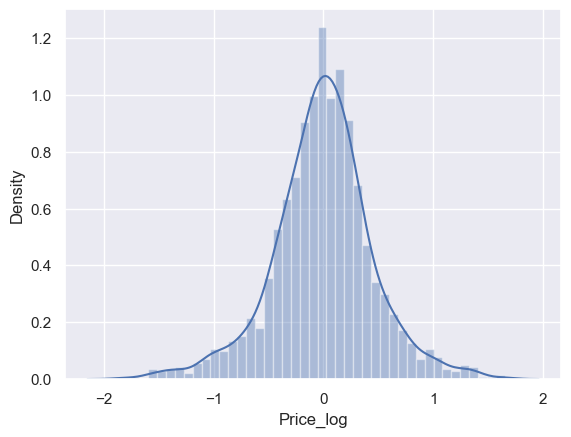

In [197]:
# checking difference between labled y and predicted y
sns.distplot(Y_test-tuned_pred_dt)

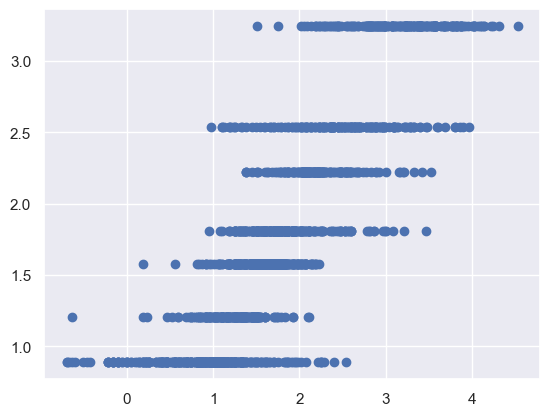

In [198]:
plt.scatter(Y_test,tuned_pred_dt)

Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is without the tuning of parameters.

In [199]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test,tuned_pred_dt))
print('MSE:', metrics.mean_squared_error(Y_test, tuned_pred_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, tuned_pred_dt)))

MAE: 0.33611006239180224
MSE: 0.20734683717486618
RMSE: 0.4553535298807578


In [200]:
# without hyperparameter tuning 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test,pred_tr))
print('MSE:', metrics.mean_squared_error(Y_test, pred_tr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred_tr)))

MAE: 0.2004992909423293
MSE: 0.09047874386375626
RMSE: 0.30079684816127356


**Feature Importance**

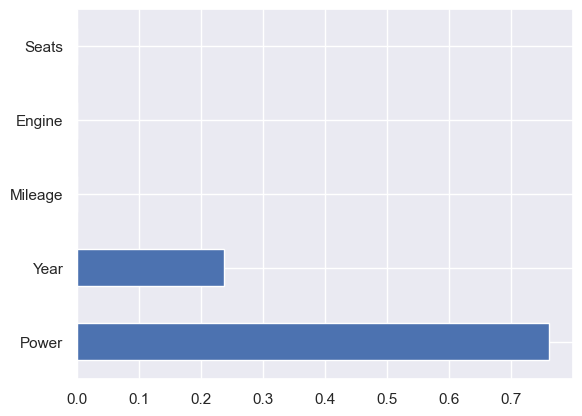

In [201]:
tuned_hyper_model_dt = pd.Series(tuned_hyper_model_dt.feature_importances_, index=X_train.columns)
tuned_hyper_model_dt.nlargest(5).plot(kind='barh')
plt.show()

### **Hyperparameter Tuning: Random Forest**

In [202]:
# Hyper parameters range intialization for tuning 

parameters={"max_depth" : [15, 18, 20, 25, 30, 35],
            "min_samples_leaf":[1,5],
            #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
            "max_features":["auto","log2","sqrt",None],
            #"max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90],
            "n_estimators": [40, 50, 60, 70, 80]}

In [203]:
#estimator.get_params().keys()

In [204]:
tuning_model_rf=GridSearchCV(rf_regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3, n_jobs=-1)

In [205]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
    print(thour,":",tmin,':',round(tsec,2))

In [218]:
tuning_model_rf.fit(X_train,Y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random;, 

[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.353 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.379 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.613 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.617 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random;, score=-0.626 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4, splitter=best;, score=-0.449 total time=   0.0s
[CV 2/3] END max

[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, n_estimators=40;, score=-0.084 total time=   0.4s
[CV 3/3] END max_depth=15, max_features=sqrt, min_samples_leaf=5, n_estimators=60;, score=-0.083 total time=   0.5s
[CV 2/3] END max_depth=15, max_features=None, min_samples_leaf=1, n_estimators=40;, score=-0.056 total time=   1.7s
[CV 1/3] END max_depth=15, max_features=None, min_samples_leaf=1, n_estimators=70;, score=-0.051 total time=   2.0s
[CV 1/3] END max_depth=15, max_features=None, min_samples_leaf=5, n_estimators=50;, score=-0.062 total time=   0.7s
[CV 2/3] END max_depth=15, max_features=None, min_samples_leaf=5, n_estimators=70;, score=-0.065 total time=   0.9s
[CV 1/3] END max_depth=18, max_features=auto, min_samples_leaf=1, n_estimators=50;, score=-0.051 total time=   1.0s
[CV 3/3] END max_depth=18, max_features=auto, min_samples_leaf=1, n_estimators=70;, score=-0.055 total time=   1.5s
[CV 1/3] END max_depth=18, max_features=auto, min_samples_leaf=5, n_esti

[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.419 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.414 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1

[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=12, max_fea

[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=best;, score=-0.268 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.436 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.419 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.2, splitter=random;, score=-0.414 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.337 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best;, score=-0.353 total time=   0.0s
[CV 3/3] END max

[CV 2/3] END max_depth=25, max_features=auto, min_samples_leaf=1, n_estimators=70;, score=-0.055 total time=   1.6s
[CV 3/3] END max_depth=25, max_features=auto, min_samples_leaf=5, n_estimators=50;, score=-0.062 total time=   1.1s
[CV 1/3] END max_depth=25, max_features=auto, min_samples_leaf=5, n_estimators=80;, score=-0.061 total time=   1.5s
[CV 3/3] END max_depth=25, max_features=log2, min_samples_leaf=1, n_estimators=60;, score=-0.061 total time=   0.4s
[CV 2/3] END max_depth=25, max_features=log2, min_samples_leaf=5, n_estimators=40;, score=-0.090 total time=   0.2s
[CV 1/3] END max_depth=25, max_features=log2, min_samples_leaf=5, n_estimators=50;, score=-0.087 total time=   0.2s
[CV 1/3] END max_depth=25, max_features=log2, min_samples_leaf=5, n_estimators=70;, score=-0.087 total time=   0.3s
[CV 3/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, n_estimators=40;, score=-0.058 total time=   0.4s
[CV 2/3] END max_depth=25, max_features=sqrt, min_samples_leaf=1, n_esti

[CV 2/3] END max_depth=35, max_features=None, min_samples_leaf=5, n_estimators=50;, score=-0.065 total time=   0.8s
[CV 3/3] END max_depth=35, max_features=None, min_samples_leaf=5, n_estimators=70;, score=-0.061 total time=   1.1s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=1, n_estimators=40;, score=-0.056 total time=   0.8s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=1, n_estimators=70;, score=-0.051 total time=   1.1s
[CV 1/3] END max_depth=15, max_features=auto, min_samples_leaf=5, n_estimators=50;, score=-0.062 total time=   0.6s
[CV 3/3] END max_depth=15, max_features=auto, min_samples_leaf=5, n_estimators=70;, score=-0.062 total time=   0.9s
[CV 1/3] END max_depth=15, max_features=log2, min_samples_leaf=1, n_estimators=60;, score=-0.059 total time=   0.3s
[CV 1/3] END max_depth=15, max_features=log2, min_samples_leaf=1, n_estimators=80;, score=-0.058 total time=   0.3s
[CV 3/3] END max_depth=15, max_features=log2, min_samples_leaf=5, n_esti

[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, n_estimators=50;, score=-0.054 total time=   0.6s
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=1, n_estimators=80;, score=-0.052 total time=   0.7s
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=5, n_estimators=70;, score=-0.085 total time=   0.4s
[CV 2/3] END max_depth=30, max_features=None, min_samples_leaf=1, n_estimators=50;, score=-0.056 total time=   1.2s
[CV 1/3] END max_depth=30, max_features=None, min_samples_leaf=1, n_estimators=80;, score=-0.051 total time=   2.4s
[CV 3/3] END max_depth=30, max_features=None, min_samples_leaf=5, n_estimators=60;, score=-0.062 total time=   0.9s
[CV 2/3] END max_depth=35, max_features=auto, min_samples_leaf=1, n_estimators=40;, score=-0.056 total time=   1.1s
[CV 1/3] END max_depth=35, max_features=auto, min_samples_leaf=1, n_estimators=70;, score=-0.051 total time=   1.8s
[CV 3/3] END max_depth=35, max_features=auto, min_samples_leaf=5, n_esti

In [207]:
# best hyperparameters 
tuning_model_rf.best_params_

{'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 80}

In [208]:
# best model score
tuning_model_rf.best_score_

-0.05338608123383214

Training Decision Tree With Best Hyperparameters

In [209]:
tuned_hyper_model_rf= RandomForestRegressor(max_depth=25,
 max_features='auto',
 min_samples_leaf=1,
 n_estimators=80)

In [210]:
# fitting model


tuned_hyper_model_rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=25, n_estimators=80)

In [211]:
# prediction 

tuned_pred_rf=tuned_hyper_model_rf.predict(X_test)

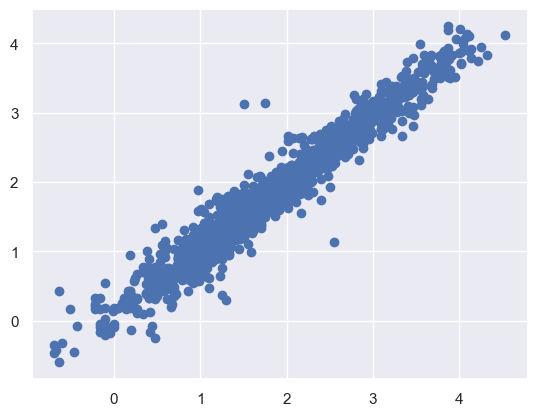

In [212]:
plt.scatter(Y_test,tuned_pred_rf)

In [213]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test,tuned_pred_rf))
print('MSE:', metrics.mean_squared_error(Y_test, tuned_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, tuned_pred_rf)))

MAE: 0.14522430308424752
MSE: 0.04166669086345409
RMSE: 0.20412420450170551


In [214]:
# without hyperparameter tuning 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test,rf_pred))
print('MSE:', metrics.mean_squared_error(Y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, rf_pred)))

MAE: 0.14596102141885436
MSE: 0.04255656878748948
RMSE: 0.20629243511939424


**Feature Importance**

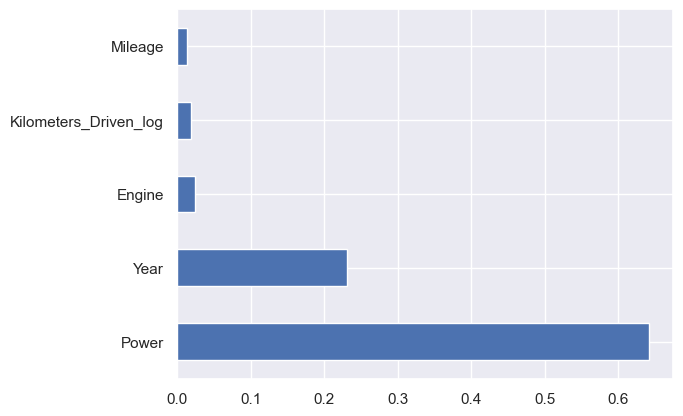

In [215]:
RF_feat_importances_tuned = pd.Series(tuned_hyper_model_rf.feature_importances_, index=X_train.columns)
RF_feat_importances_tuned.nlargest(5).plot(kind='barh')
plt.show()

In [216]:
#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest Regression'],
                            'Score':[ols_model_2.rsquared,decision_score,rf_score],
                           })
#models_score.sort_values(by='Score',ascending=True)
models_score

Model  Score
0         Linear Regression  0.924
1             Decision Tree  0.878
2  Random Forest Regression  0.942

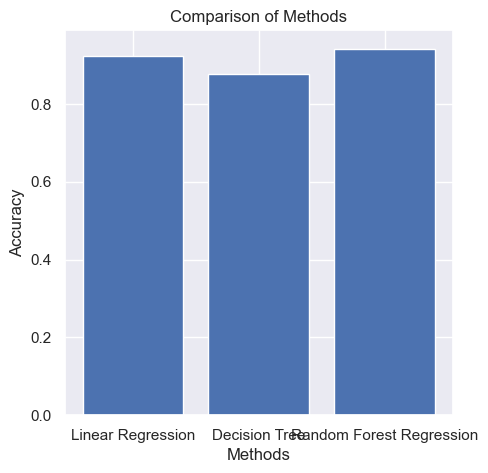

In [217]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5, 5))

plt.bar(models_score['Model'], models_score['Score'])
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Comparison of Methods")
plt.show()



## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

Eventhough, all three models performed pretty much well with close R-squared, Random Forest Regressor has the highest r-squared score.

Before providing the final recommendation for deployment in production, we would recommend clean up and enhance all three models.

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

We discovered that the given dataset contains many features which have not yet been included in the models we built. Random Forest Regressor surprisingly has only two important features, which are Power and Year. 

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

As for now, the best performance has Random Forest Regressor. In order the model to be ready for deployment in production, we would recommend to work more on the tuning of this model, as considering different attributes demonstrated improvement in the performance score.